# Models 

This notebook contains the examples of attempted models and approaches employed towards finding solution to the ACMG classification problem. This particular version is concerned with custom parsing - related notebook EDA - Custom Parsing

## Imports

In [40]:
from utils.EDA_utils import *
from utils.utils import get_dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import dalex as dx
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [25]:
df = get_dataset("data/", samples=["EE_015", "EE_050", "EE_069"], file_type="both", option_csq="potential", 
            options_genotype=["potential", "all"], with_default=True)

In [26]:
df.head()

#CHROM     POS REF ALT QUAL  FILTER_map_qual  FILTER_weak_evidence  \
0   chr1   15820   G   T    .                0                     0   
1   chr1   17385   G   A    .                0                     0   
2   chr1   17697   G   C    .                0                     0   
3   chr1  133129   G   A    .                0                     0   
4   chr1  183629   G   A    .                0                     0   

   FILTER_strand_bias  FILTER_multiallelic  FILTER_fragment  ...  LOEUF  NMD  \
0                   0                    0                0  ...    NaN  NaN   
1                   0                    0                0  ...    NaN  NaN   
2                   0                    0                0  ...    NaN  NaN   
3                   0                    0                0  ...    NaN  NaN   
4                   0                    0                0  ...    NaN  NaN   

   PHENOTYPES_exist  FLAGS_start  PUBMED_exist SIFT_class SIFT_pred  \
0                 0            0             0        NaN       NaN   
1                 0            0             0        NaN       NaN   
2                 0            0             0        NaN       NaN   
3                 0            0             0        NaN       NaN   
4                 0            0             0        NaN       NaN   

   PolyPhen_class  PolyPhen_pred                ACMG_class  
0             NaN            NaN  Uncertain%40Significance  
1             NaN            NaN  Uncertain%40Significance  
2             NaN            NaN                    Benign  
3             NaN            NaN  Uncertain%40Significance  
4             NaN            NaN                    Benign  

[5 rows x 119 columns]

In [27]:
custom_mapping = {
    'Benign': 0,
    'Likely%40Benign': 1,
    'Uncertain%40Significance': 2,
    'Likely%40Pathogenic': 3,
    'Pathogenic': 4
}

target_column = "ACMG_class"


df = df.loc[:, ~df.columns.duplicated()]
preprocessed_df1 = preprocess(df)
preprocessed_df2 = preprocess(df, fill_median=True)
preprocessed_df3 = preprocess(df, one_hot_nans = False)

encoded_df1, encoders1, target_mapping1 = encode(preprocessed_df1, target_column, custom_mapping)
encoded_df2, encoders2, target_mapping2 = encode(preprocessed_df2, target_column, custom_mapping)
encoded_df3, encoders3, target_mapping3 = encode(preprocessed_df3, target_column, custom_mapping)

In [28]:
encoded_df1.head()

#CHROM     POS   REF   ALT  QUAL  FILTER_map_qual  FILTER_weak_evidence  \
0       0   15820  1773  2117     0                0                     0   
1       0   17385  1773     0     0                0                     0   
2       0   17697  1773   721     0                0                     0   
3       0  133129  1773     0     0                0                     0   
4       0  183629  1773     0     0                0                     0   

   FILTER_strand_bias  FILTER_multiallelic  FILTER_fragment  ...  \
0                   0                    0                0  ...   
1                   0                    0                0  ...   
2                   0                    0                0  ...   
3                   0                    0                0  ...   
4                   0                    0                0  ...   

   SpliceAI_pred_DS_AL_is_nan  SpliceAI_pred_DS_DG_is_nan  \
0                           1                           1   
1                           1                           1   
2                           1                           1   
3                           1                           1   
4                           1                           1   

   SpliceAI_pred_DS_DL_is_nan  SpliceAI_pred_SYMBOL_is_nan  LOEUF_is_nan  \
0                           1                            1             1   
1                           1                            1             1   
2                           1                            1             1   
3                           1                            1             1   
4                           1                            1             1   

   NMD_is_nan  SIFT_class_is_nan  SIFT_pred_is_nan  PolyPhen_class_is_nan  \
0           1                  1                 1                      1   
1           1                  1                 1                      1   
2           1                  1                 1                      1   
3           1                  1                 1                      1   
4           1                  1                 1                      1   

   PolyPhen_pred_is_nan  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 174 columns]

In [29]:
encoded_df2.head()

#CHROM     POS   REF   ALT  QUAL  FILTER_map_qual  FILTER_weak_evidence  \
0       0   15820  1773  2117     0                0                     0   
1       0   17385  1773     0     0                0                     0   
2       0   17697  1773   721     0                0                     0   
3       0  133129  1773     0     0                0                     0   
4       0  183629  1773     0     0                0                     0   

   FILTER_strand_bias  FILTER_multiallelic  FILTER_fragment  ...  \
0                   0                    0                0  ...   
1                   0                    0                0  ...   
2                   0                    0                0  ...   
3                   0                    0                0  ...   
4                   0                    0                0  ...   

   SpliceAI_pred_DS_AL_is_nan  SpliceAI_pred_DS_DG_is_nan  \
0                           1                           1   
1                           1                           1   
2                           1                           1   
3                           1                           1   
4                           1                           1   

   SpliceAI_pred_DS_DL_is_nan  SpliceAI_pred_SYMBOL_is_nan  LOEUF_is_nan  \
0                           1                            1             1   
1                           1                            1             1   
2                           1                            1             1   
3                           1                            1             1   
4                           1                            1             1   

   NMD_is_nan  SIFT_class_is_nan  SIFT_pred_is_nan  PolyPhen_class_is_nan  \
0           1                  1                 1                      1   
1           1                  1                 1                      1   
2           1                  1                 1                      1   
3           1                  1                 1                      1   
4           1                  1                 1                      1   

   PolyPhen_pred_is_nan  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 174 columns]

In [30]:
encoded_df3.head()

#CHROM     POS   REF   ALT  QUAL  FILTER_map_qual  FILTER_weak_evidence  \
0       0   15820  1773  2117     0                0                     0   
1       0   17385  1773     0     0                0                     0   
2       0   17697  1773   721     0                0                     0   
3       0  133129  1773     0     0                0                     0   
4       0  183629  1773     0     0                0                     0   

   FILTER_strand_bias  FILTER_multiallelic  FILTER_fragment  ...  \
0                   0                    0                0  ...   
1                   0                    0                0  ...   
2                   0                    0                0  ...   
3                   0                    0                0  ...   
4                   0                    0                0  ...   

   SpliceAI_pred_SYMBOL  LOEUF  NMD  PHENOTYPES_exist  FLAGS_start  \
0                  8747  -0.97    1                 0            0   
1                  8747  -0.97    1                 0            0   
2                  8747  -0.97    1                 0            0   
3                  8747  -0.97    1                 0            0   
4                  8747  -0.97    1                 0            0   

   PUBMED_exist  SIFT_class  SIFT_pred  PolyPhen_class  PolyPhen_pred  
0             0           0       -1.0               0           -1.0  
1             0           0       -1.0               0           -1.0  
2             0           0       -1.0               0           -1.0  
3             0           0       -1.0               0           -1.0  
4             0           0       -1.0               0           -1.0  

[5 rows x 118 columns]

## Model Training

In [31]:
def invert_dict(original_dict):
    inverted_dict = {v: k for k, v in original_dict.items()}
    return inverted_dict

In [32]:
def get_confusion_matrix_plot(y_test, y_pred, class_names_mapping, plot_size = (8, 6)):
    confusion = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = plot_size)
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=[class_names_mapping[i] for i in range(len(class_names_mapping))], yticklabels=[class_names_mapping[i] for i in range(len(class_names_mapping))])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [33]:
inverted_mapping = invert_dict(target_mapping1)

Example model training

In [34]:
X = encoded_df1.drop(columns=['ACMG_class'])
y = encoded_df1['ACMG_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
clf = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.71      6565
           3       1.00      0.28      0.43        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.71      0.50      0.56     88889
weighted avg       0.94      0.94      0.94     88889



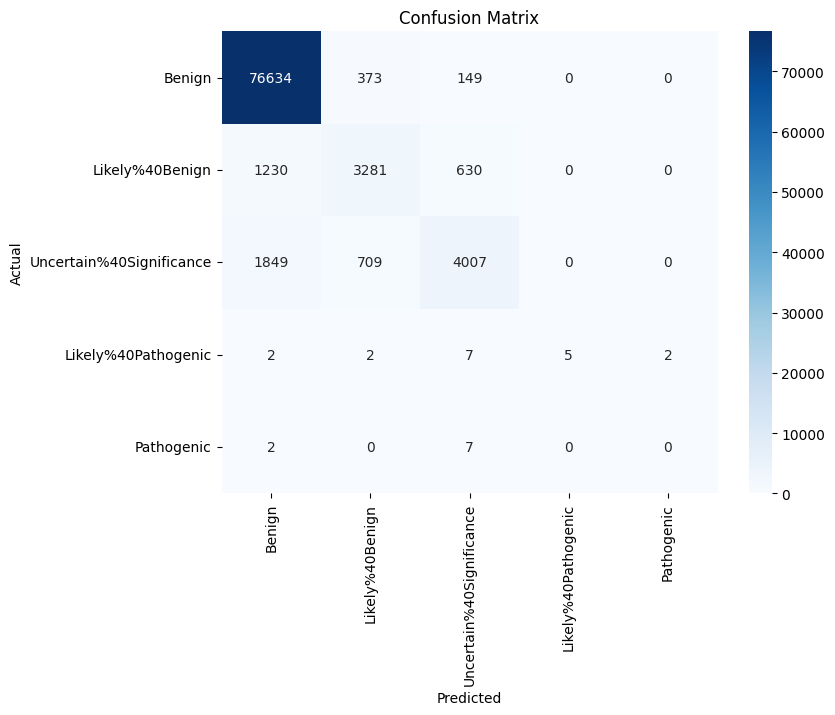

In [35]:
get_confusion_matrix_plot(y_test, y_pred, inverted_mapping)

### Pipeline for Trying multiple different models in sklearn

This pipeline compares the performance of different models implemented in sklearn: Random Forrest, AdaBoost, Decision Tree, Logistic Regression, Bagging.
The results are shown in the form of a confusion matrix. The most promissing model appears to be AdaBoost.
Good performance on majority class is often balanced by bad performance minority class and vice-verse, as such ensamble models might be a good idea.

Classification report for Random Forest with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       0.83      0.28      0.42        18
           4       0.50      0.11      0.18         9

    accuracy                           0.94     88889
   macro avg       0.78      0.53      0.59     88889
weighted avg       0.94      0.94      0.94     88889



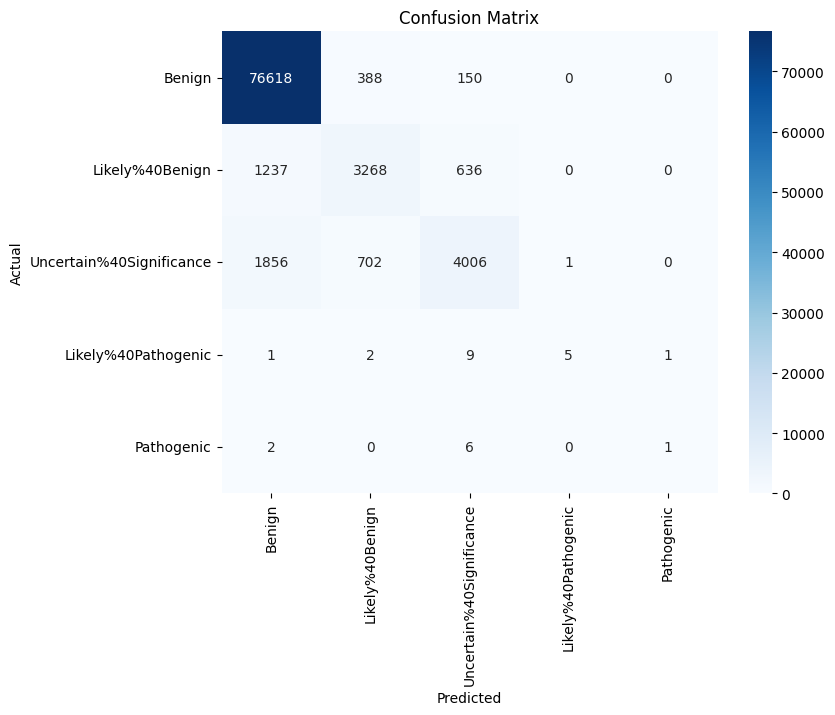

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



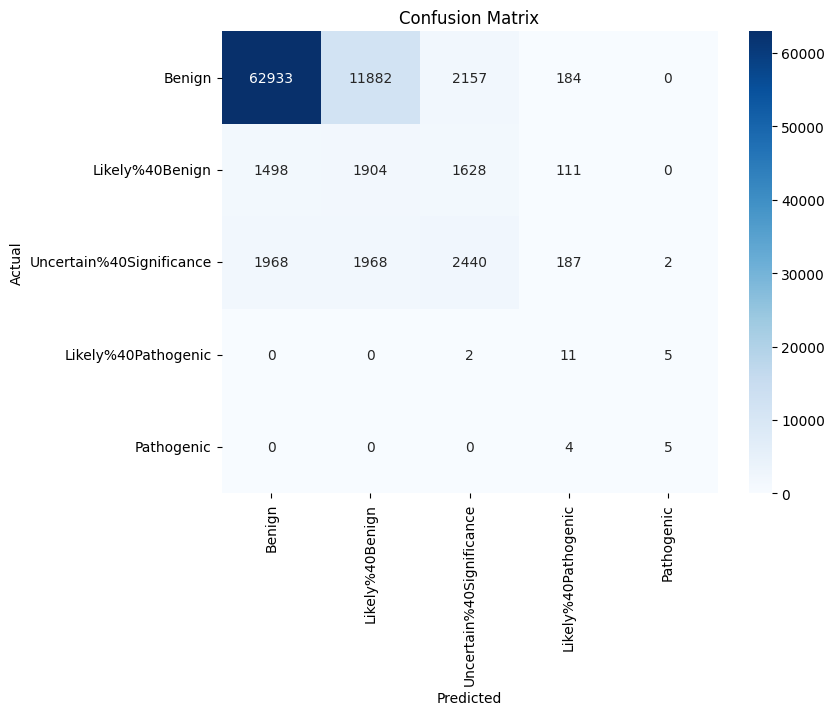

Classification report for Bagging with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.50      0.11      0.18        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.59      0.48      0.51     88889
weighted avg       0.94      0.94      0.94     88889



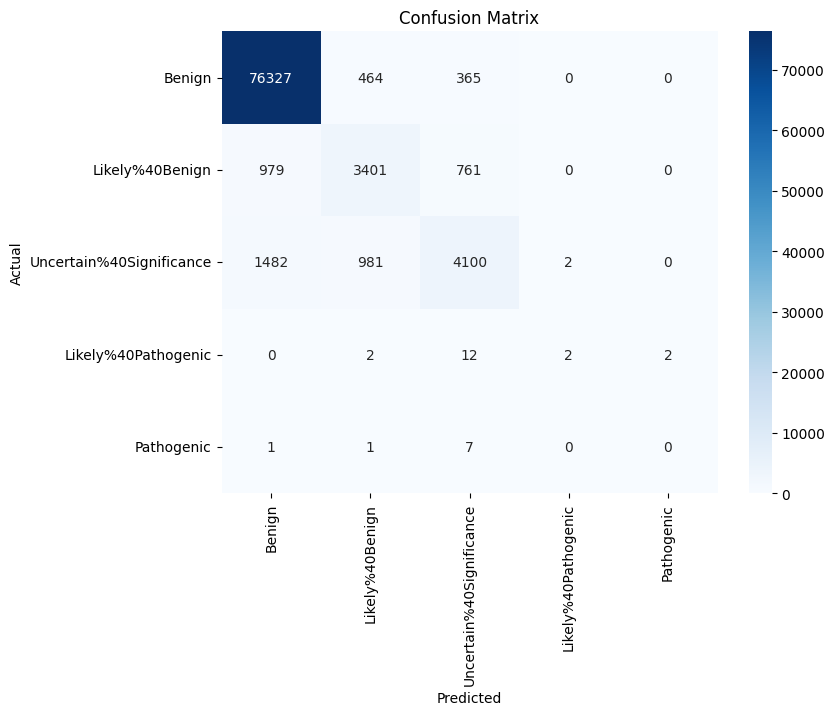

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.59      0.59      5141
           2       0.59      0.62      0.61      6565
           3       0.22      0.28      0.24        18
           4       0.25      0.22      0.24         9

    accuracy                           0.92     88889
   macro avg       0.52      0.53      0.53     88889
weighted avg       0.92      0.92      0.92     88889



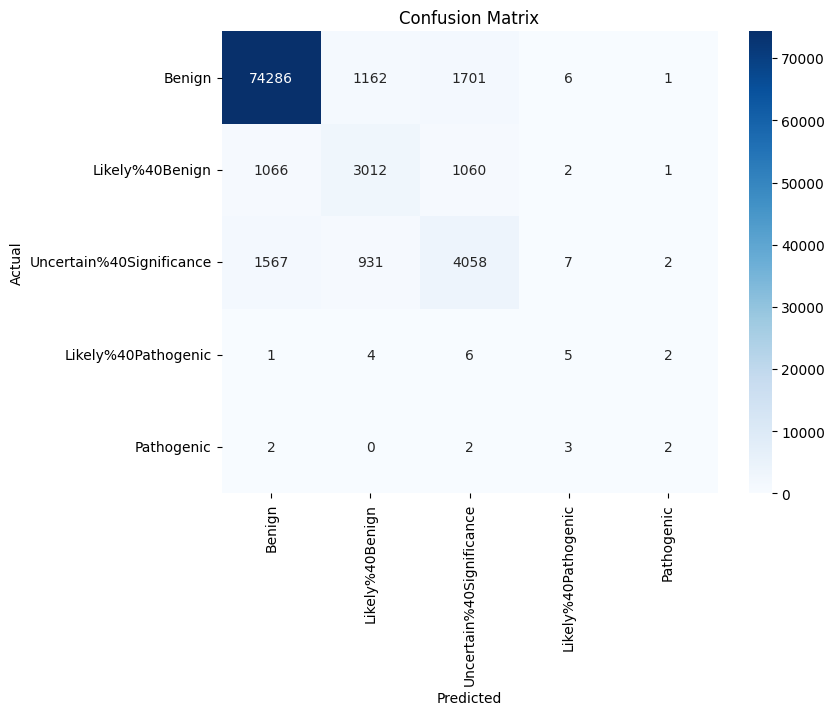

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.94      0.30      0.46     77156
           1       0.09      0.32      0.14      5141
           2       0.17      0.50      0.25      6565
           3       0.00      0.11      0.00        18
           4       0.00      0.56      0.00         9

    accuracy                           0.32     88889
   macro avg       0.24      0.36      0.17     88889
weighted avg       0.83      0.32      0.42     88889



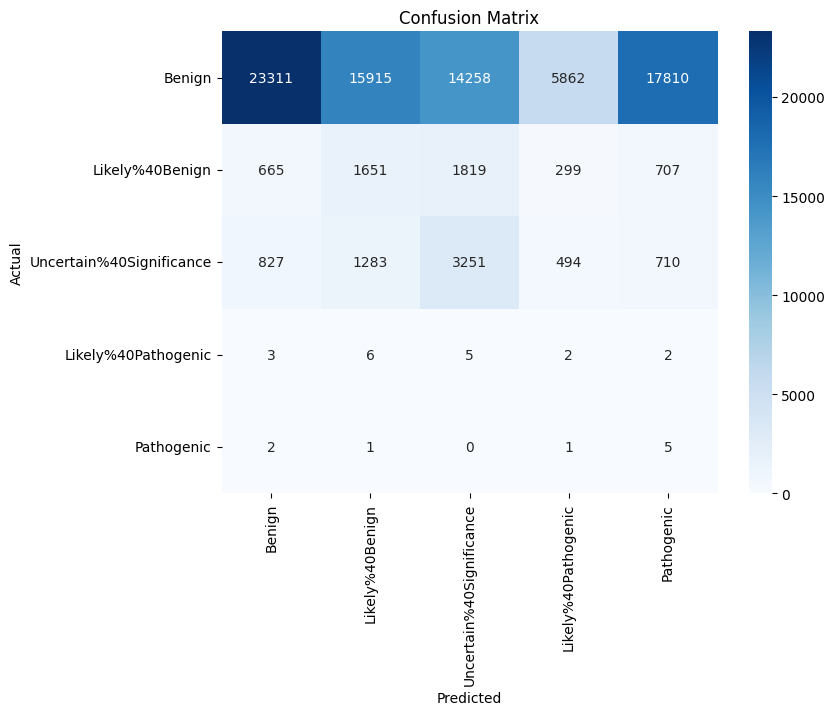

Classification report for Random Forest with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.84      0.61      0.71      6565
           3       0.88      0.39      0.54        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.69      0.53      0.58     88889
weighted avg       0.94      0.94      0.94     88889



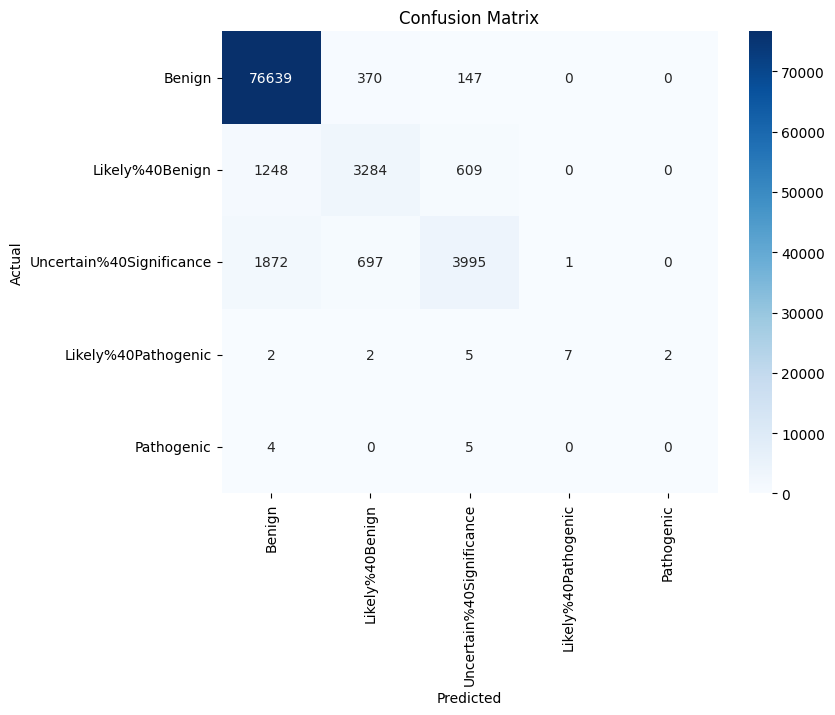

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     77156
           1       0.10      0.75      0.17      5141
           2       0.47      0.12      0.19      6565
           3       0.03      0.78      0.05        18
           4       0.43      0.33      0.38         9

    accuracy                           0.55     88889
   macro avg       0.40      0.51      0.30     88889
weighted avg       0.87      0.55      0.65     88889



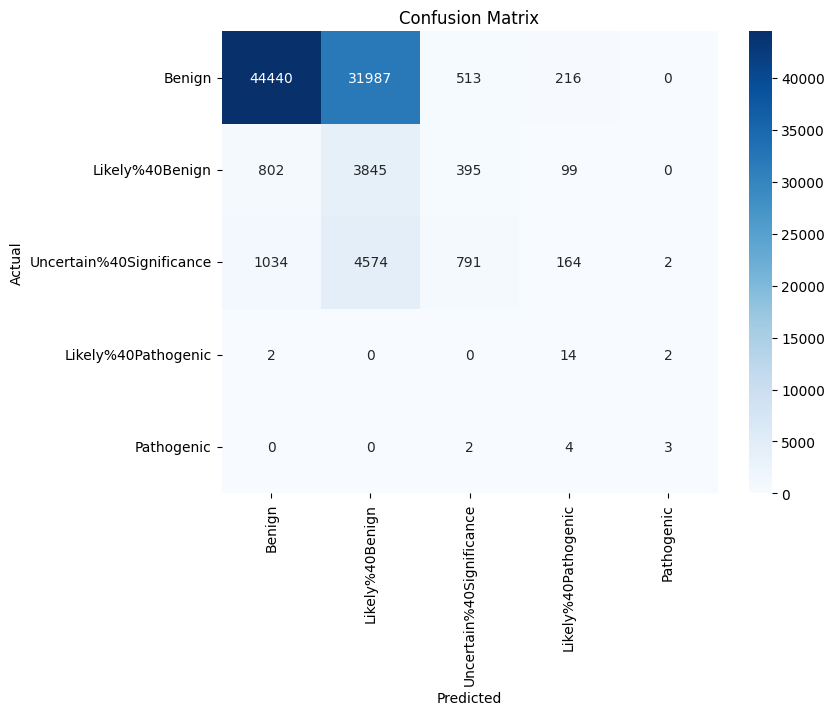

Classification report for Bagging with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.65      0.67      5141
           2       0.78      0.62      0.69      6565
           3       0.38      0.17      0.23        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.56      0.49      0.52     88889
weighted avg       0.94      0.94      0.94     88889



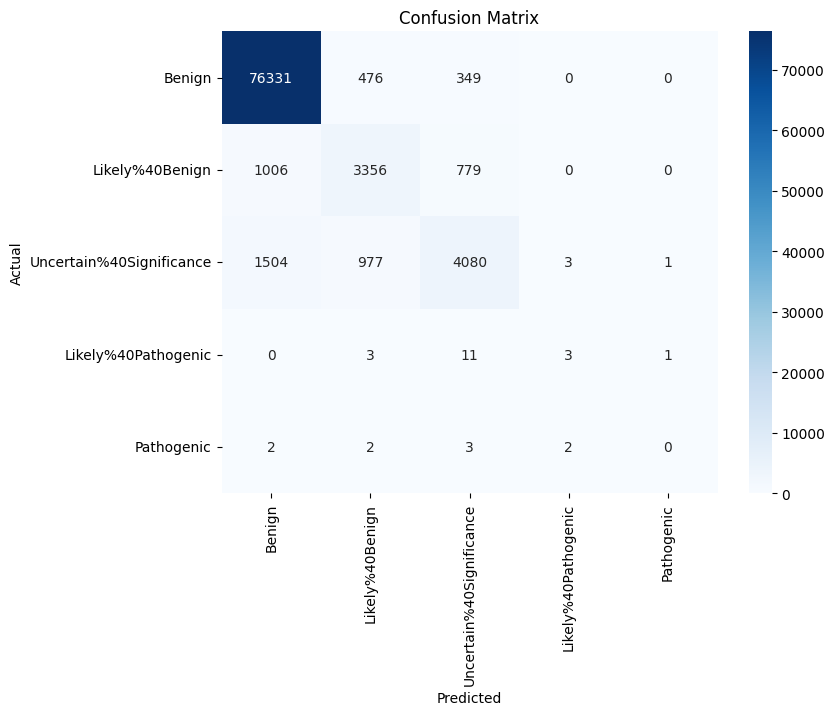

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.58      0.58      0.58      5141
           2       0.59      0.61      0.60      6565
           3       0.22      0.22      0.22        18
           4       0.12      0.11      0.12         9

    accuracy                           0.91     88889
   macro avg       0.50      0.50      0.50     88889
weighted avg       0.92      0.91      0.91     88889



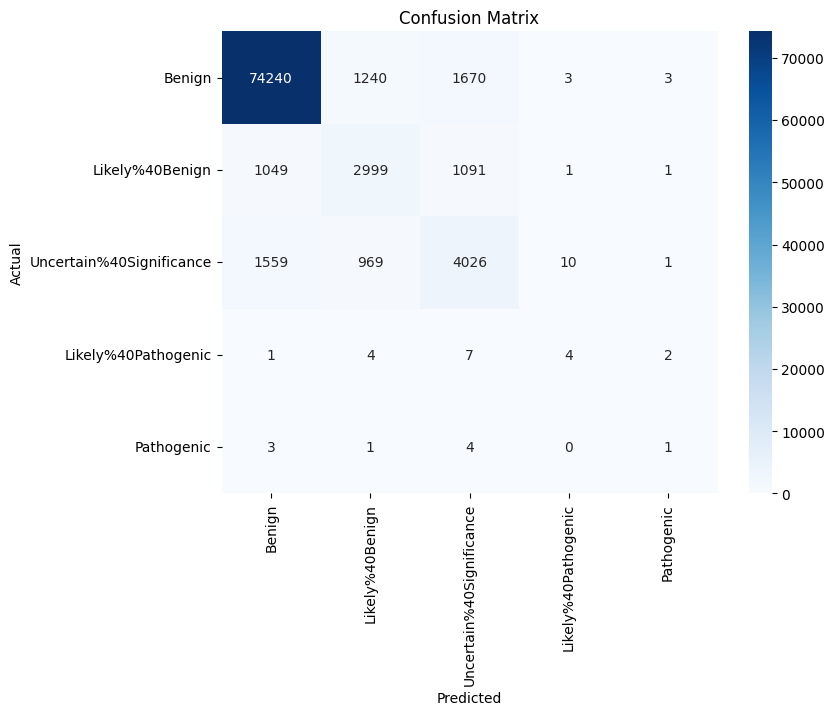

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.93      0.32      0.48     77156
           1       0.07      0.21      0.11      5141
           2       0.16      0.57      0.25      6565
           3       0.00      0.06      0.00        18
           4       0.00      0.67      0.00         9

    accuracy                           0.33     88889
   macro avg       0.23      0.36      0.17     88889
weighted avg       0.83      0.33      0.44     88889



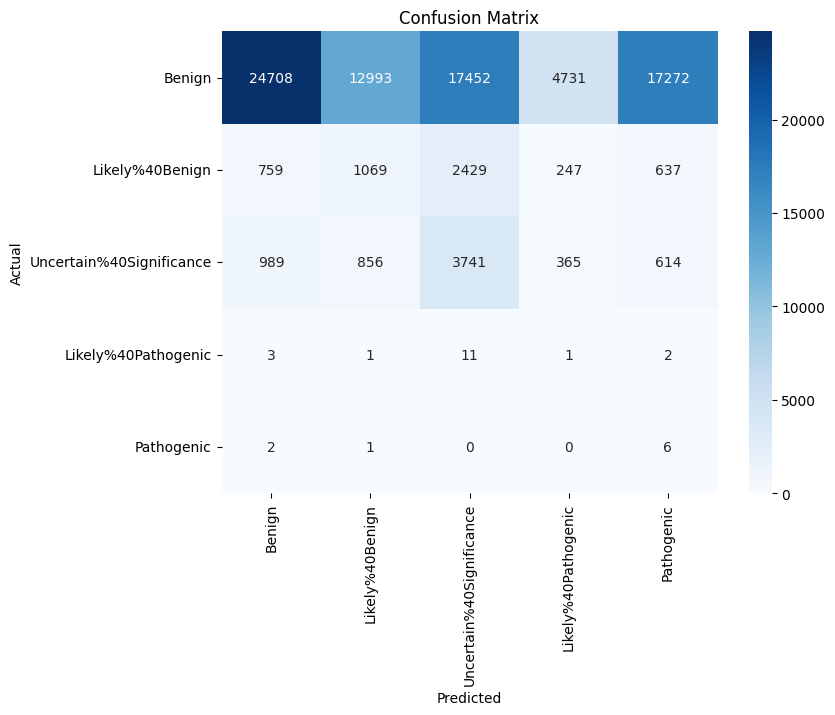

Classification report for Random Forest with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.63      0.69      5141
           2       0.83      0.61      0.70      6565
           3       1.00      0.28      0.43        18
           4       0.33      0.11      0.17         9

    accuracy                           0.94     88889
   macro avg       0.77      0.53      0.59     88889
weighted avg       0.94      0.94      0.94     88889



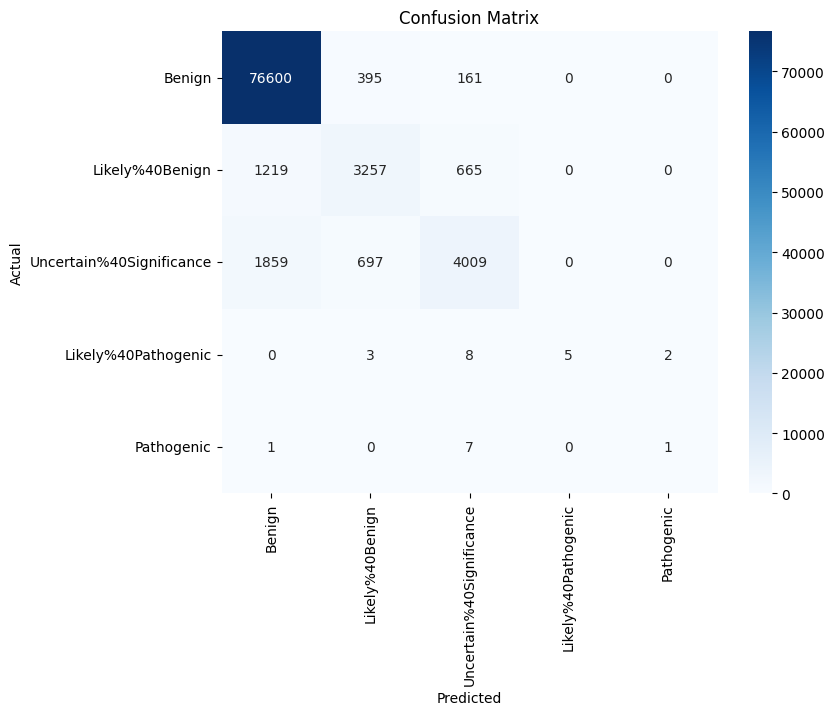

Classification report for AdaBoost with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



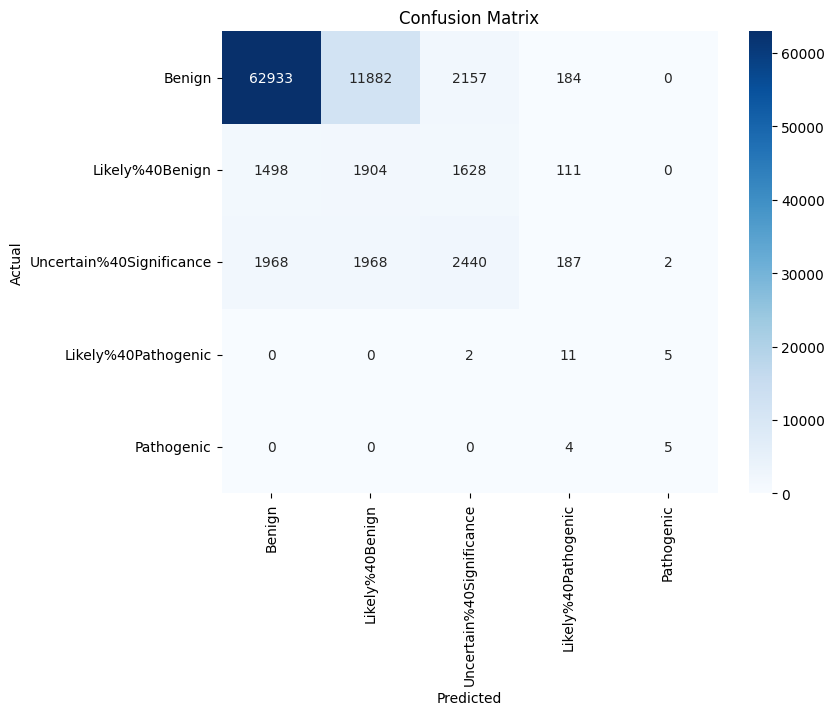

Classification report for Bagging with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.83      0.28      0.42        18
           4       0.50      0.11      0.18         9

    accuracy                           0.94     88889
   macro avg       0.76      0.53      0.59     88889
weighted avg       0.94      0.94      0.94     88889



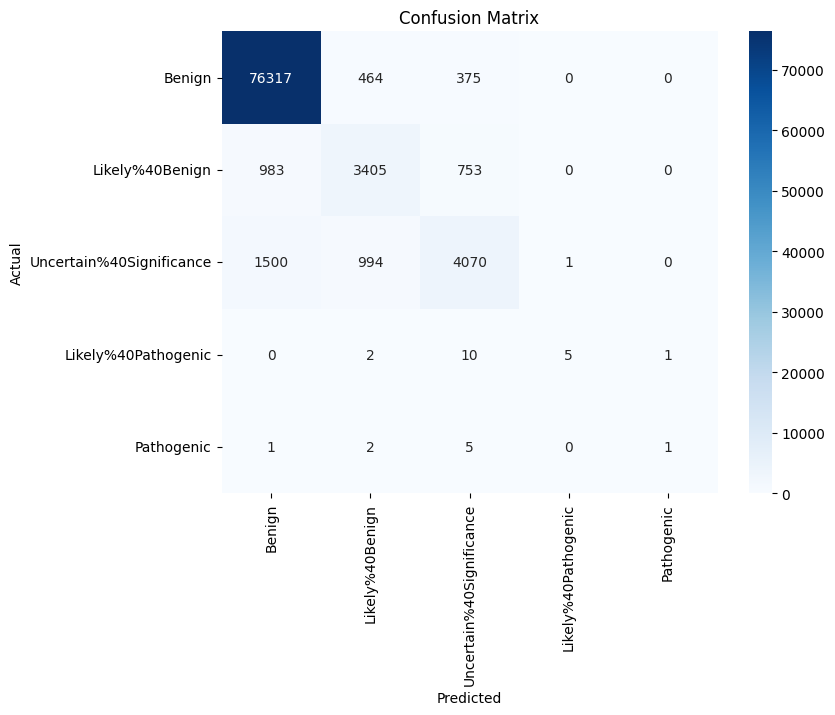

Classification report for Decision Tree with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.59      0.59      5141
           2       0.60      0.62      0.61      6565
           3       0.13      0.17      0.15        18
           4       0.22      0.22      0.22         9

    accuracy                           0.92     88889
   macro avg       0.50      0.51      0.51     88889
weighted avg       0.92      0.92      0.92     88889



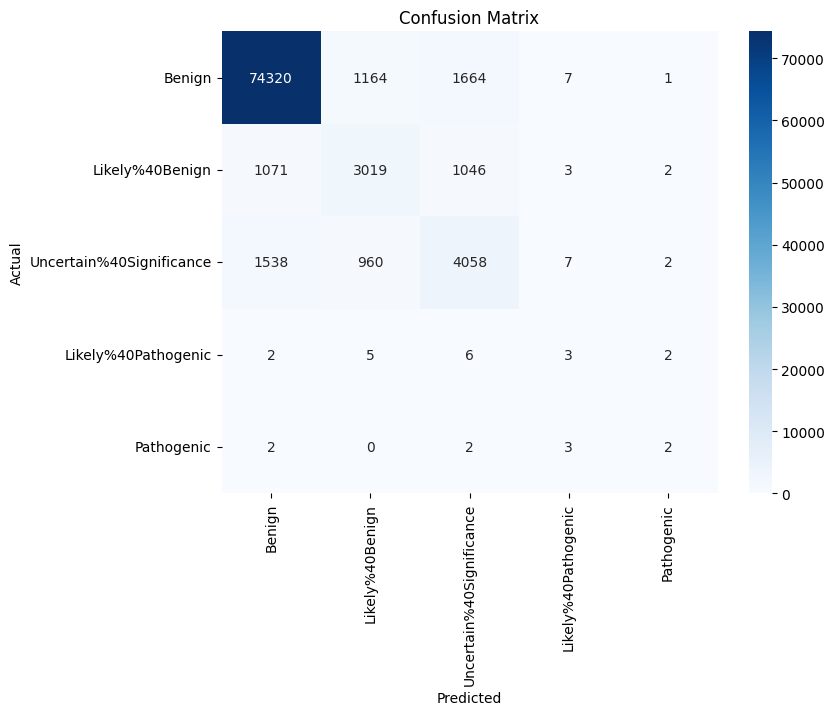

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.94      0.27      0.42     77156
           1       0.11      0.43      0.17      5141
           2       0.17      0.46      0.25      6565
           3       0.00      0.11      0.00        18
           4       0.00      0.67      0.00         9

    accuracy                           0.30     88889
   macro avg       0.24      0.39      0.17     88889
weighted avg       0.84      0.30      0.40     88889



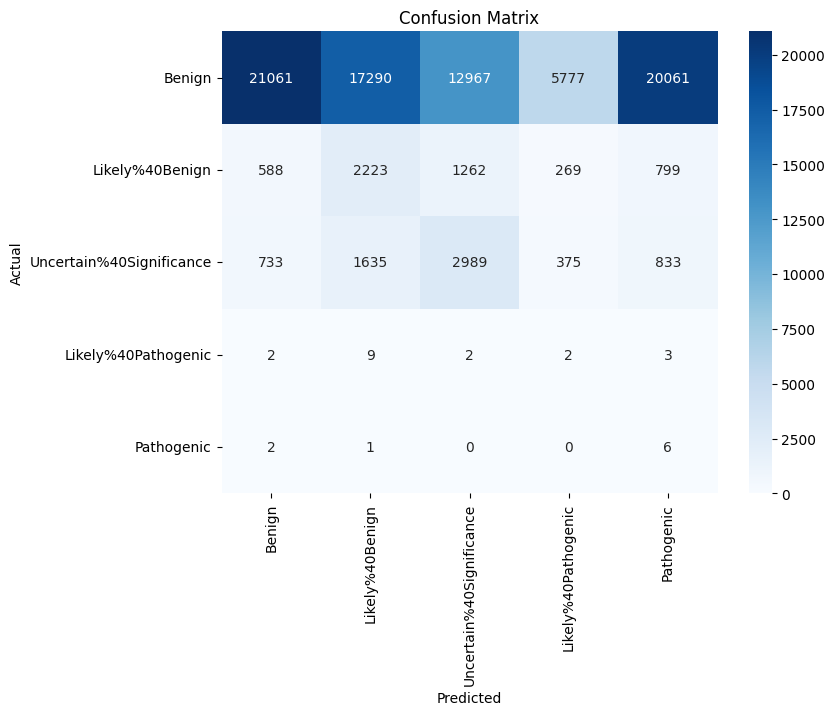

Classification report for Random Forest with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       0.80      0.22      0.35        18
           4       0.33      0.11      0.17         9

    accuracy                           0.94     88889
   macro avg       0.73      0.51      0.58     88889
weighted avg       0.94      0.94      0.94     88889



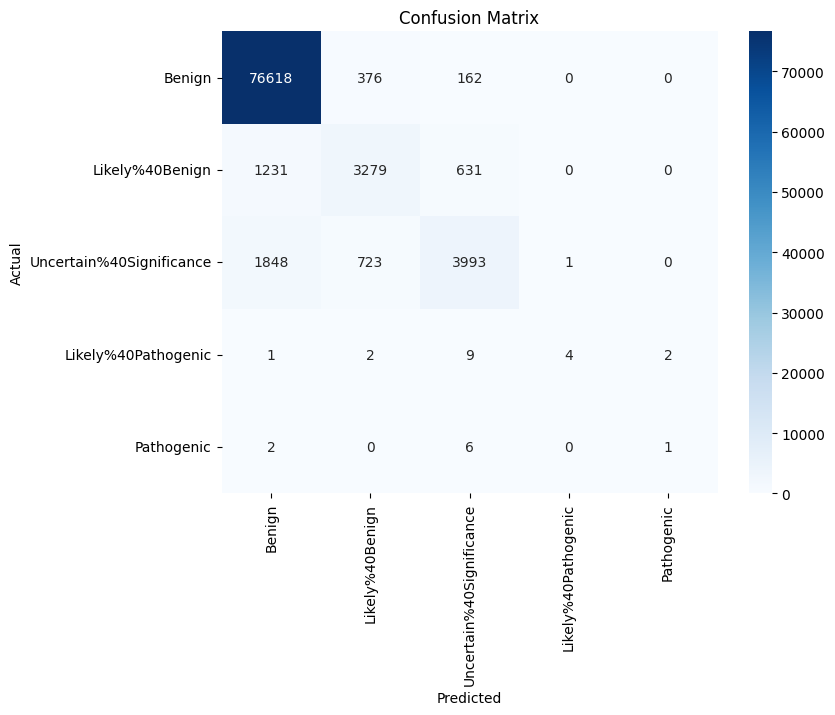

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



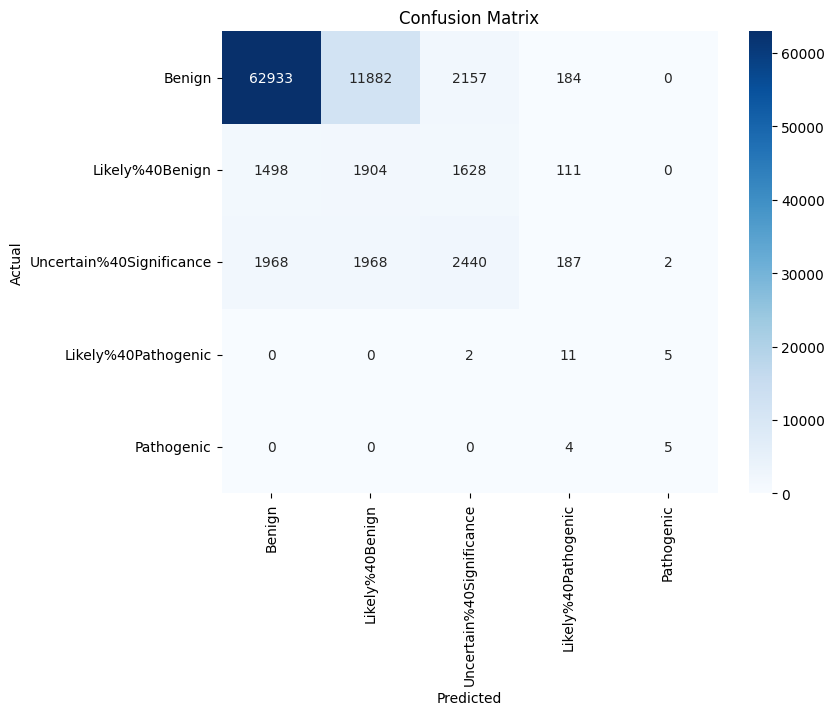

Classification report for Bagging with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.43      0.17      0.24        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.68      0.53      0.58     88889
weighted avg       0.94      0.94      0.94     88889



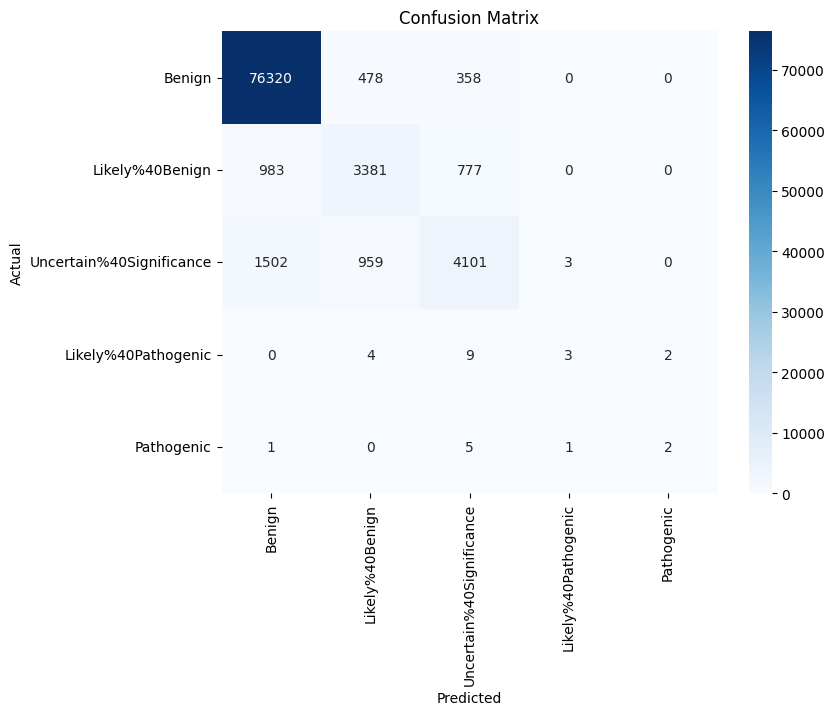

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.58      0.58      5141
           2       0.59      0.62      0.61      6565
           3       0.31      0.28      0.29        18
           4       0.22      0.22      0.22         9

    accuracy                           0.92     88889
   macro avg       0.54      0.53      0.53     88889
weighted avg       0.92      0.92      0.92     88889



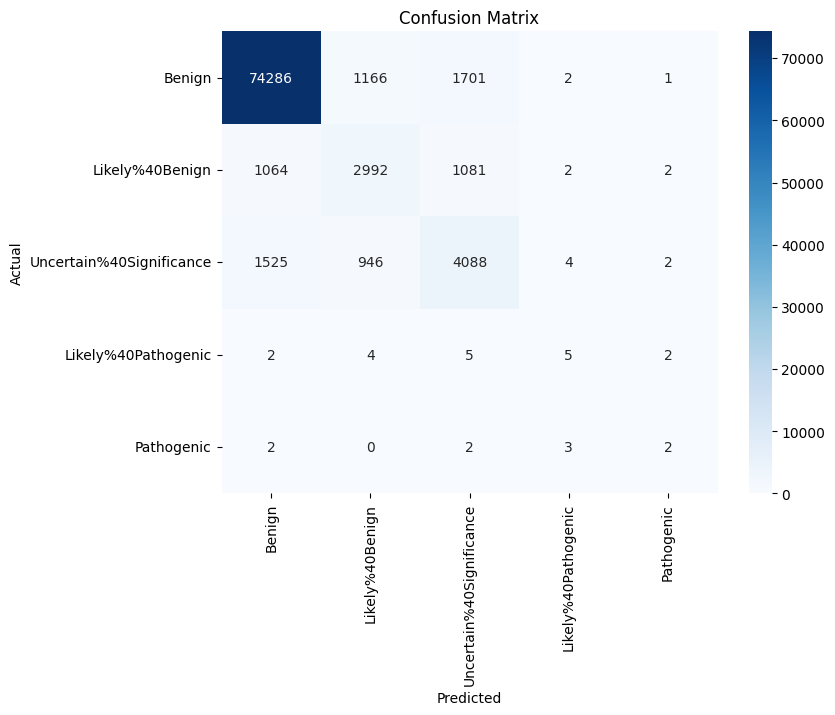

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     77156
           1       0.28      0.65      0.39      5141
           2       0.28      0.61      0.39      6565
           3       0.03      0.78      0.06        18
           4       0.19      0.67      0.29         9

    accuracy                           0.77     88889
   macro avg       0.35      0.70      0.40     88889
weighted avg       0.88      0.77      0.81     88889



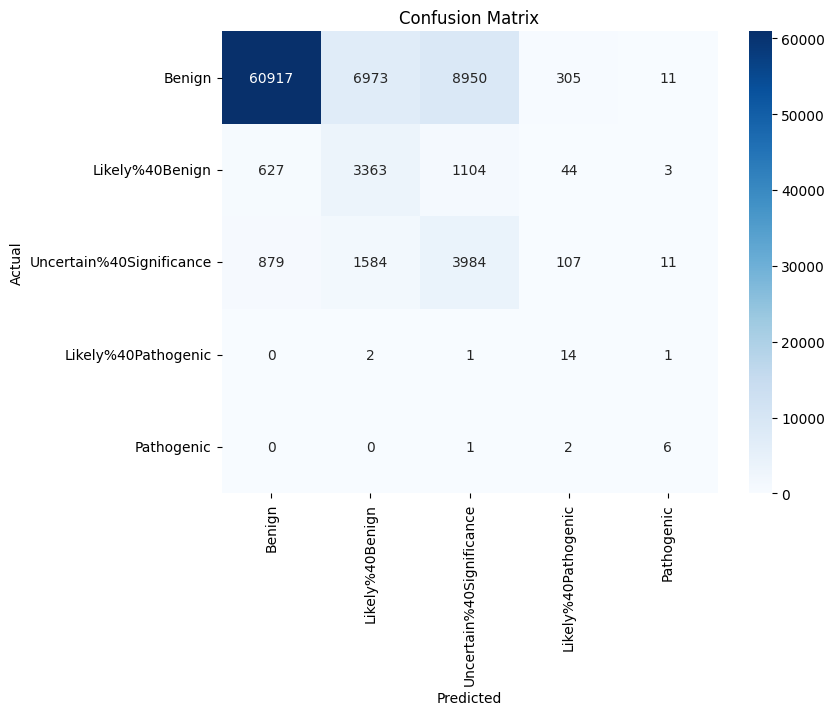

Classification report for Random Forest with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.84      0.61      0.70      6565
           3       0.86      0.33      0.48        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.78      0.56      0.63     88889
weighted avg       0.94      0.94      0.94     88889



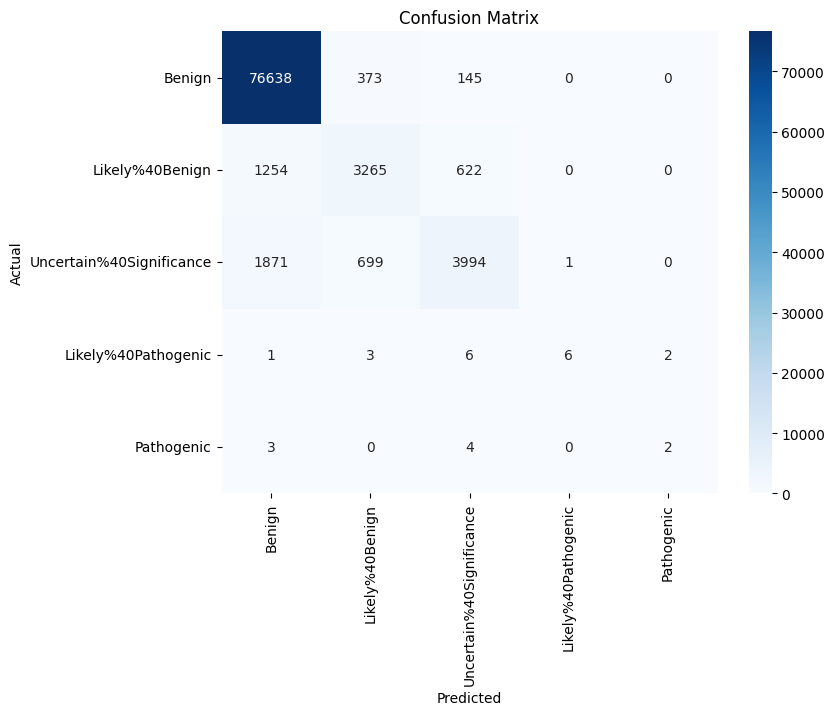

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.96      0.53      0.68     77156
           1       0.07      0.57      0.13      5141
           2       0.35      0.32      0.33      6565
           3       0.02      0.72      0.04        18
           4       0.56      0.56      0.56         9

    accuracy                           0.52     88889
   macro avg       0.39      0.54      0.35     88889
weighted avg       0.86      0.52      0.62     88889



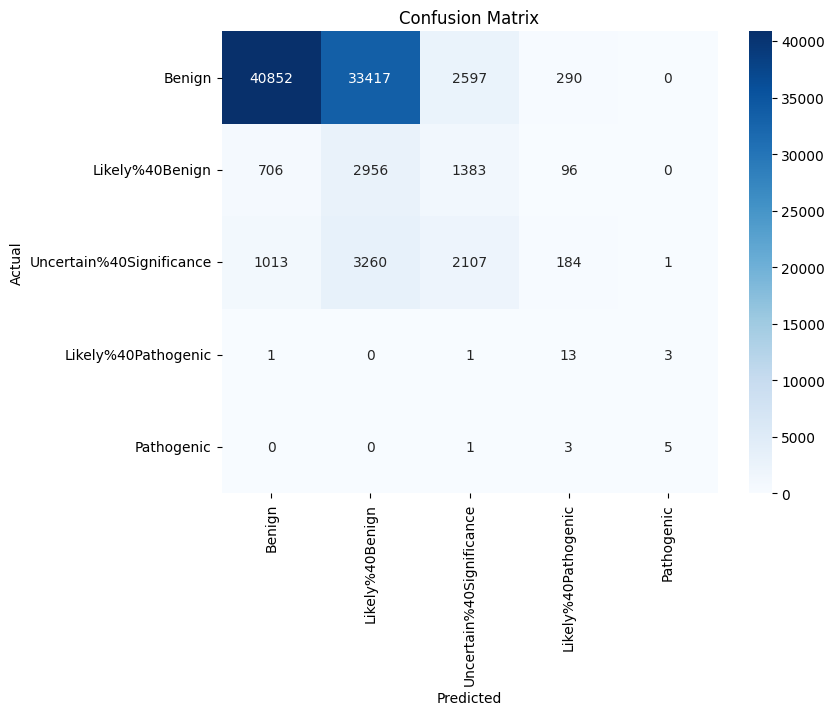

Classification report for Bagging with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.65      0.67      5141
           2       0.78      0.62      0.69      6565
           3       0.57      0.22      0.32        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.70      0.54      0.59     88889
weighted avg       0.94      0.94      0.94     88889



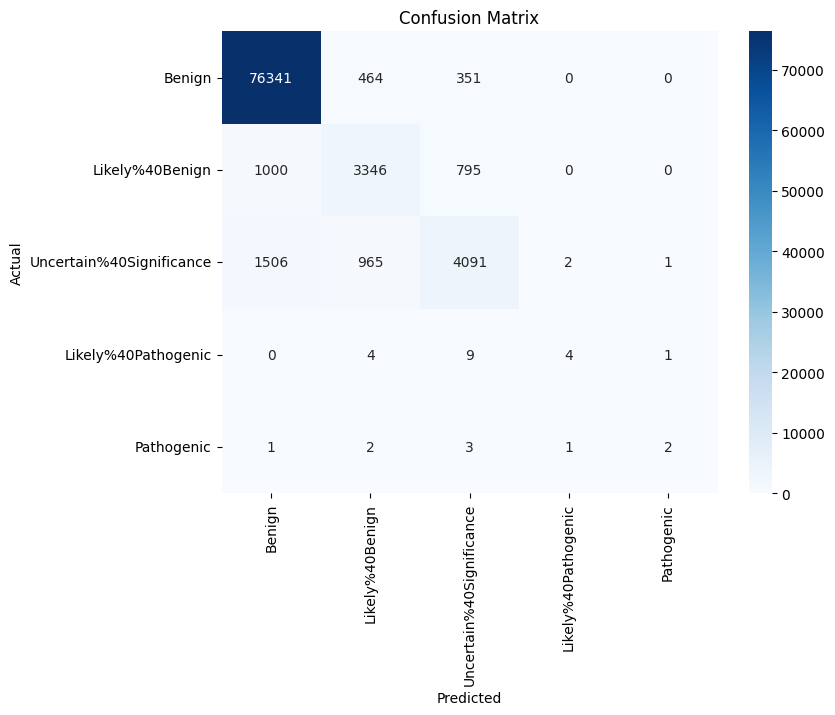

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.58      0.59      0.59      5141
           2       0.59      0.62      0.60      6565
           3       0.20      0.22      0.21        18
           4       0.14      0.11      0.12         9

    accuracy                           0.92     88889
   macro avg       0.50      0.50      0.50     88889
weighted avg       0.92      0.92      0.92     88889



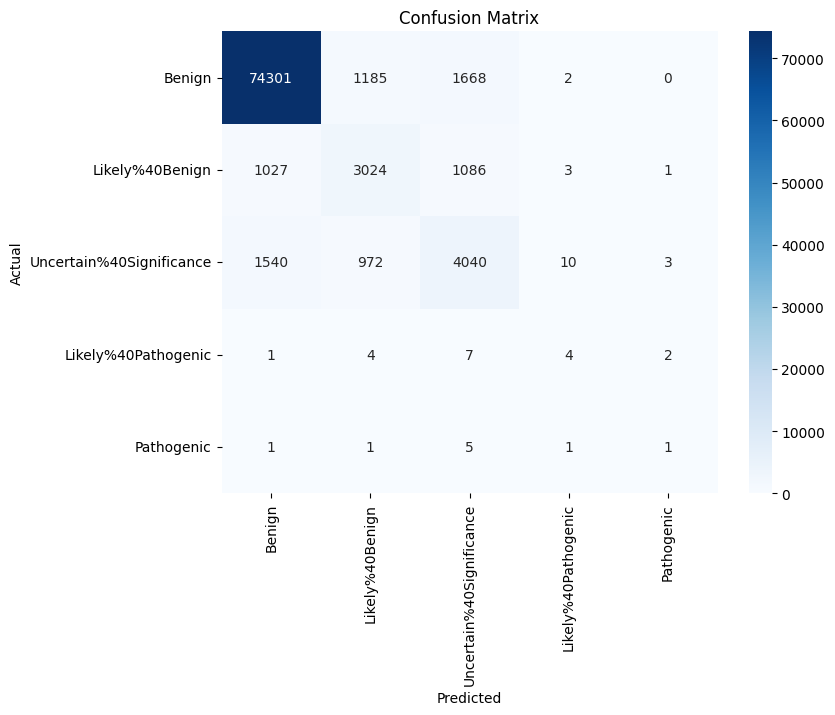

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     77156
           1       0.28      0.65      0.40      5141
           2       0.28      0.61      0.39      6565
           3       0.03      0.72      0.05        18
           4       0.22      0.67      0.33         9

    accuracy                           0.77     88889
   macro avg       0.36      0.69      0.41     88889
weighted avg       0.88      0.77      0.81     88889



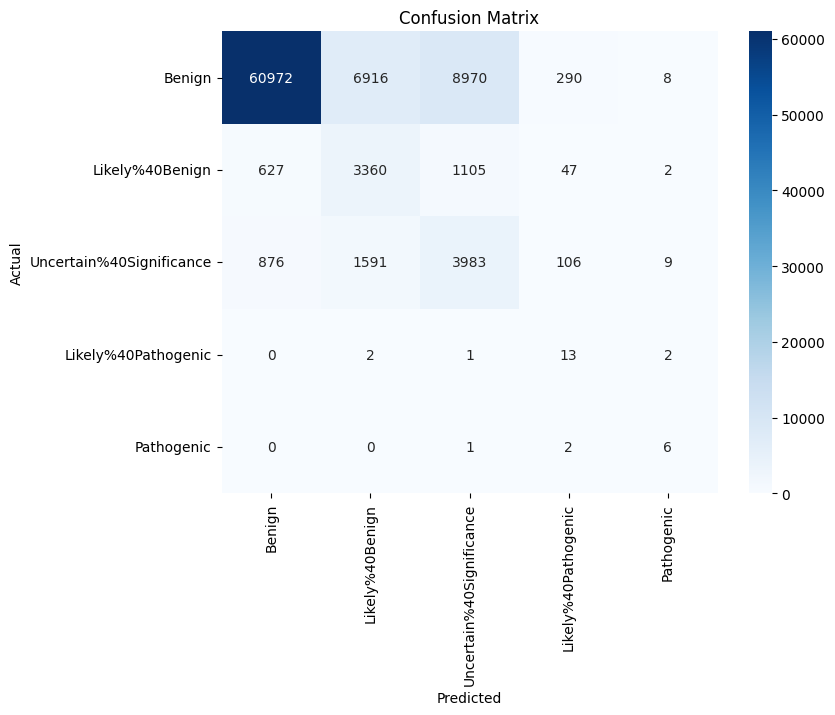

Classification report for Random Forest with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       1.00      0.22      0.36        18
           4       0.33      0.11      0.17         9

    accuracy                           0.94     88889
   macro avg       0.77      0.52      0.58     88889
weighted avg       0.94      0.94      0.94     88889



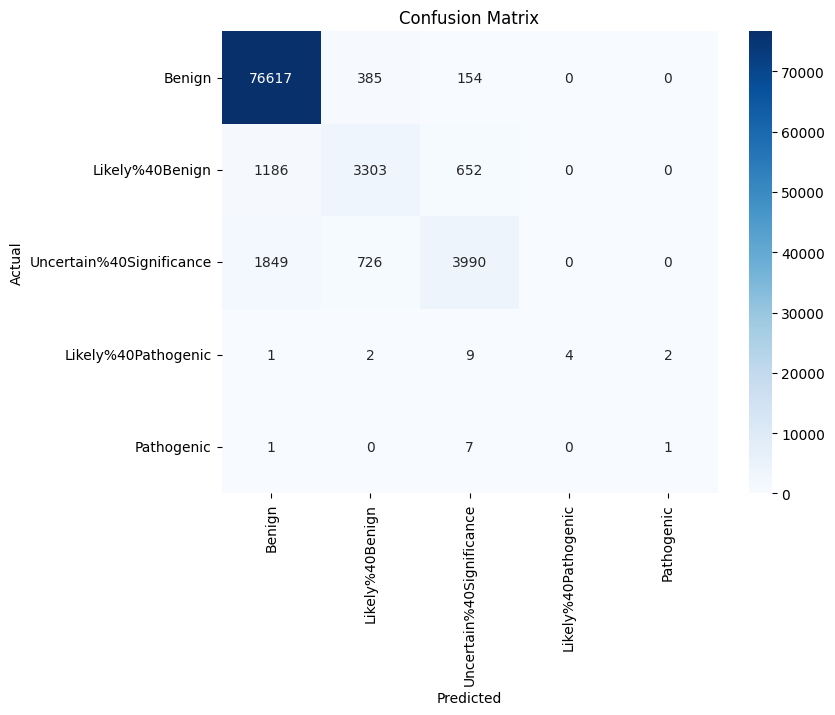

Classification report for AdaBoost with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



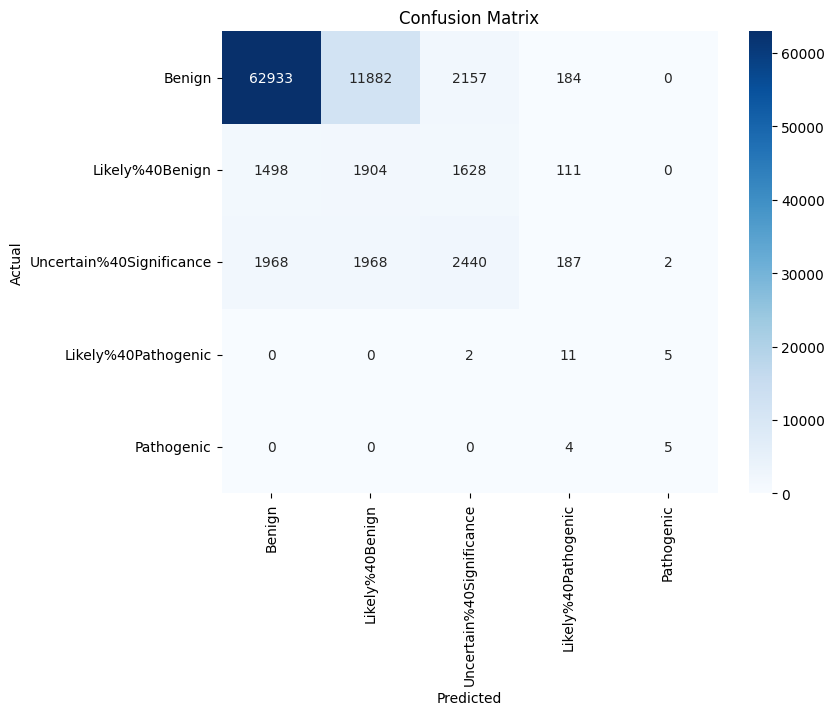

Classification report for Bagging with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.67      0.22      0.33        18
           4       0.75      0.33      0.46         9

    accuracy                           0.94     88889
   macro avg       0.77      0.56      0.63     88889
weighted avg       0.94      0.94      0.94     88889



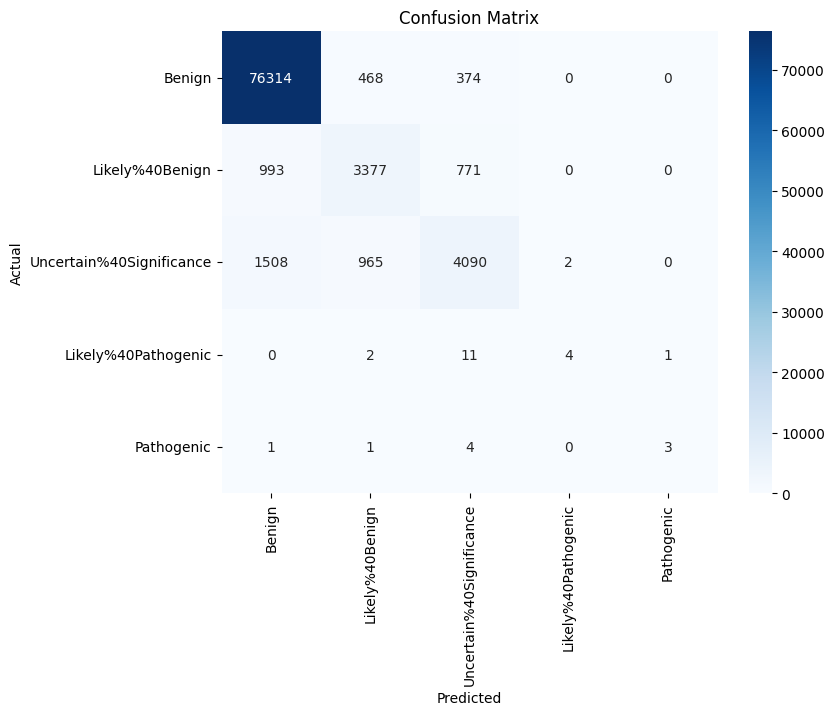

Classification report for Decision Tree with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.58      0.59      5141
           2       0.60      0.62      0.61      6565
           3       0.20      0.17      0.18        18
           4       0.22      0.22      0.22         9

    accuracy                           0.92     88889
   macro avg       0.51      0.51      0.51     88889
weighted avg       0.92      0.92      0.92     88889



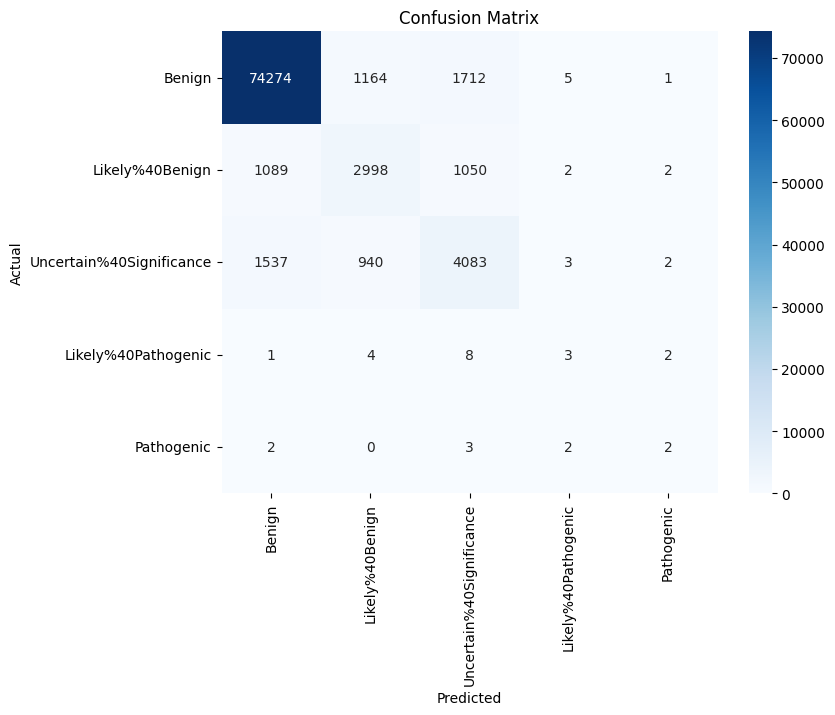

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     77156
           1       0.28      0.65      0.39      5141
           2       0.28      0.60      0.38      6565
           3       0.02      0.50      0.03        18
           4       0.11      0.67      0.18         9

    accuracy                           0.76     88889
   macro avg       0.33      0.64      0.37     88889
weighted avg       0.88      0.76      0.81     88889



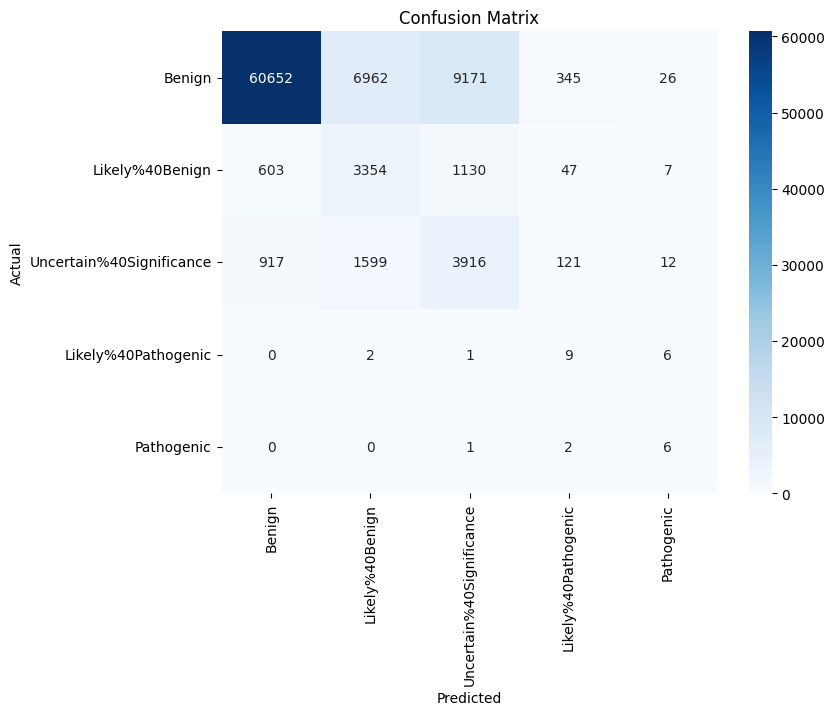

Classification report for Random Forest with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       0.83      0.28      0.42        18
           4       0.33      0.11      0.17         9

    accuracy                           0.94     88889
   macro avg       0.74      0.53      0.59     88889
weighted avg       0.94      0.94      0.94     88889



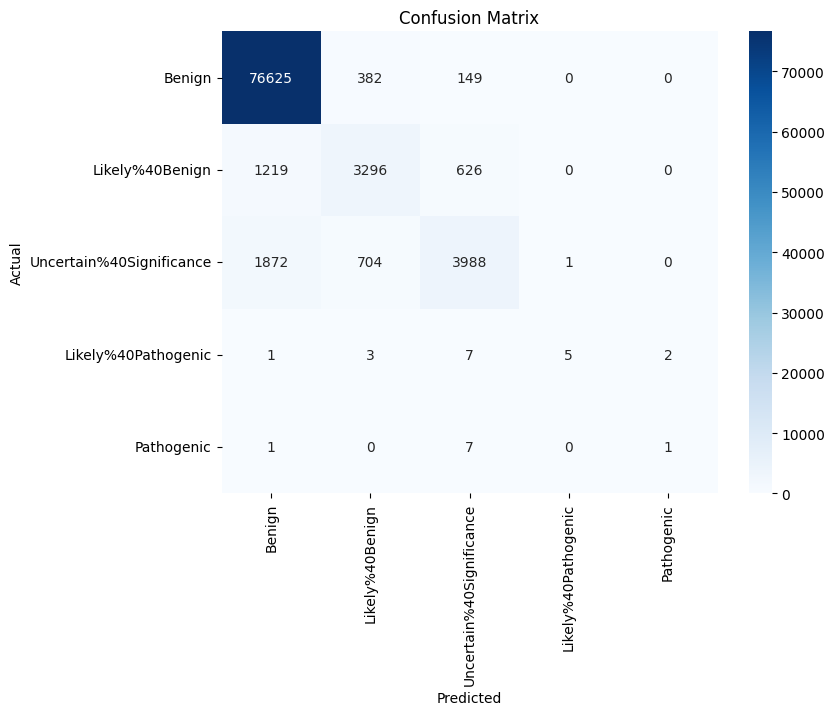

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



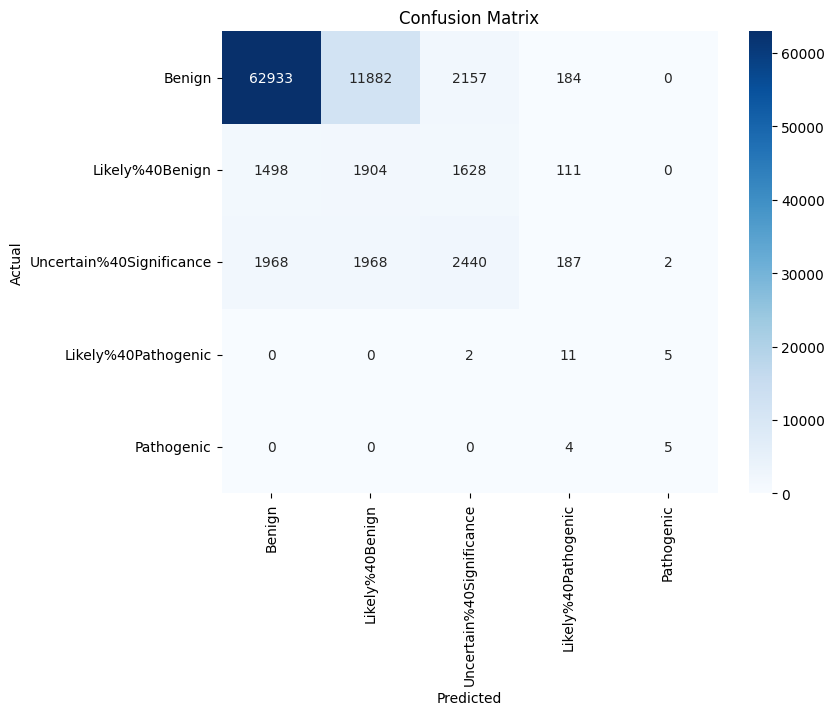

Classification report for Bagging with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.50      0.17      0.25        18
           4       0.25      0.11      0.15         9

    accuracy                           0.94     88889
   macro avg       0.64      0.51      0.55     88889
weighted avg       0.94      0.94      0.94     88889



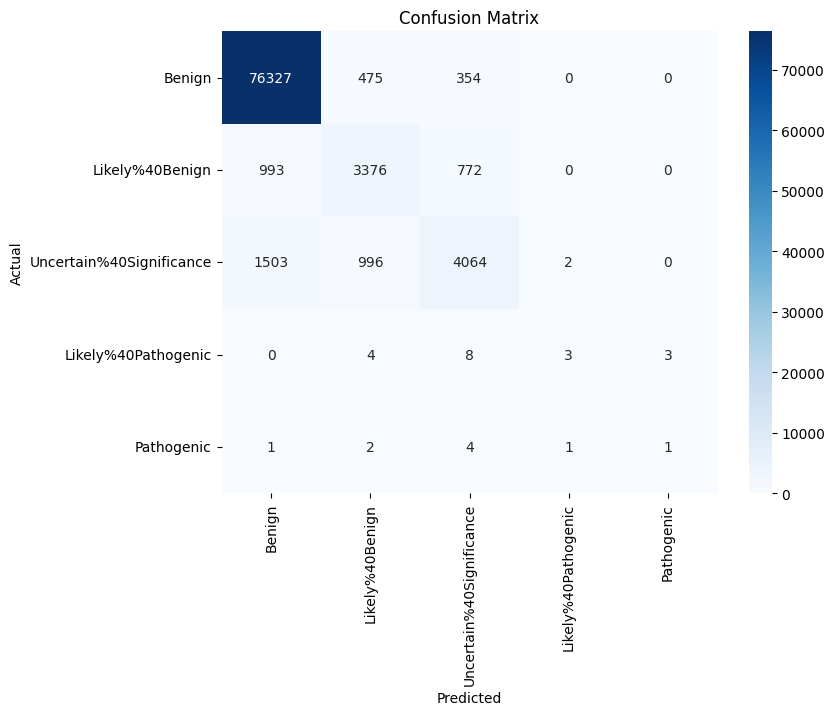

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.58      0.59      0.59      5141
           2       0.60      0.62      0.61      6565
           3       0.18      0.17      0.17        18
           4       0.25      0.22      0.24         9

    accuracy                           0.92     88889
   macro avg       0.52      0.51      0.51     88889
weighted avg       0.92      0.92      0.92     88889



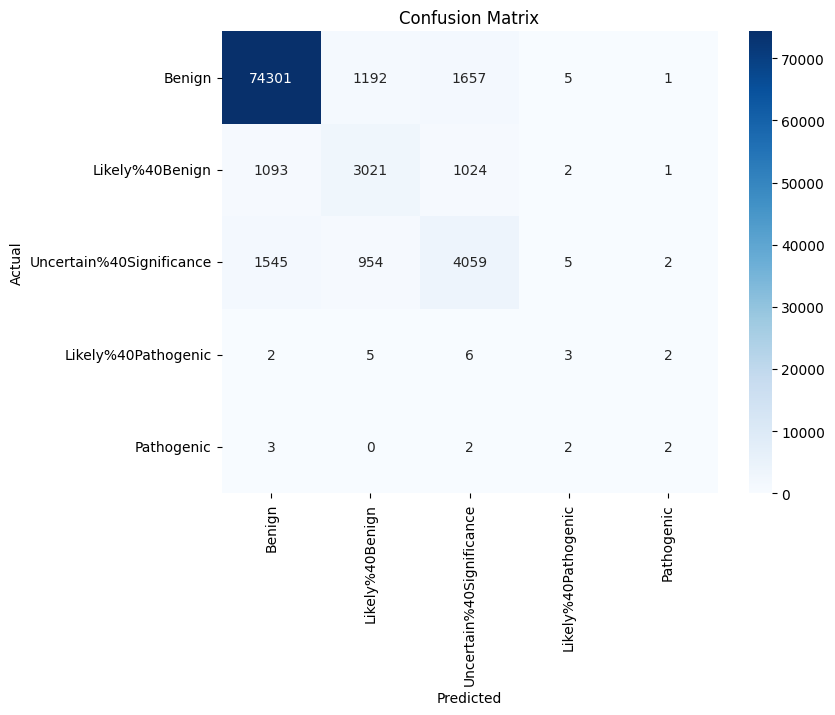

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.98      0.42      0.59     77156
           1       0.13      0.33      0.19      5141
           2       0.14      0.63      0.23      6565
           3       0.00      0.56      0.01        18
           4       0.00      0.89      0.00         9

    accuracy                           0.43     88889
   macro avg       0.25      0.56      0.20     88889
weighted avg       0.87      0.43      0.54     88889



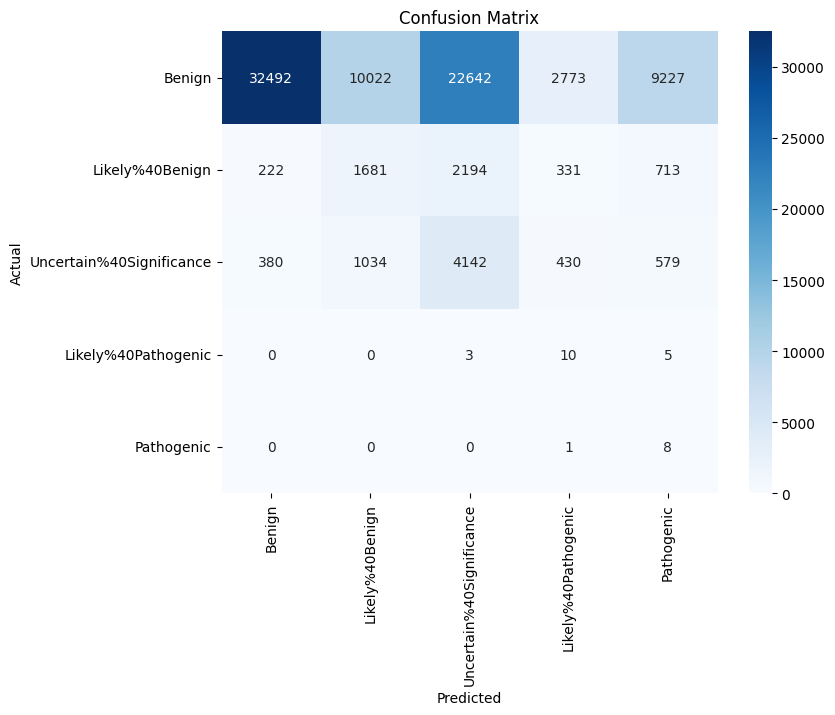

Classification report for Random Forest with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.84      0.61      0.71      6565
           3       0.86      0.33      0.48        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.78      0.56      0.63     88889
weighted avg       0.94      0.94      0.94     88889



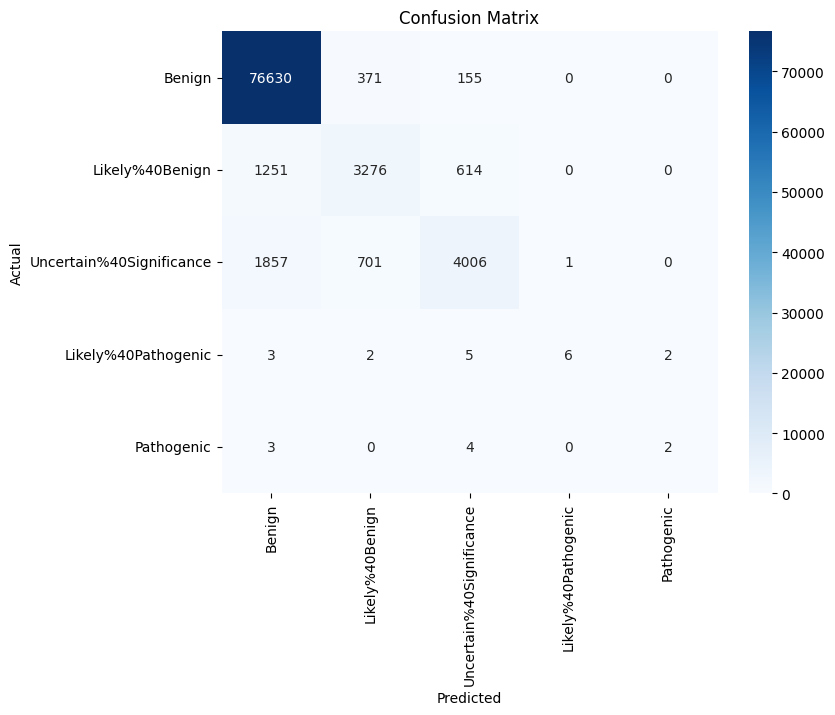

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     77156
           1       0.10      0.75      0.17      5141
           2       0.47      0.12      0.19      6565
           3       0.03      0.78      0.05        18
           4       0.43      0.33      0.38         9

    accuracy                           0.55     88889
   macro avg       0.40      0.51      0.30     88889
weighted avg       0.87      0.55      0.65     88889



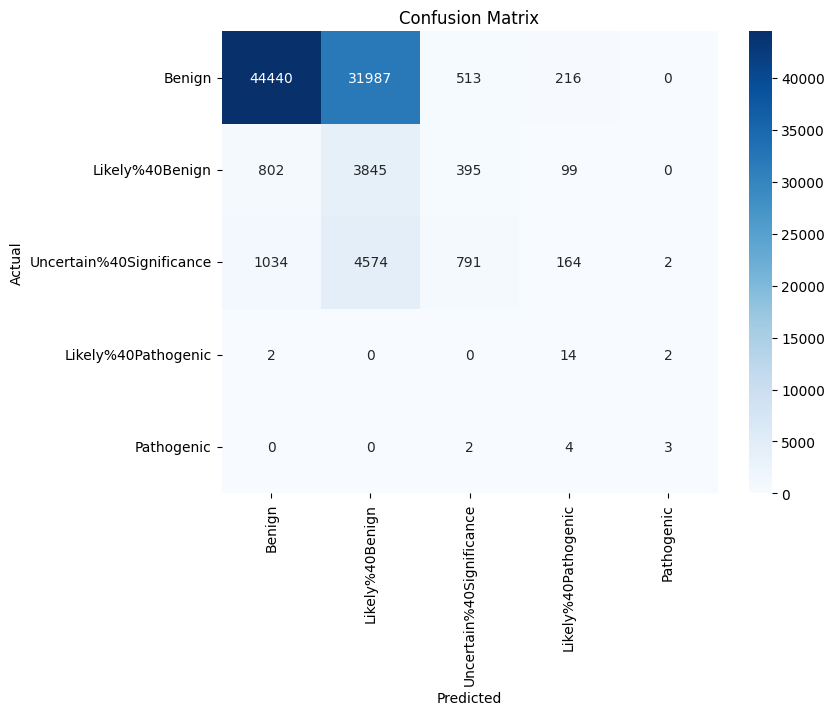

Classification report for Bagging with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.69      0.65      0.67      5141
           2       0.78      0.62      0.69      6565
           3       0.62      0.28      0.38        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.61      0.51      0.54     88889
weighted avg       0.94      0.94      0.94     88889



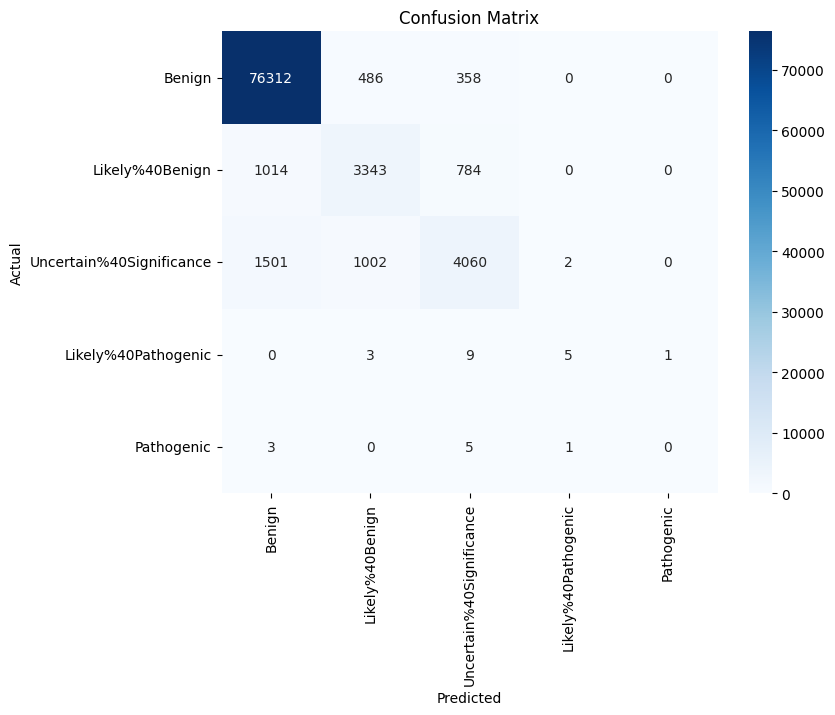

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.58      0.58      0.58      5141
           2       0.59      0.61      0.60      6565
           3       0.27      0.22      0.24        18
           4       0.12      0.11      0.12         9

    accuracy                           0.92     88889
   macro avg       0.51      0.50      0.50     88889
weighted avg       0.92      0.92      0.92     88889



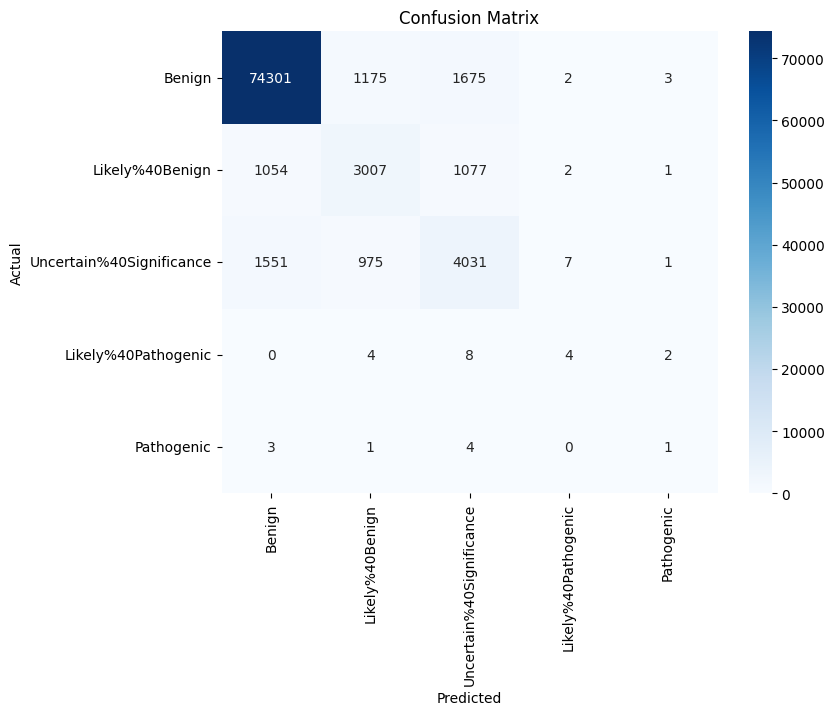

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.37      0.53     77156
           1       0.14      0.35      0.20      5141
           2       0.12      0.42      0.18      6565
           3       0.00      0.44      0.00        18
           4       0.00      0.89      0.00         9

    accuracy                           0.37     88889
   macro avg       0.25      0.49      0.18     88889
weighted avg       0.86      0.37      0.49     88889



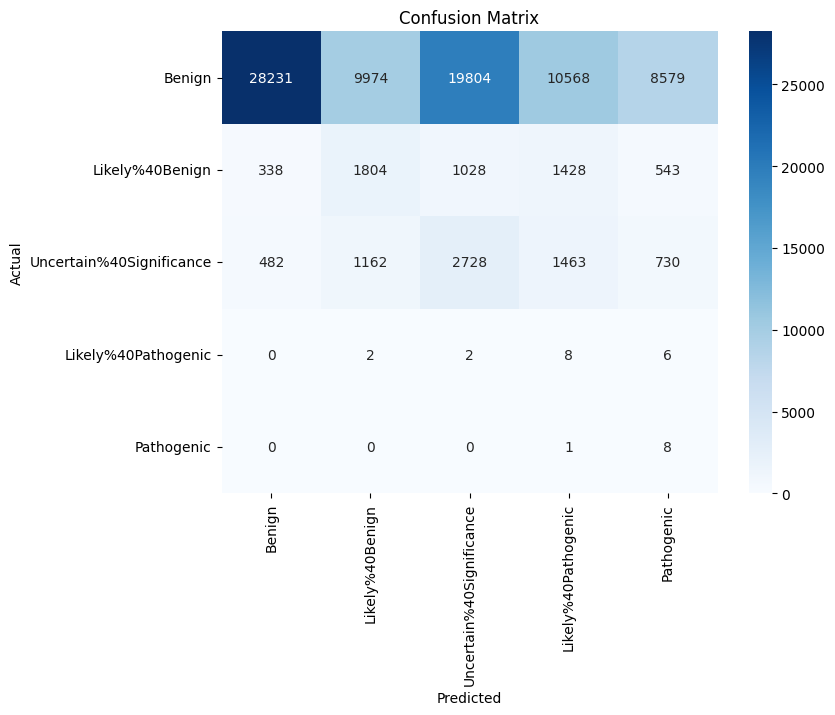

Classification report for Random Forest with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       0.80      0.22      0.35        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.77      0.54      0.61     88889
weighted avg       0.94      0.94      0.94     88889



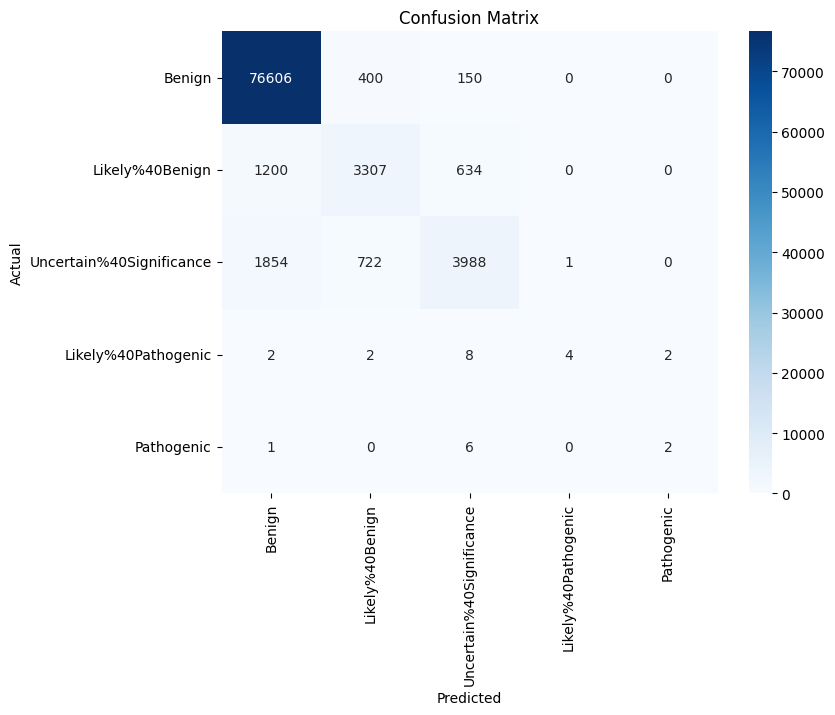

Classification report for AdaBoost with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



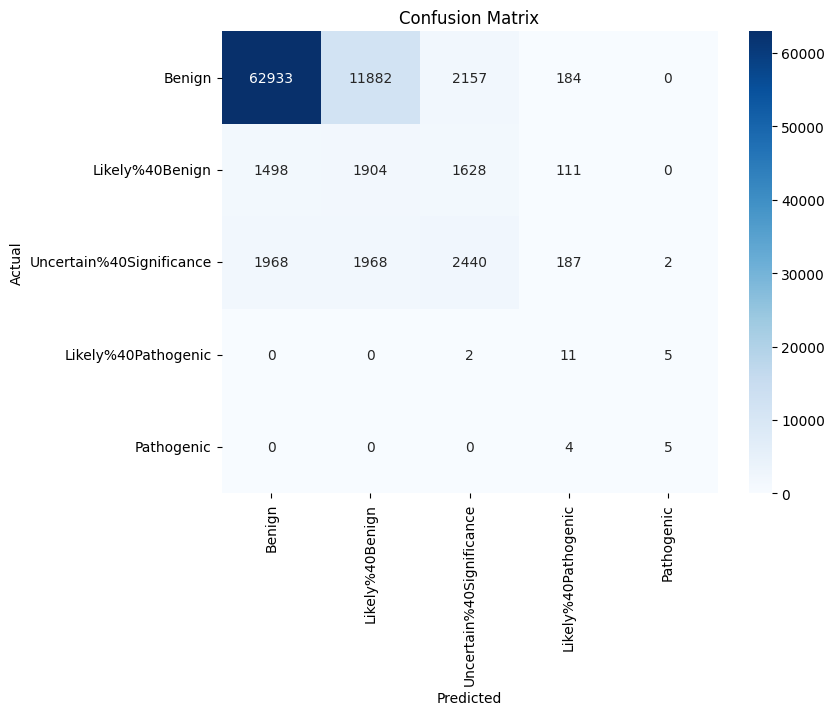

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for Bagging with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.62      0.28      0.38        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.62      0.51      0.55     88889
weighted avg       0.94      0.94      0.94     88889



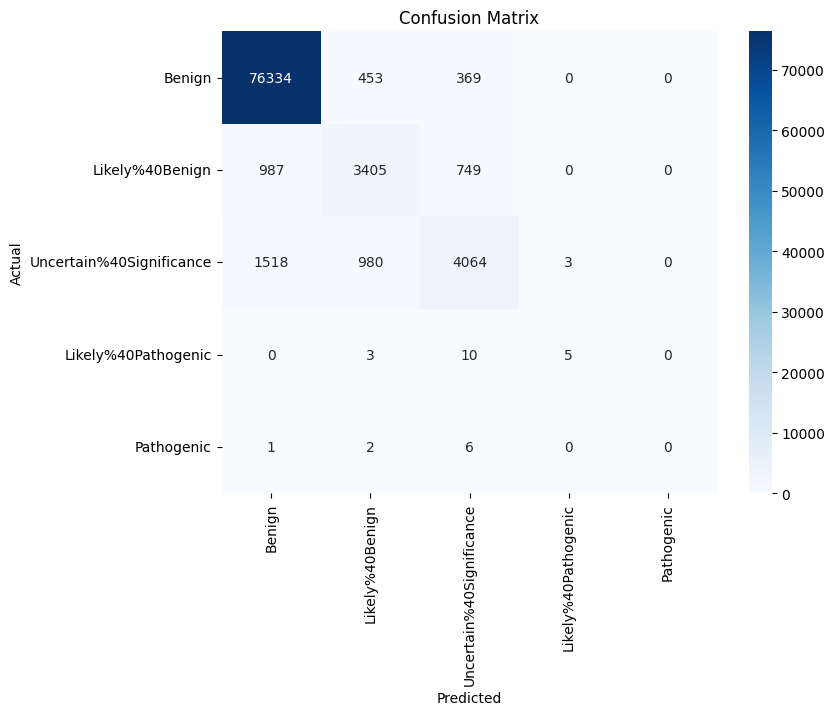

Classification report for Decision Tree with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.58      0.59      5141
           2       0.60      0.62      0.61      6565
           3       0.19      0.28      0.23        18
           4       0.25      0.22      0.24         9

    accuracy                           0.92     88889
   macro avg       0.52      0.53      0.52     88889
weighted avg       0.92      0.92      0.92     88889



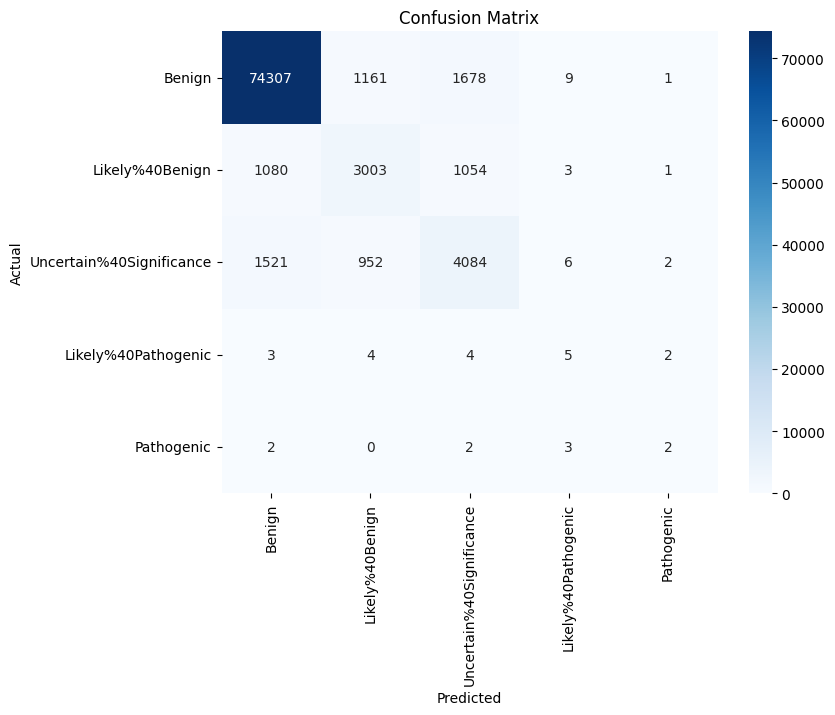

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.47      0.64     77156
           1       0.14      0.41      0.20      5141
           2       0.17      0.40      0.23      6565
           3       0.00      0.56      0.00        18
           4       0.00      0.67      0.00         9

    accuracy                           0.46     88889
   macro avg       0.25      0.50      0.22     88889
weighted avg       0.86      0.46      0.58     88889



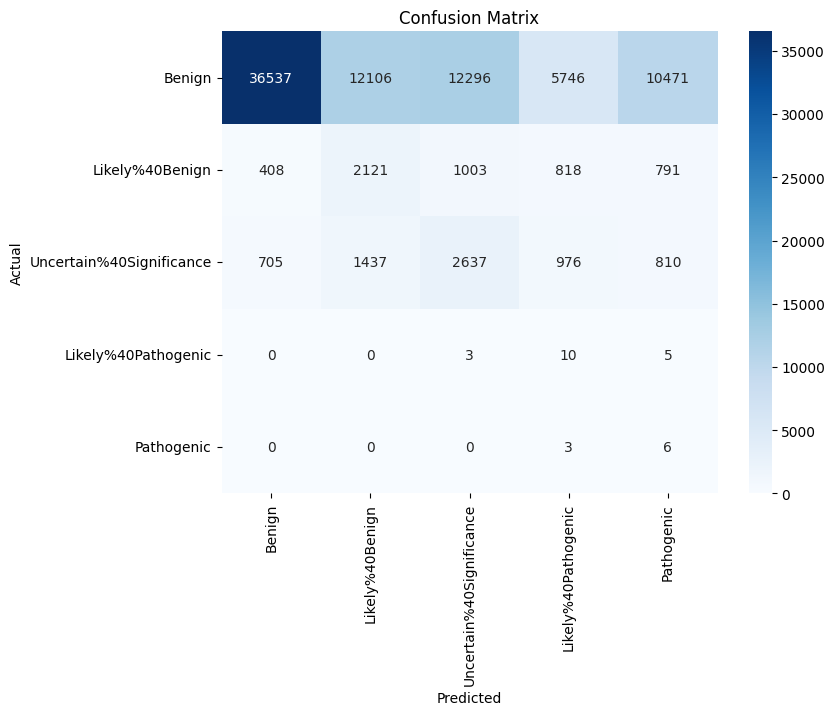

In [36]:
preprocessings = [
    ("None", None),
    ("MinMax", MinMaxScaler()),
    ("Robust", RobustScaler())
]

datasets = [
    ("Encoded - OneHot Nans, Outside Range", encoded_df1),
    ("Encoded - OneHot Nans, Median",encoded_df2),
    ("Encoded - Outside Range", encoded_df3)
]

for preprocessing_name, preprocessing_method in preprocessings:
    for dataset_name, dataset in datasets:
        X = dataset.drop(columns=['ACMG_class'])
        y = dataset['ACMG_class']

        if preprocessing_name != "None":
            X = pd.DataFrame(preprocessing_method.fit_transform(X), columns=X.columns)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model_seed = 42

        class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

        models = [
            ('Random Forest', RandomForestClassifier(class_weight=dict(enumerate(class_weights)), random_state=model_seed)),
            ('AdaBoost', AdaBoostClassifier(random_state=model_seed)),
            ('Bagging', BaggingClassifier(random_state=model_seed)),
            ('Decision Tree', DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), random_state=model_seed)),
            ('Logistic Regression', LogisticRegression(max_iter=1000, class_weight=dict(enumerate(class_weights)), random_state=model_seed)),
            
        ]

        for model_name, model in models:
            clf = model

            pipeline = Pipeline([
                ('classifier', clf)
            ])

            if model_name == 'AdaBoost':
                sample_weights = class_weights[np.searchsorted(np.unique(y_train), y_train)]
                pipeline.fit(X_train, y_train, classifier__sample_weight=sample_weights)
            else:
                pipeline.fit(X_train, y_train)
            
            y_pred = pipeline.predict(X_test)
            report = classification_report(y_test, y_pred)
            print(f"Classification report for {model_name} with dataset {dataset_name} and preprocessing {preprocessing_name}:")
            print(report)

            get_confusion_matrix_plot(y_test, y_pred, inverted_mapping)

Classification report for CatBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.64      5141
           2       0.54      0.75      0.63      6565
           3       0.35      0.50      0.41        18
           4       0.38      0.33      0.35         9

    accuracy                           0.90     88889
   macro avg       0.55      0.66      0.60     88889
weighted avg       0.93      0.90      0.91     88889



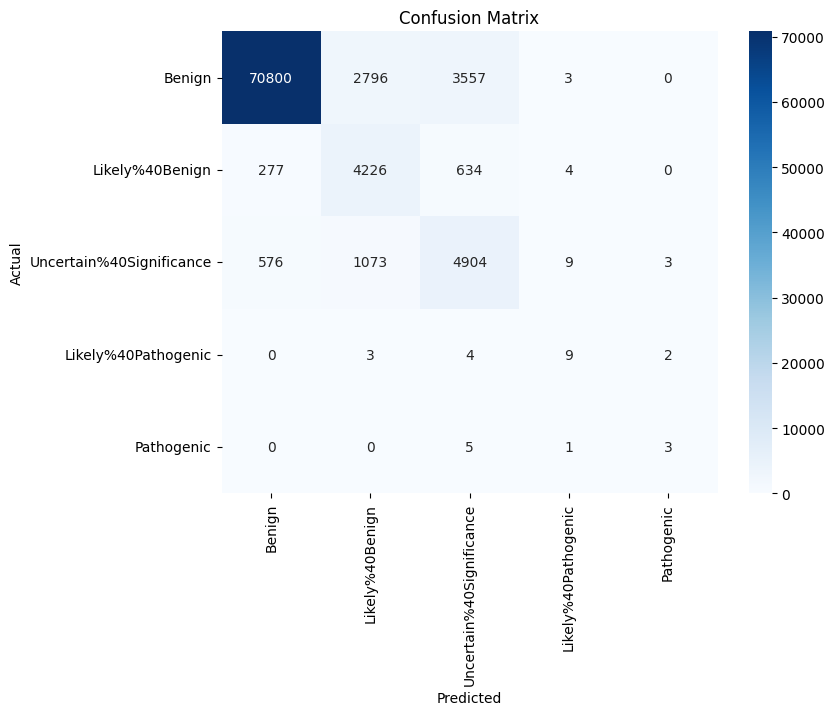

d:\pathogenicity_project\pathogenicity\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for XGBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.74      0.67      0.70      5141
           2       0.79      0.64      0.71      6565
           3       0.80      0.44      0.57        18
           4       0.60      0.33      0.43         9

    accuracy                           0.95     88889
   macro avg       0.78      0.62      0.68     88889
weighted avg       0.94      0.95      0.94     88889



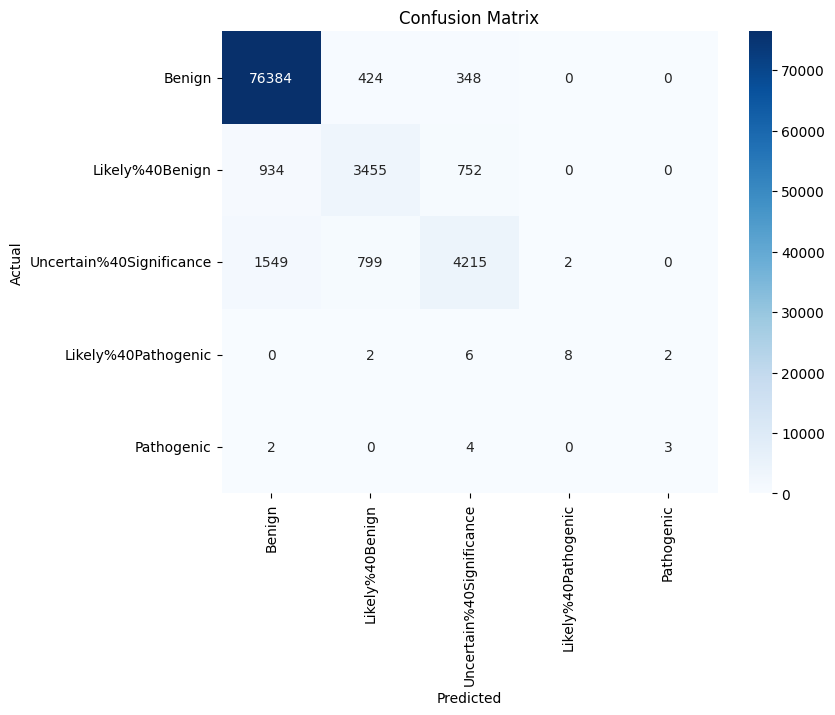

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9304
[LightGBM] [Info] Number of data points in the train set: 355555, number of used features: 159
[LightGBM] [Info] Start training from score -1.630245
[LightGBM] [Info] Start training from score -1.629008
[LightGBM] [Info] Start training from score -1.621538
[LightGBM] [Info] Start training from score -1.563183
[LightGBM] [Info] Start training from score -1.604791
Classification report for LightGBM with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.51      0.82      0.63      5141
           2       0.53      0.73      0.62      6565
           3       0.58      0.61      0.59      

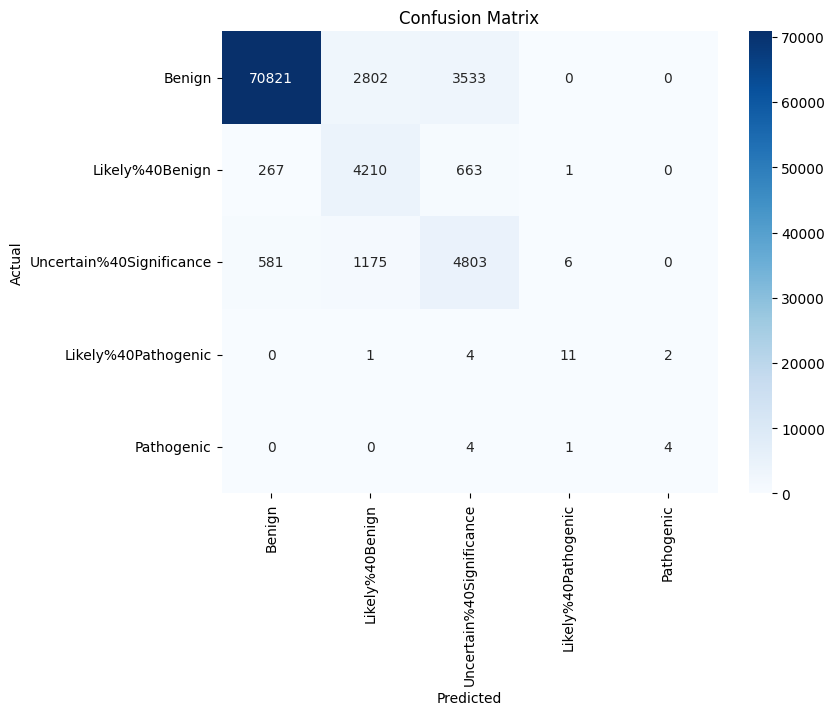

Classification report for Random Forest with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       0.83      0.28      0.42        18
           4       0.50      0.11      0.18         9

    accuracy                           0.94     88889
   macro avg       0.78      0.53      0.59     88889
weighted avg       0.94      0.94      0.94     88889



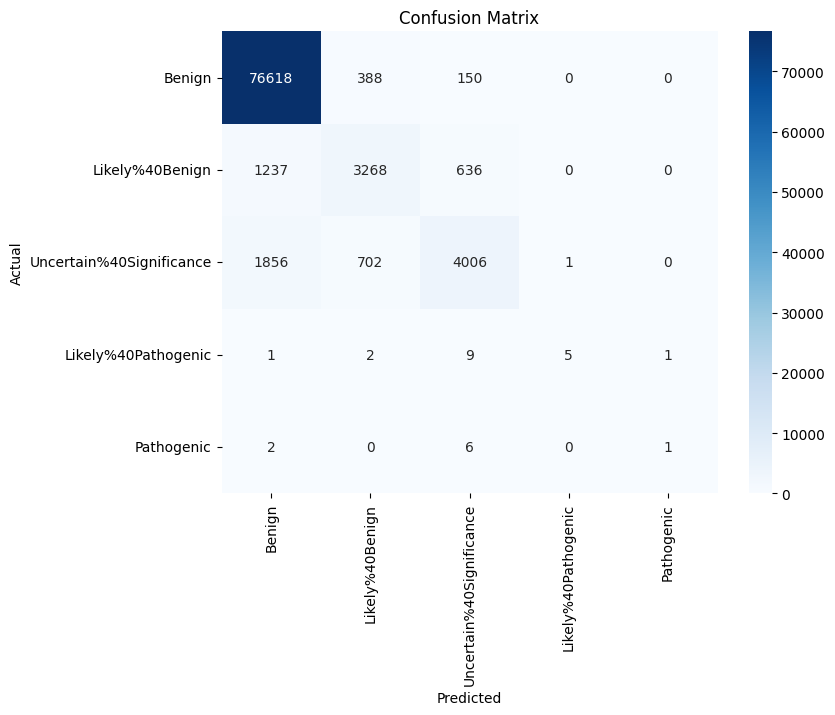

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



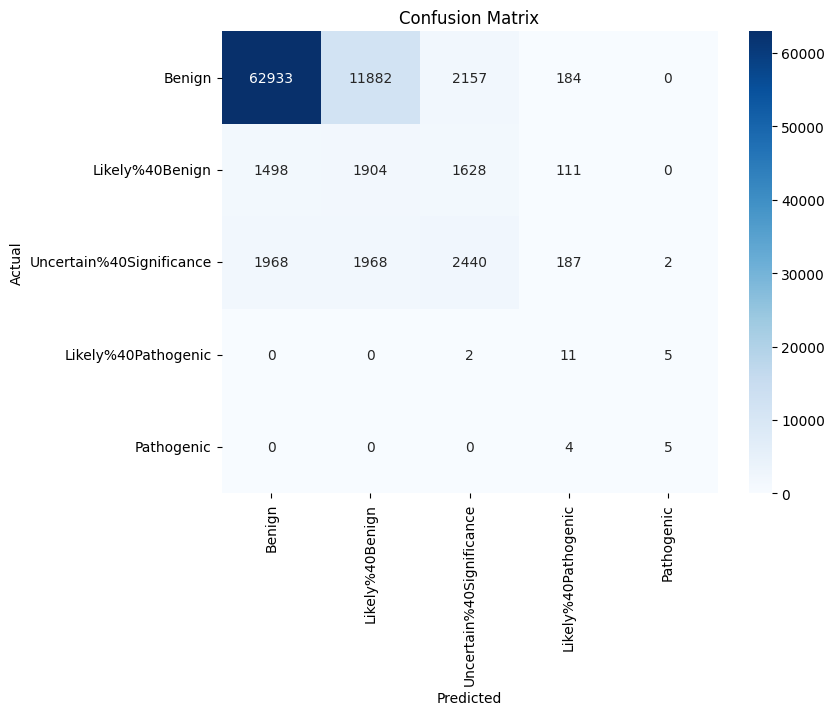

Classification report for Bagging with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.50      0.11      0.18        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.59      0.48      0.51     88889
weighted avg       0.94      0.94      0.94     88889



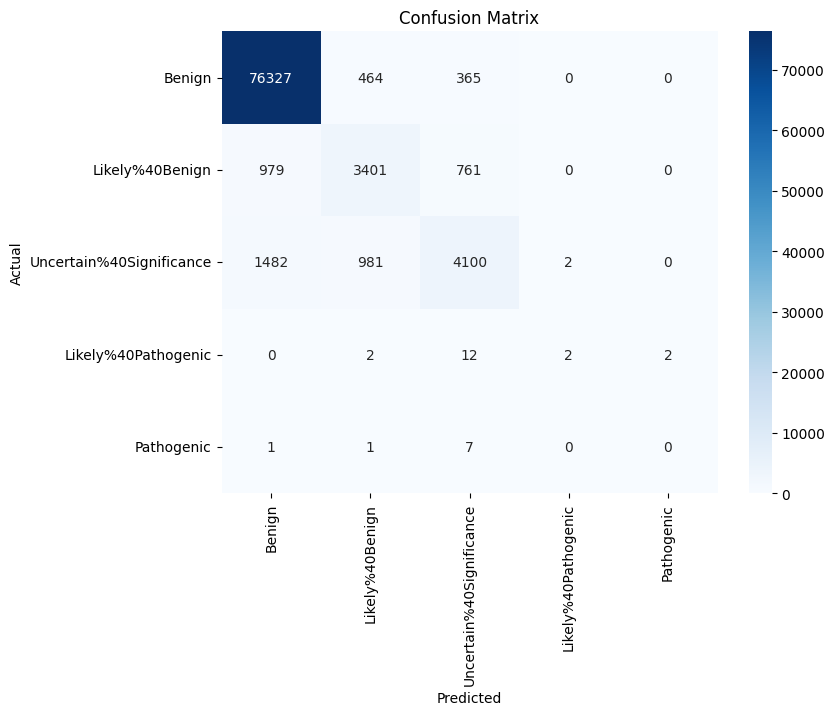

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.59      0.59      5141
           2       0.59      0.62      0.61      6565
           3       0.22      0.28      0.24        18
           4       0.25      0.22      0.24         9

    accuracy                           0.92     88889
   macro avg       0.52      0.53      0.53     88889
weighted avg       0.92      0.92      0.92     88889



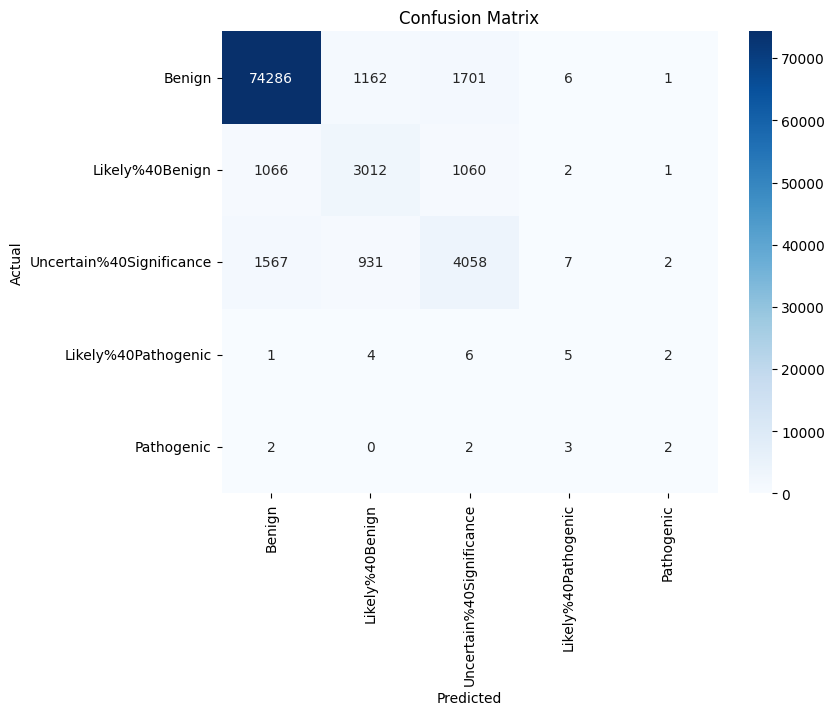

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.94      0.30      0.46     77156
           1       0.09      0.32      0.14      5141
           2       0.17      0.50      0.25      6565
           3       0.00      0.11      0.00        18
           4       0.00      0.56      0.00         9

    accuracy                           0.32     88889
   macro avg       0.24      0.36      0.17     88889
weighted avg       0.83      0.32      0.42     88889



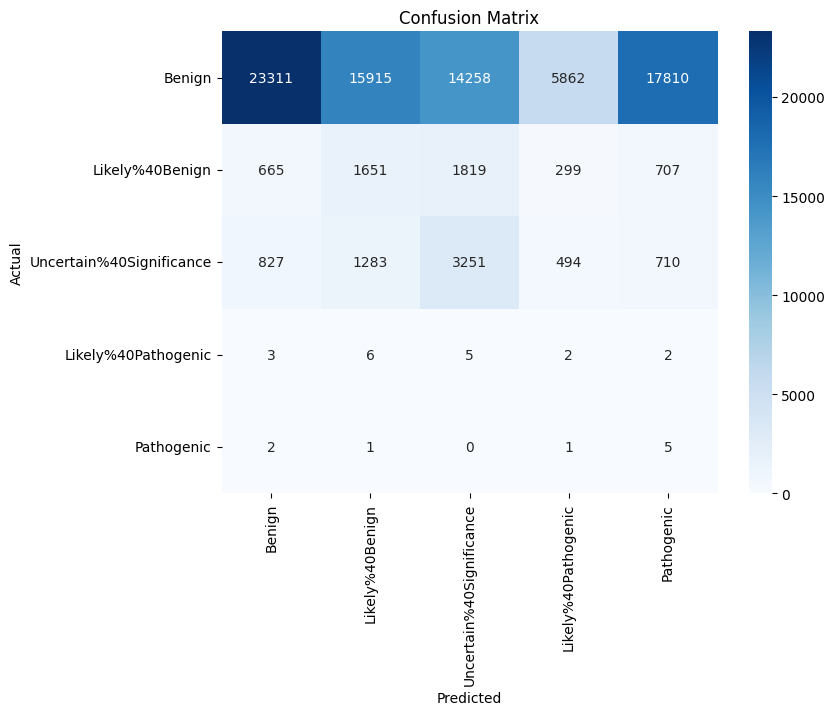

Classification report for CatBoost with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.64      5141
           2       0.53      0.75      0.62      6565
           3       0.37      0.56      0.44        18
           4       0.33      0.33      0.33         9

    accuracy                           0.90     88889
   macro avg       0.55      0.67      0.60     88889
weighted avg       0.93      0.90      0.91     88889



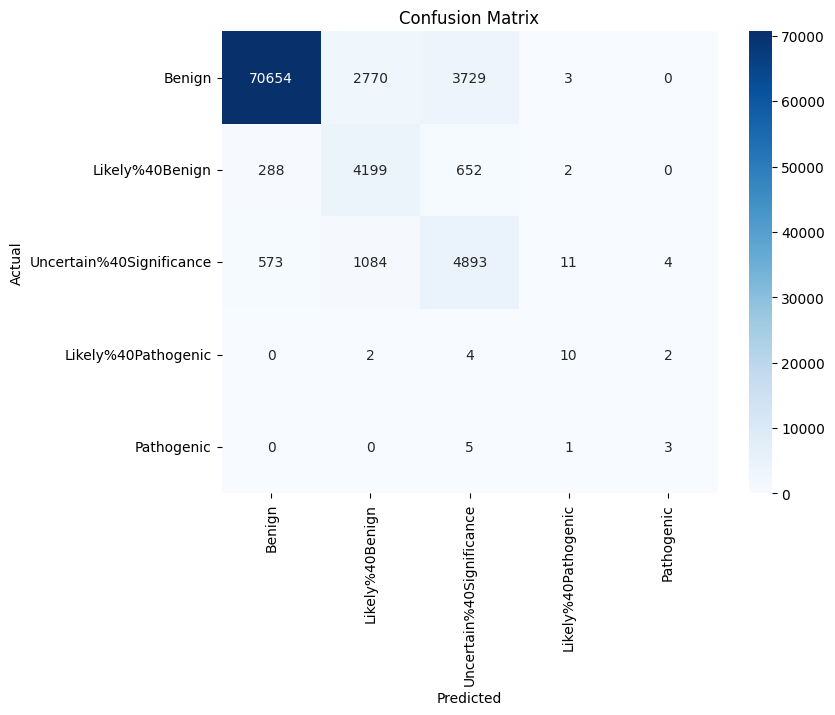

d:\pathogenicity_project\pathogenicity\lib\site-packages\xgboost\core.py:160: UserWarning: [01:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for XGBoost with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.74      0.67      0.71      5141
           2       0.80      0.64      0.71      6565
           3       0.75      0.50      0.60        18
           4       0.75      0.33      0.46         9

    accuracy                           0.95     88889
   macro avg       0.80      0.63      0.69     88889
weighted avg       0.94      0.95      0.94     88889



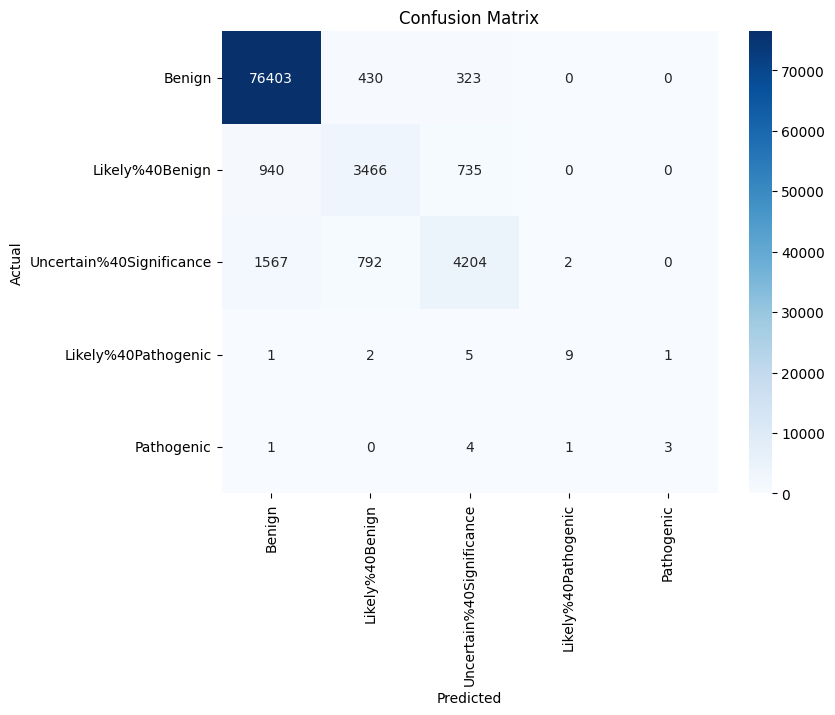

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9264
[LightGBM] [Info] Number of data points in the train set: 355555, number of used features: 158
[LightGBM] [Info] Start training from score -1.630245
[LightGBM] [Info] Start training from score -1.629008
[LightGBM] [Info] Start training from score -1.621538
[LightGBM] [Info] Start training from score -1.563183
[LightGBM] [Info] Start training from score -1.604791
Classification report for LightGBM with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.63      5141
           2       0.53      0.73      0.62      6565
           3       0.48      0.56      0.51        18
  

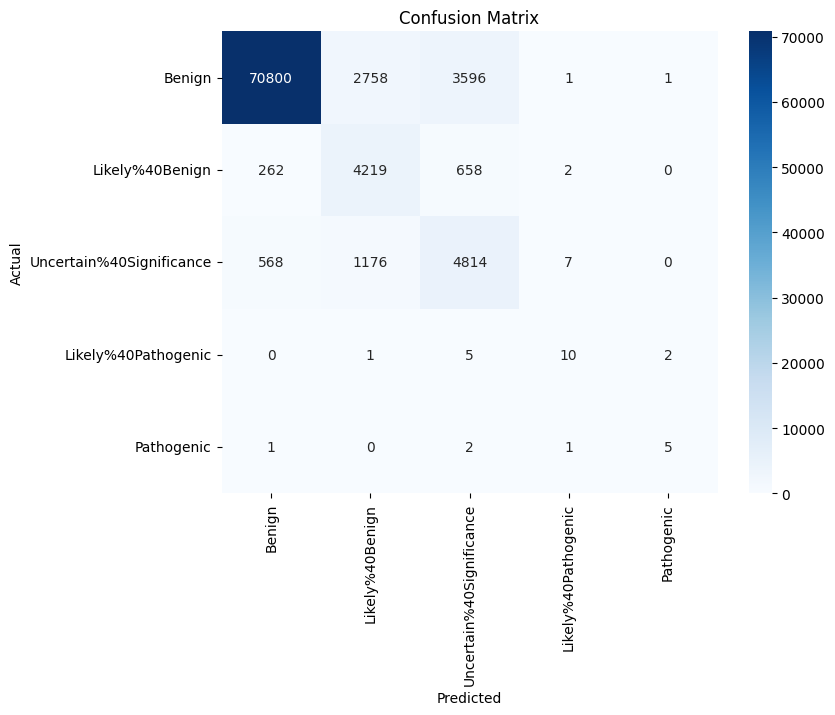

Classification report for Random Forest with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.84      0.61      0.71      6565
           3       0.88      0.39      0.54        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.69      0.53      0.58     88889
weighted avg       0.94      0.94      0.94     88889



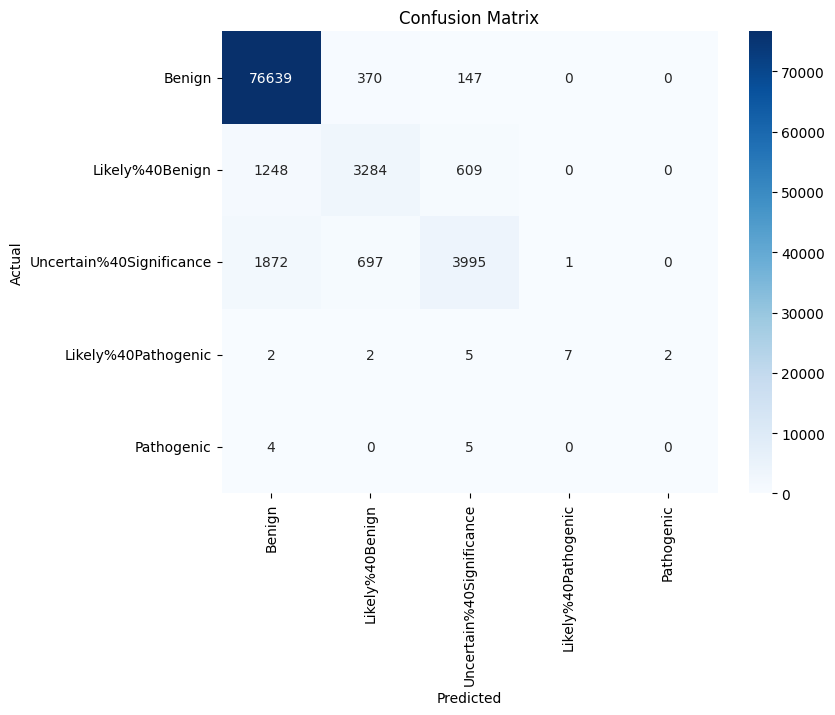

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     77156
           1       0.10      0.75      0.17      5141
           2       0.47      0.12      0.19      6565
           3       0.03      0.78      0.05        18
           4       0.43      0.33      0.38         9

    accuracy                           0.55     88889
   macro avg       0.40      0.51      0.30     88889
weighted avg       0.87      0.55      0.65     88889



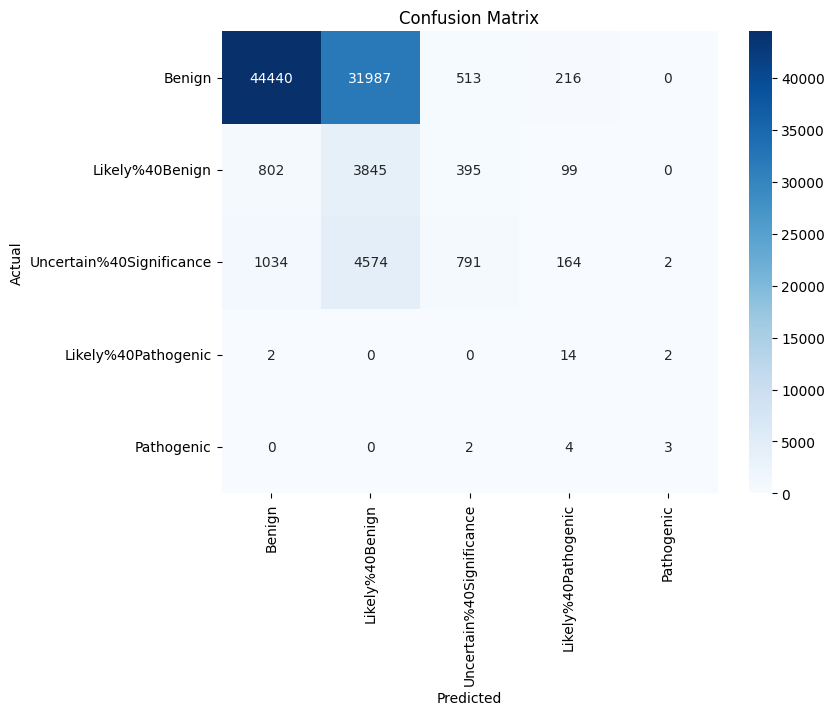

Classification report for Bagging with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.65      0.67      5141
           2       0.78      0.62      0.69      6565
           3       0.38      0.17      0.23        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.56      0.49      0.52     88889
weighted avg       0.94      0.94      0.94     88889



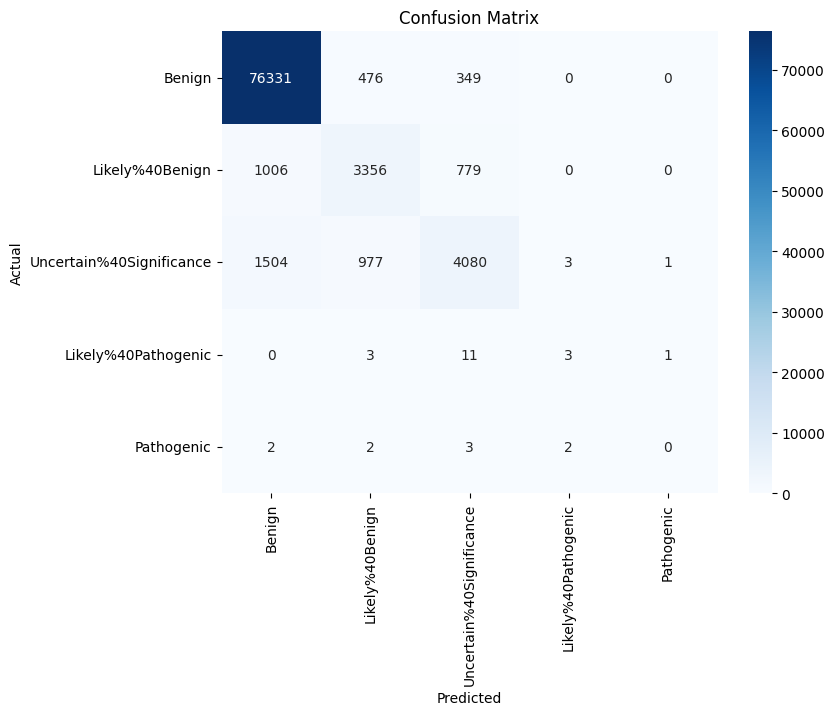

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.58      0.58      0.58      5141
           2       0.59      0.61      0.60      6565
           3       0.22      0.22      0.22        18
           4       0.12      0.11      0.12         9

    accuracy                           0.91     88889
   macro avg       0.50      0.50      0.50     88889
weighted avg       0.92      0.91      0.91     88889



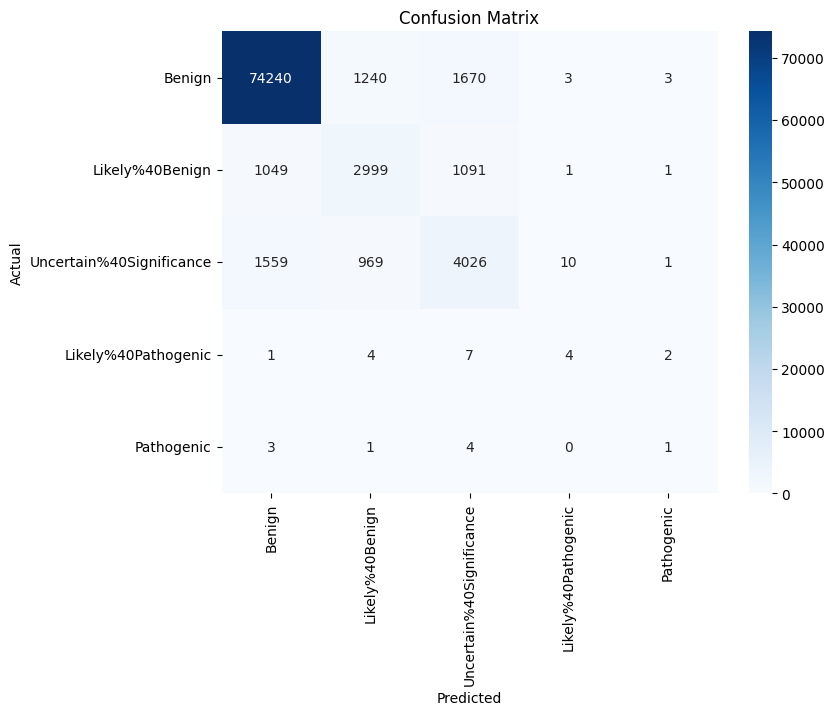

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Median and preprocessing None:
              precision    recall  f1-score   support

           0       0.93      0.32      0.48     77156
           1       0.07      0.21      0.11      5141
           2       0.16      0.57      0.25      6565
           3       0.00      0.06      0.00        18
           4       0.00      0.67      0.00         9

    accuracy                           0.33     88889
   macro avg       0.23      0.36      0.17     88889
weighted avg       0.83      0.33      0.44     88889



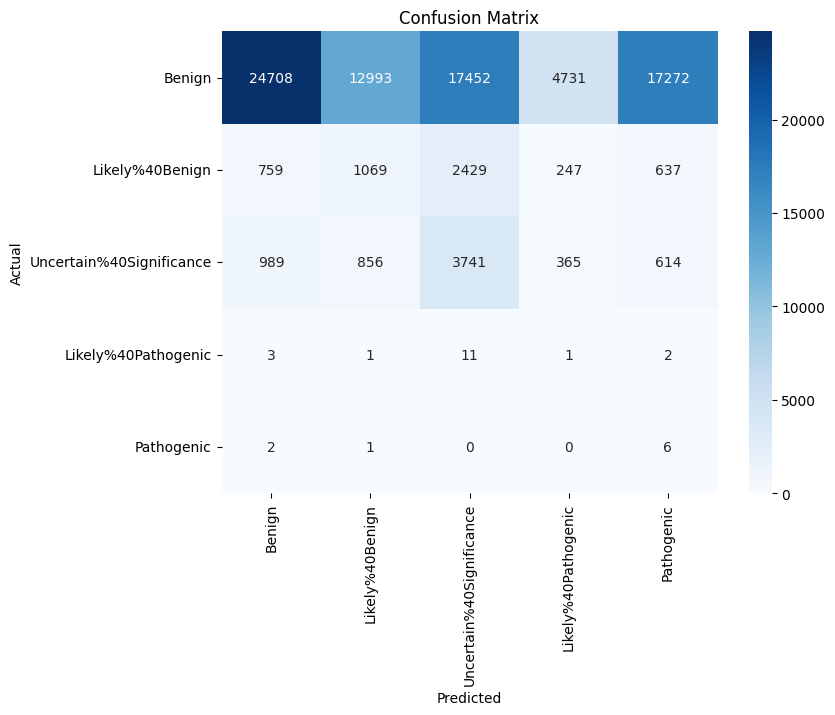

Classification report for CatBoost with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.81      0.64      5141
           2       0.53      0.75      0.62      6565
           3       0.35      0.50      0.41        18
           4       0.33      0.22      0.27         9

    accuracy                           0.90     88889
   macro avg       0.54      0.64      0.58     88889
weighted avg       0.93      0.90      0.91     88889



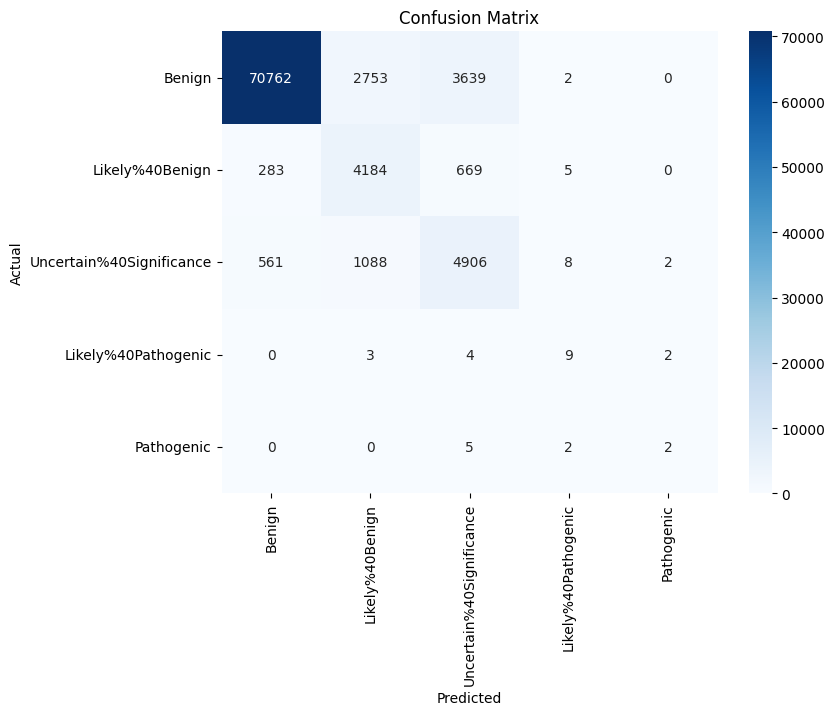

d:\pathogenicity_project\pathogenicity\lib\site-packages\xgboost\core.py:160: UserWarning: [01:26:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for XGBoost with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.74      0.68      0.71      5141
           2       0.80      0.64      0.71      6565
           3       0.89      0.44      0.59        18
           4       0.71      0.56      0.63         9

    accuracy                           0.95     88889
   macro avg       0.82      0.66      0.72     88889
weighted avg       0.94      0.95      0.94     88889



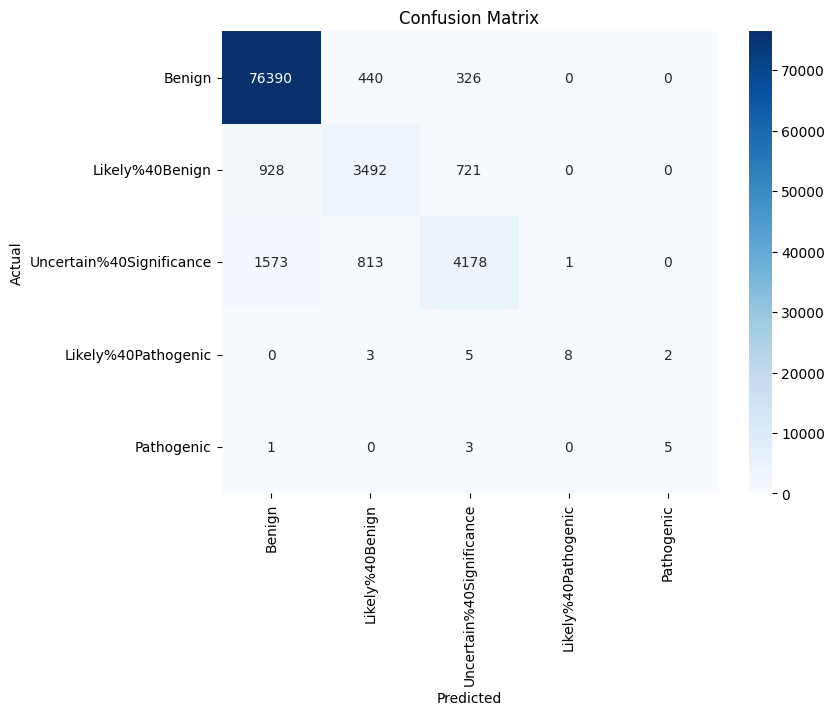

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9200
[LightGBM] [Info] Number of data points in the train set: 355555, number of used features: 107
[LightGBM] [Info] Start training from score -1.630245
[LightGBM] [Info] Start training from score -1.629008
[LightGBM] [Info] Start training from score -1.621538
[LightGBM] [Info] Start training from score -1.563183
[LightGBM] [Info] Start training from score -1.604791
Classification report for LightGBM with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.51      0.82      0.63      5141
           2       0.53      0.73      0.61      6565
           3       0.47      0.50      0.49        18
        

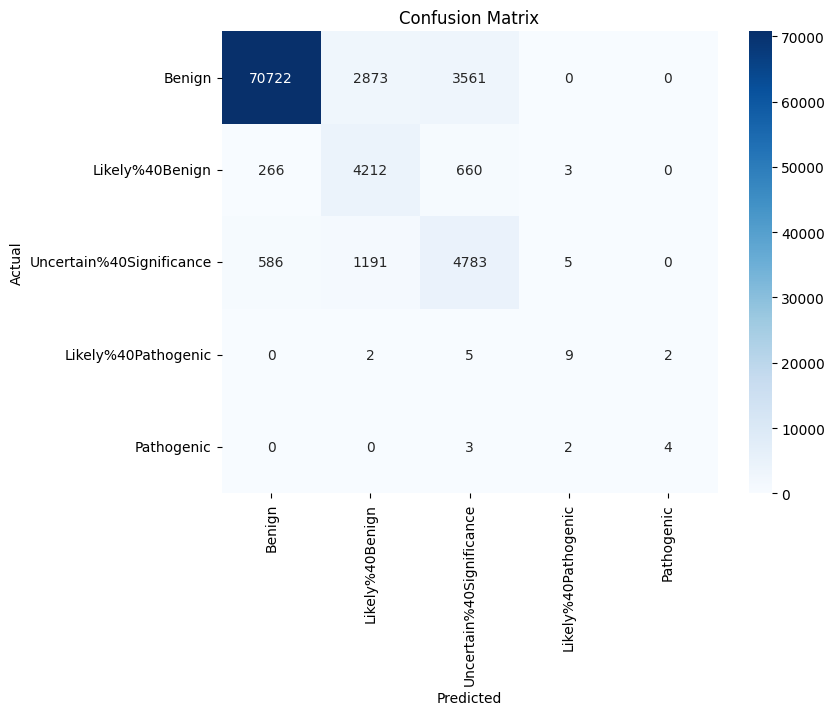

Classification report for Random Forest with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.63      0.69      5141
           2       0.83      0.61      0.70      6565
           3       1.00      0.28      0.43        18
           4       0.33      0.11      0.17         9

    accuracy                           0.94     88889
   macro avg       0.77      0.53      0.59     88889
weighted avg       0.94      0.94      0.94     88889



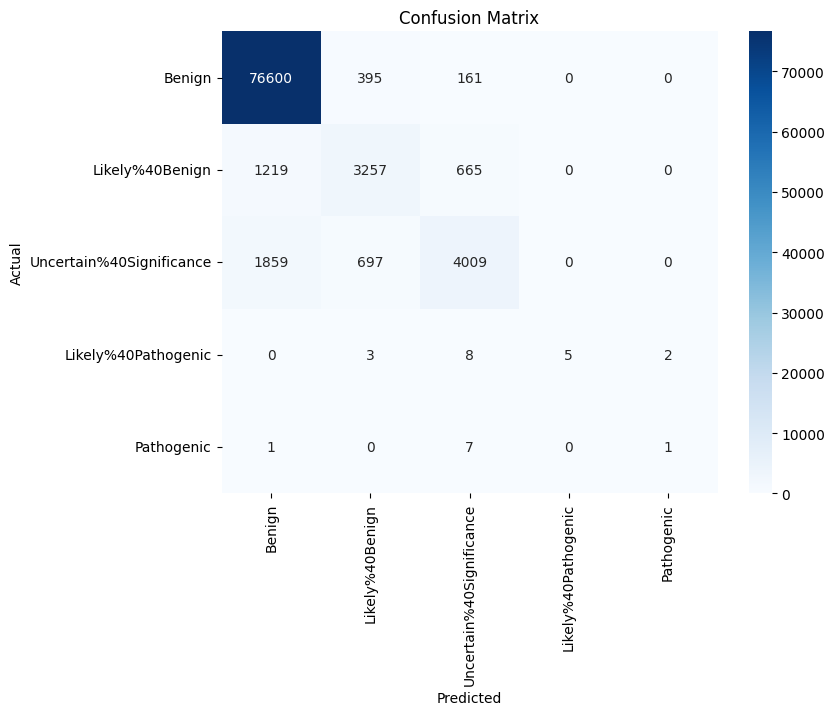

Classification report for AdaBoost with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



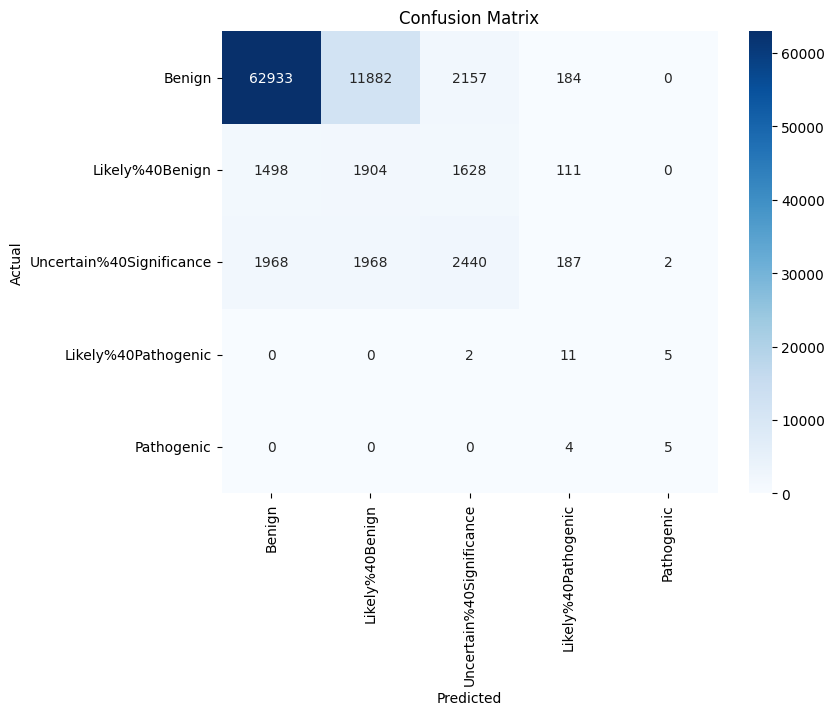

Classification report for Bagging with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.83      0.28      0.42        18
           4       0.50      0.11      0.18         9

    accuracy                           0.94     88889
   macro avg       0.76      0.53      0.59     88889
weighted avg       0.94      0.94      0.94     88889



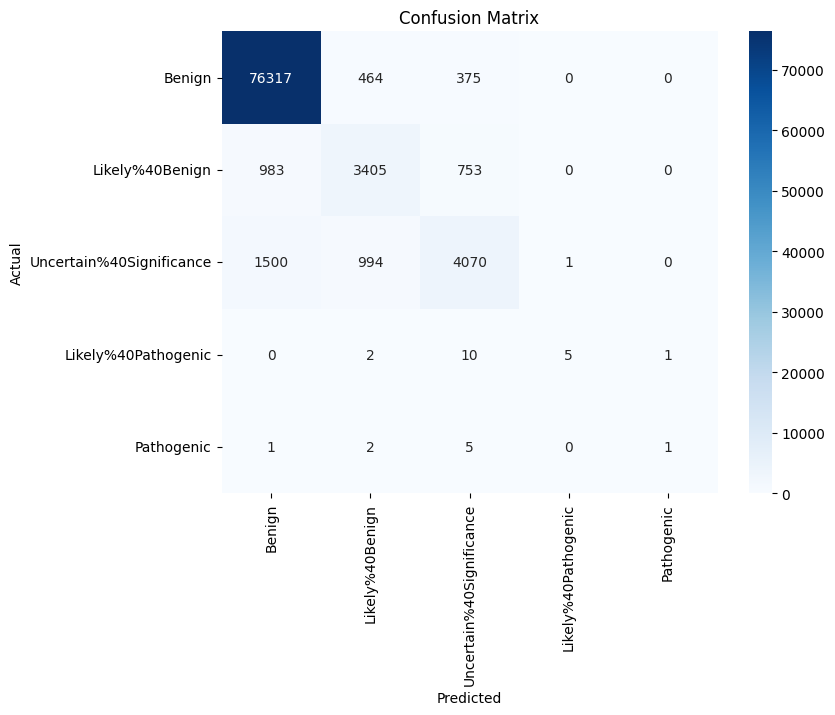

Classification report for Decision Tree with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.59      0.59      5141
           2       0.60      0.62      0.61      6565
           3       0.13      0.17      0.15        18
           4       0.22      0.22      0.22         9

    accuracy                           0.92     88889
   macro avg       0.50      0.51      0.51     88889
weighted avg       0.92      0.92      0.92     88889



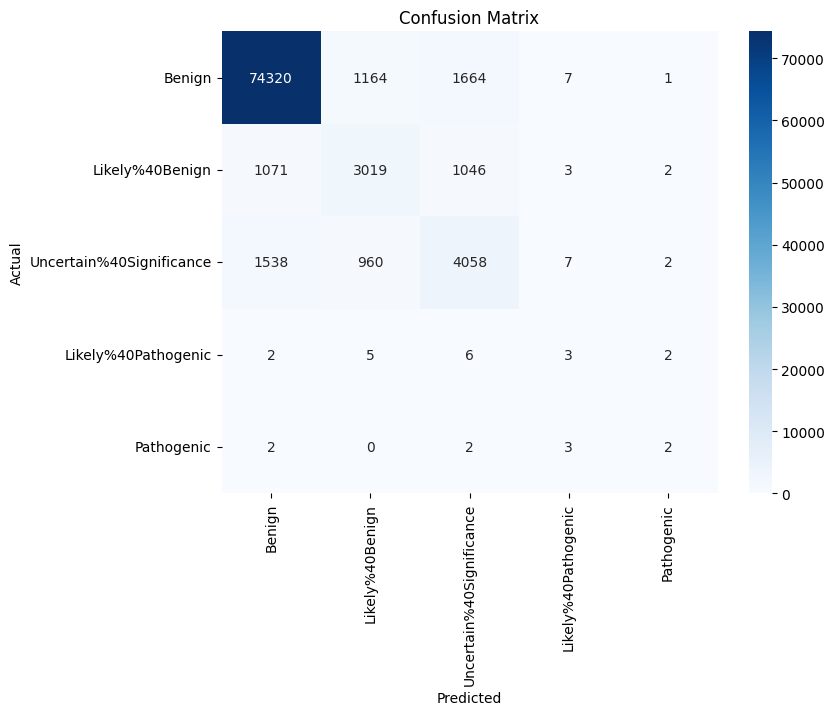

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - Outside Range and preprocessing None:
              precision    recall  f1-score   support

           0       0.94      0.27      0.42     77156
           1       0.11      0.43      0.17      5141
           2       0.17      0.46      0.25      6565
           3       0.00      0.11      0.00        18
           4       0.00      0.67      0.00         9

    accuracy                           0.30     88889
   macro avg       0.24      0.39      0.17     88889
weighted avg       0.84      0.30      0.40     88889



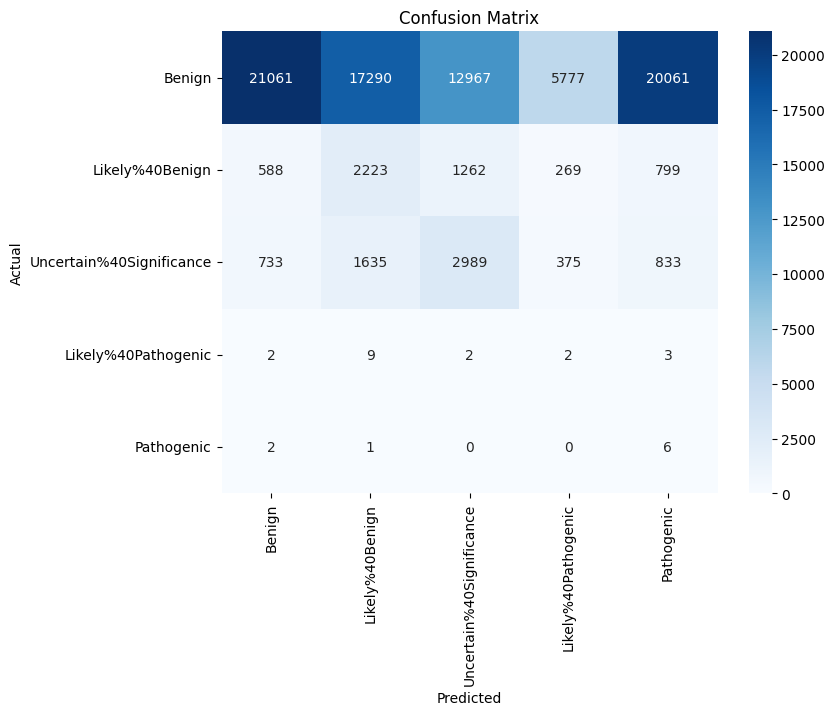

Classification report for CatBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.64      5141
           2       0.54      0.75      0.62      6565
           3       0.26      0.50      0.35        18
           4       0.43      0.33      0.38         9

    accuracy                           0.90     88889
   macro avg       0.55      0.66      0.59     88889
weighted avg       0.93      0.90      0.91     88889



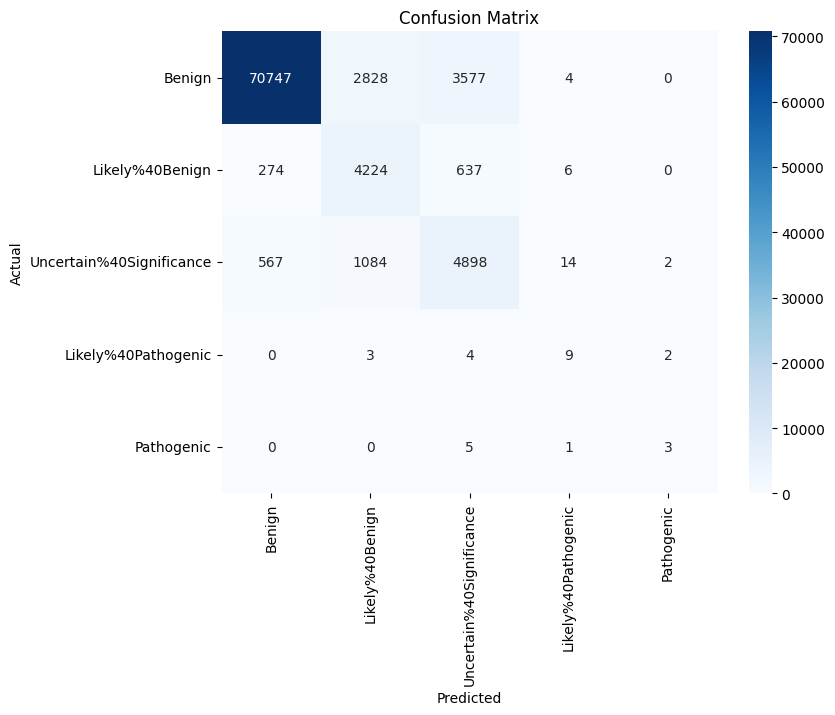

d:\pathogenicity_project\pathogenicity\lib\site-packages\xgboost\core.py:160: UserWarning: [01:41:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for XGBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.74      0.67      0.70      5141
           2       0.80      0.64      0.71      6565
           3       0.80      0.44      0.57        18
           4       0.67      0.44      0.53         9

    accuracy                           0.95     88889
   macro avg       0.79      0.64      0.70     88889
weighted avg       0.94      0.95      0.94     88889



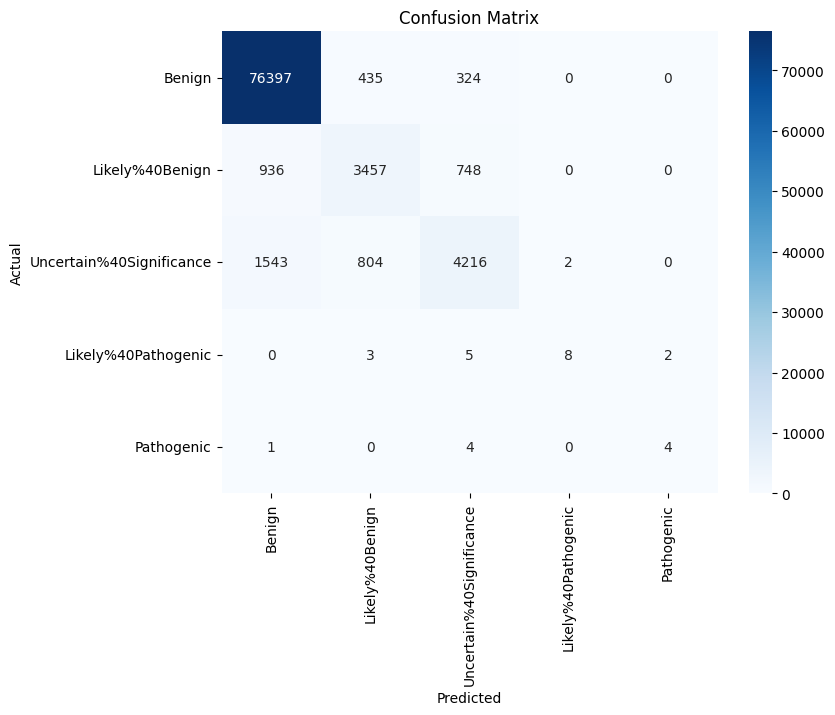

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9295
[LightGBM] [Info] Number of data points in the train set: 355555, number of used features: 159
[LightGBM] [Info] Start training from score -1.630245
[LightGBM] [Info] Start training from score -1.629008
[LightGBM] [Info] Start training from score -1.621538
[LightGBM] [Info] Start training from score -1.563183
[LightGBM] [Info] Start training from score -1.604791
Classification report for LightGBM with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.51      0.82      0.63      5141
           2       0.54      0.73      0.62      6565
           3       0.63      0.67      0.65    

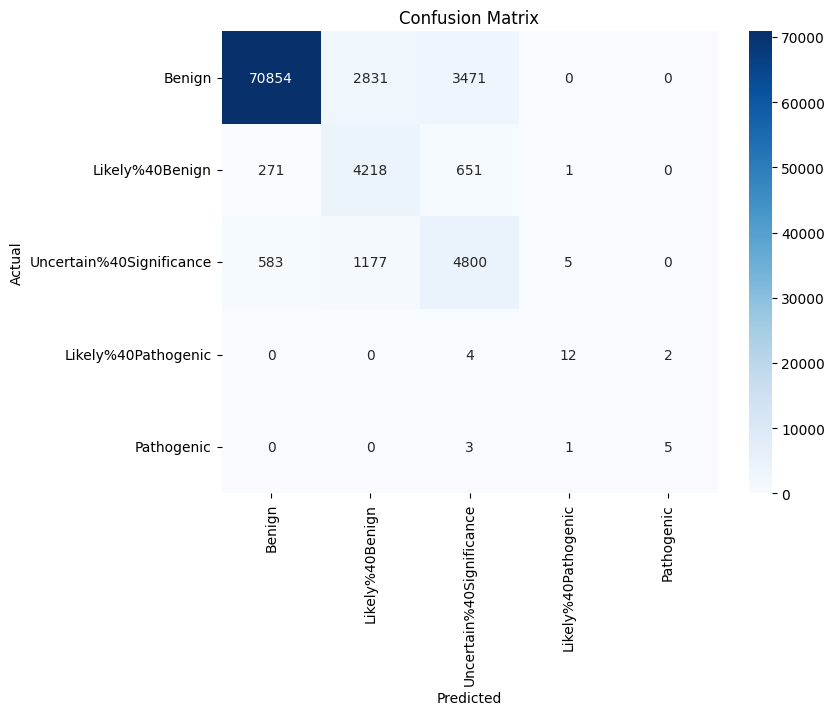

Classification report for Random Forest with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       0.80      0.22      0.35        18
           4       0.33      0.11      0.17         9

    accuracy                           0.94     88889
   macro avg       0.73      0.51      0.58     88889
weighted avg       0.94      0.94      0.94     88889



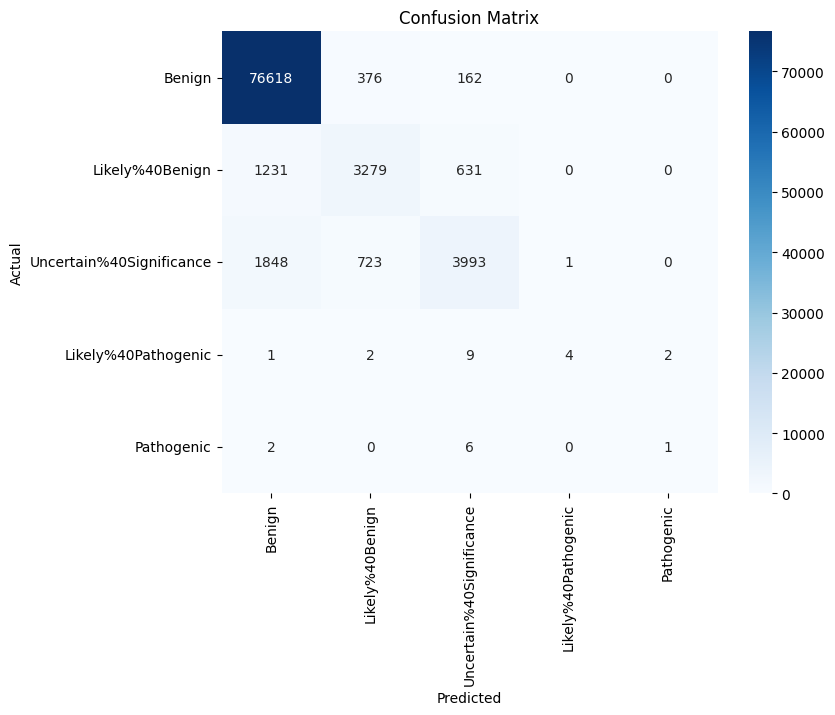

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



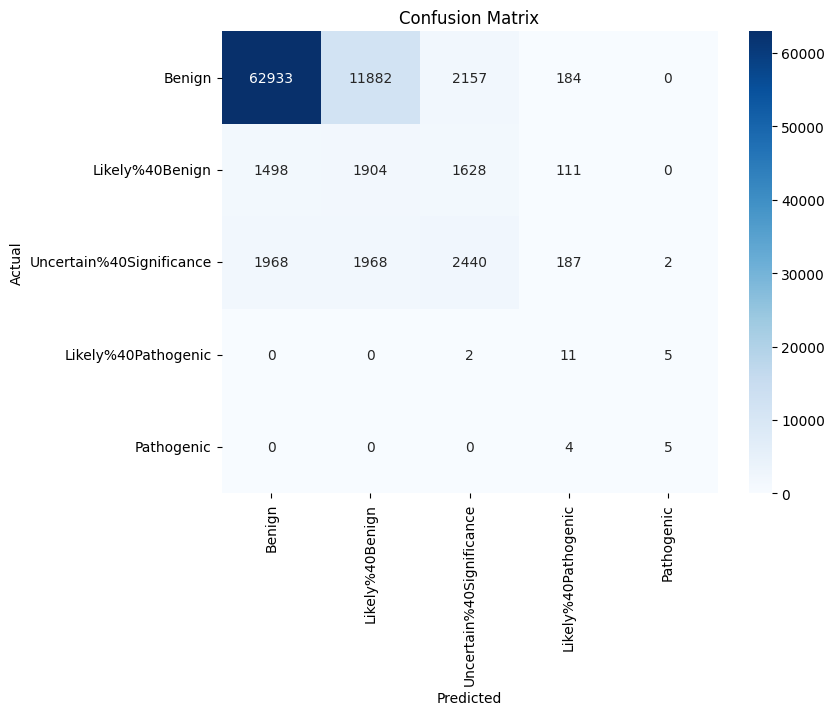

Classification report for Bagging with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.43      0.17      0.24        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.68      0.53      0.58     88889
weighted avg       0.94      0.94      0.94     88889



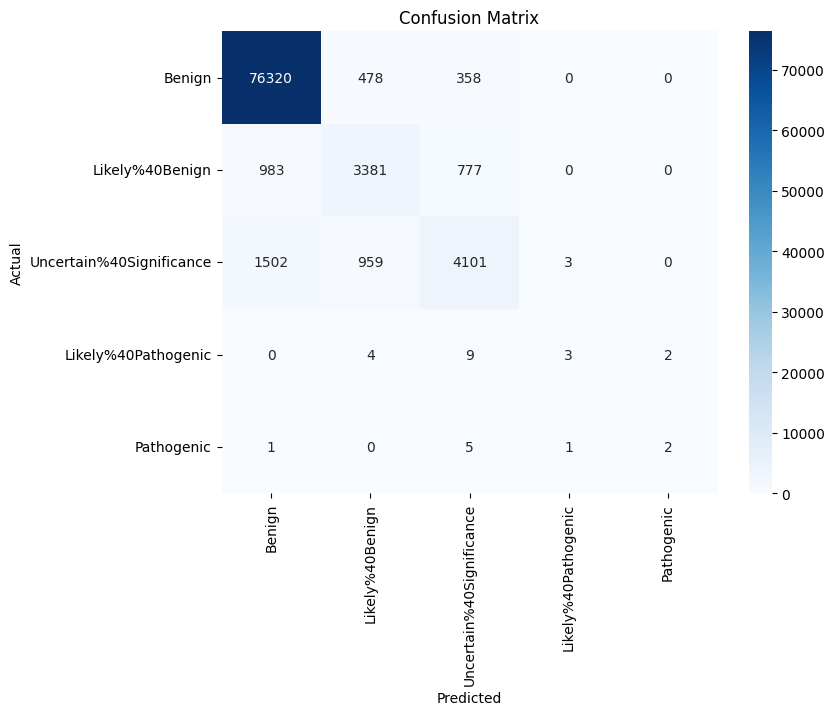

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.58      0.58      5141
           2       0.59      0.62      0.61      6565
           3       0.31      0.28      0.29        18
           4       0.22      0.22      0.22         9

    accuracy                           0.92     88889
   macro avg       0.54      0.53      0.53     88889
weighted avg       0.92      0.92      0.92     88889



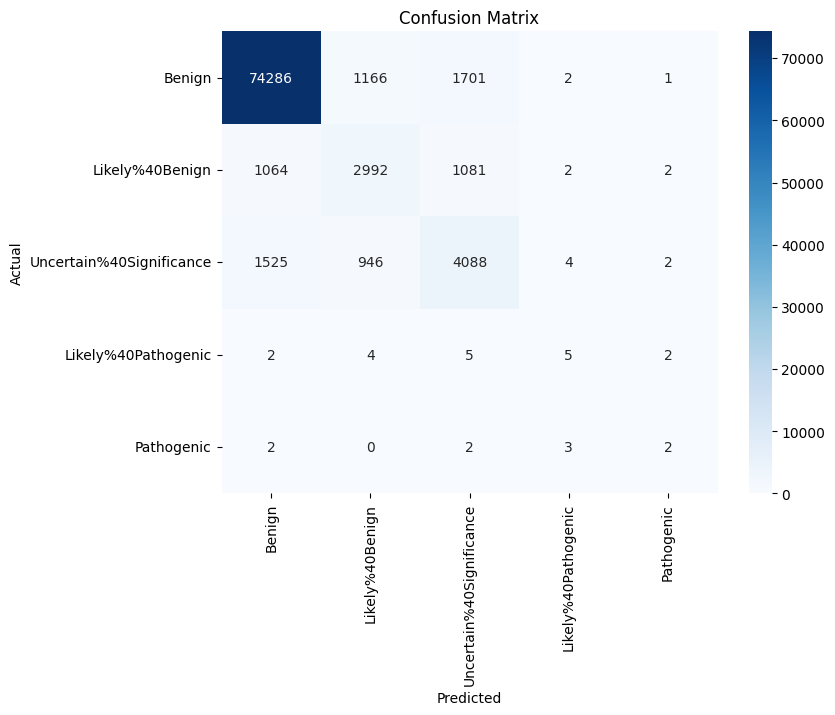

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     77156
           1       0.28      0.65      0.39      5141
           2       0.28      0.61      0.39      6565
           3       0.03      0.78      0.06        18
           4       0.19      0.67      0.29         9

    accuracy                           0.77     88889
   macro avg       0.35      0.70      0.40     88889
weighted avg       0.88      0.77      0.81     88889



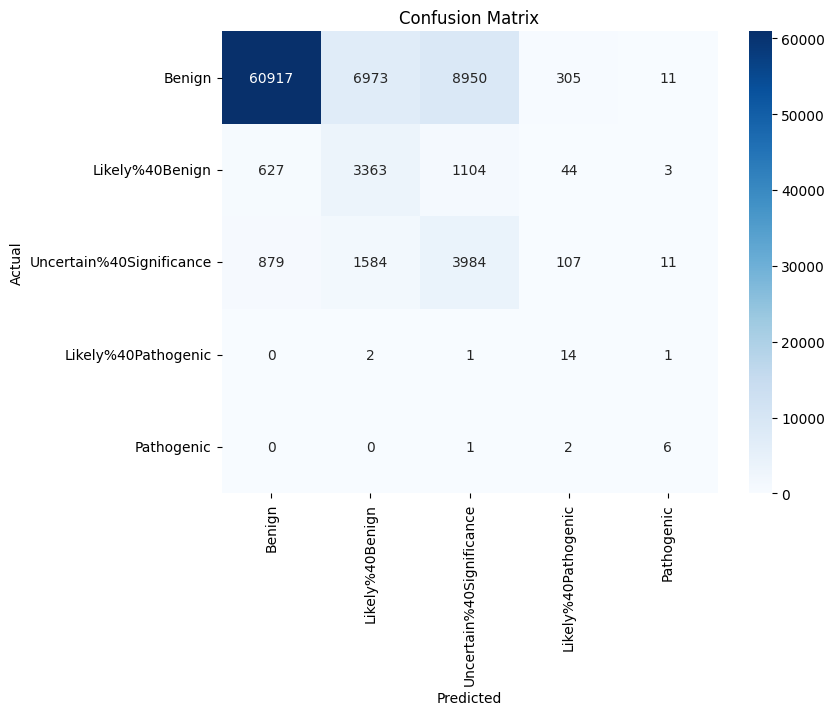

Classification report for CatBoost with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.64      5141
           2       0.53      0.75      0.62      6565
           3       0.33      0.50      0.40        18
           4       0.33      0.33      0.33         9

    accuracy                           0.90     88889
   macro avg       0.54      0.66      0.59     88889
weighted avg       0.93      0.90      0.91     88889



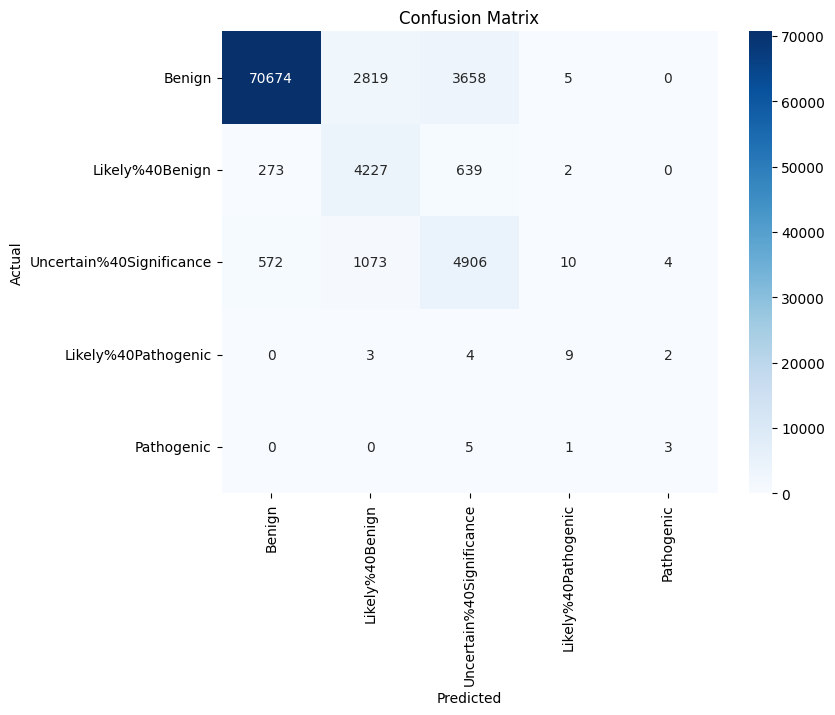

d:\pathogenicity_project\pathogenicity\lib\site-packages\xgboost\core.py:160: UserWarning: [01:57:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for XGBoost with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.74      0.68      0.71      5141
           2       0.80      0.64      0.71      6565
           3       0.75      0.50      0.60        18
           4       0.60      0.33      0.43         9

    accuracy                           0.95     88889
   macro avg       0.77      0.63      0.68     88889
weighted avg       0.94      0.95      0.94     88889



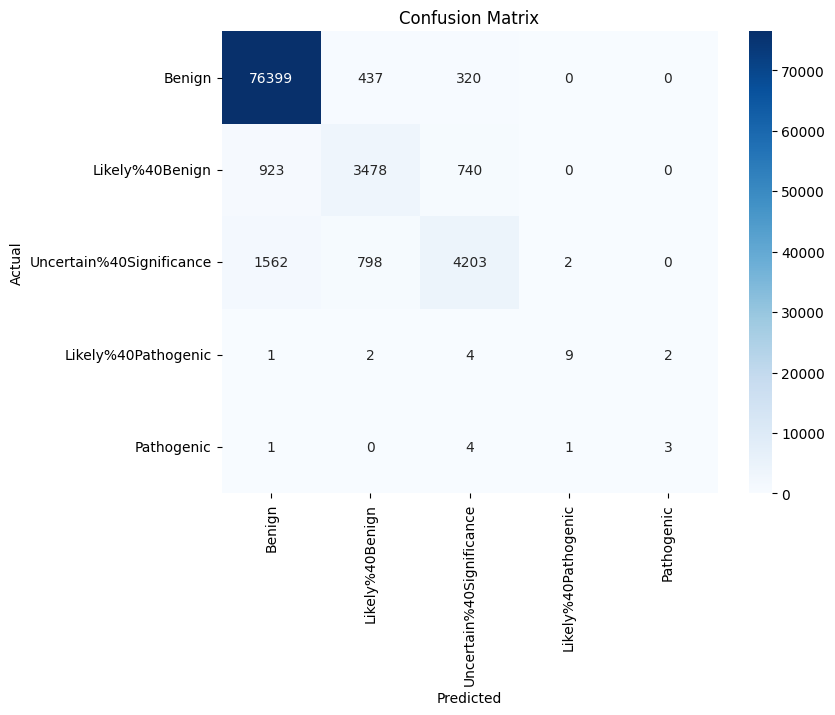

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.136336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9261
[LightGBM] [Info] Number of data points in the train set: 355555, number of used features: 158
[LightGBM] [Info] Start training from score -1.630245
[LightGBM] [Info] Start training from score -1.629008
[LightGBM] [Info] Start training from score -1.621538
[LightGBM] [Info] Start training from score -1.563183
[LightGBM] [Info] Start training from score -1.604791
Classification report for LightGBM with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.63      5141
           2       0.54      0.73      0.62      6565
           3       0.53      0.50      0.51        18


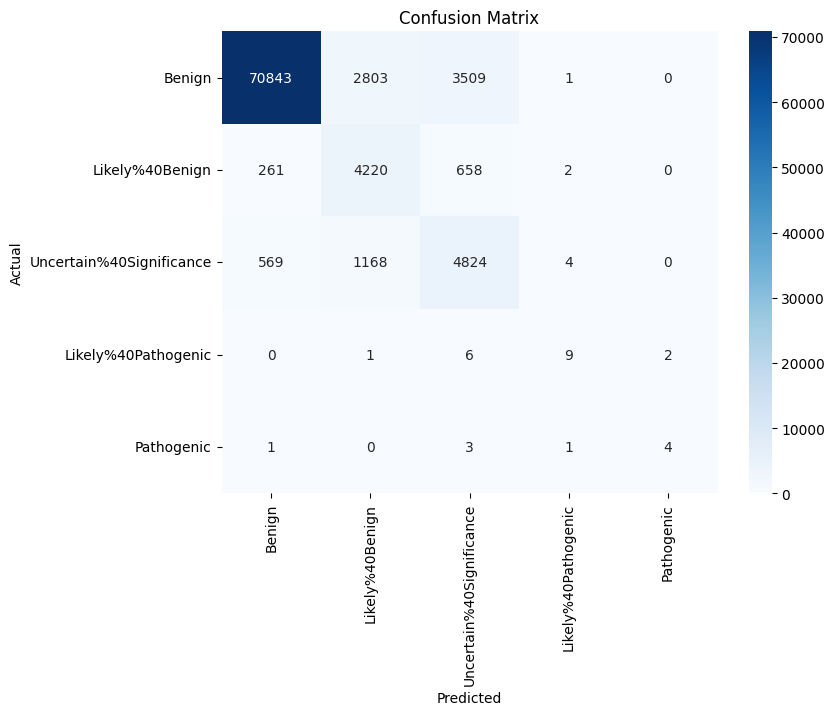

Classification report for Random Forest with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.84      0.61      0.70      6565
           3       0.86      0.33      0.48        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.78      0.56      0.63     88889
weighted avg       0.94      0.94      0.94     88889



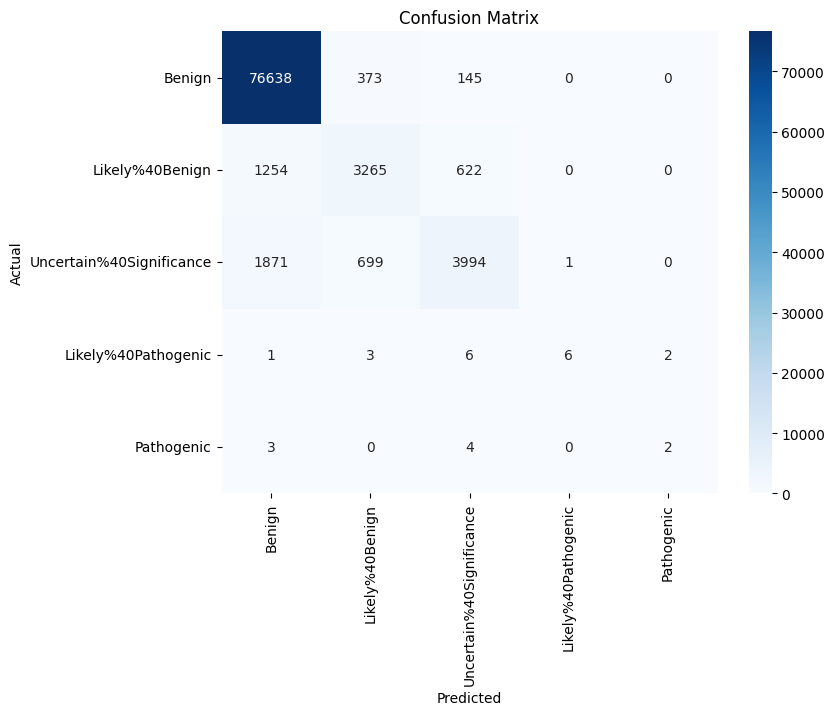

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.96      0.53      0.68     77156
           1       0.07      0.57      0.13      5141
           2       0.35      0.32      0.33      6565
           3       0.02      0.72      0.04        18
           4       0.56      0.56      0.56         9

    accuracy                           0.52     88889
   macro avg       0.39      0.54      0.35     88889
weighted avg       0.86      0.52      0.62     88889



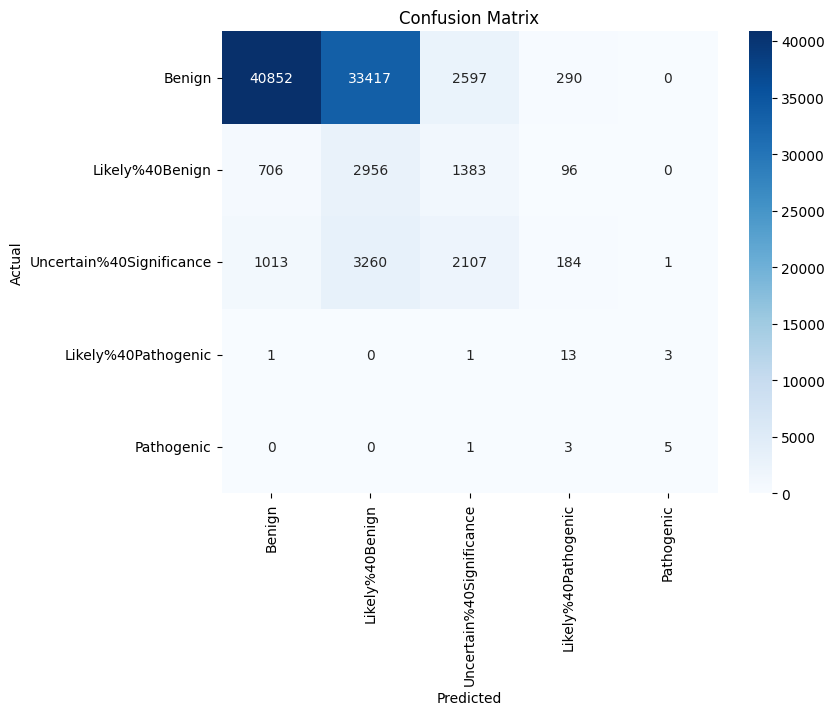

Classification report for Bagging with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.65      0.67      5141
           2       0.78      0.62      0.69      6565
           3       0.57      0.22      0.32        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.70      0.54      0.59     88889
weighted avg       0.94      0.94      0.94     88889



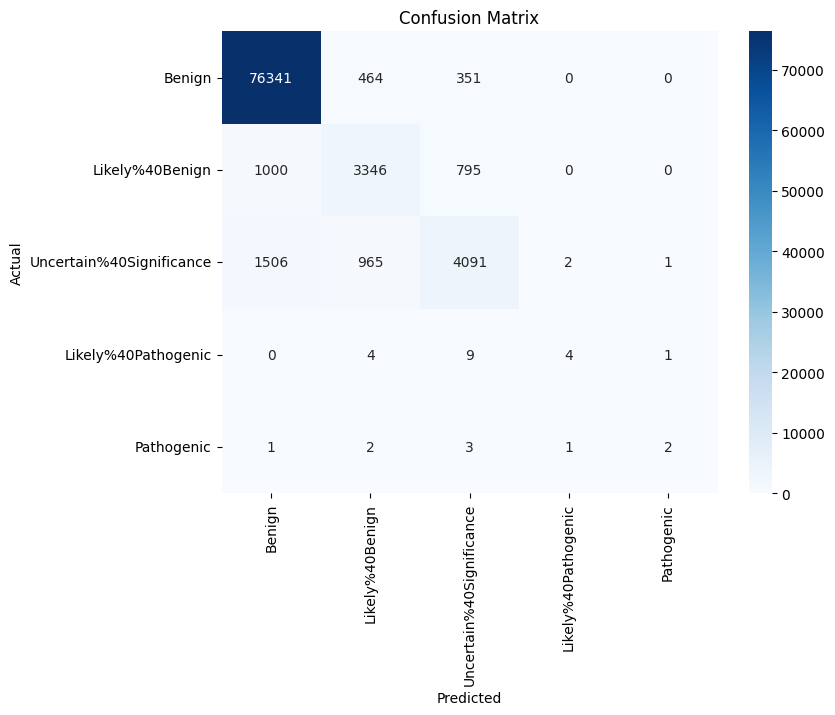

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.58      0.59      0.59      5141
           2       0.59      0.62      0.60      6565
           3       0.20      0.22      0.21        18
           4       0.14      0.11      0.12         9

    accuracy                           0.92     88889
   macro avg       0.50      0.50      0.50     88889
weighted avg       0.92      0.92      0.92     88889



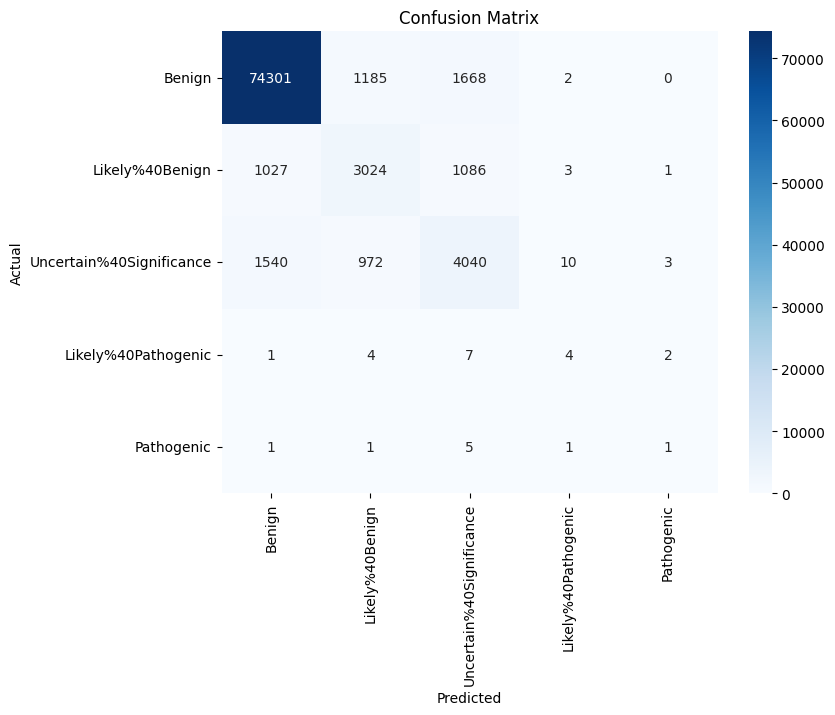

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Median and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     77156
           1       0.28      0.65      0.40      5141
           2       0.28      0.61      0.39      6565
           3       0.03      0.72      0.05        18
           4       0.22      0.67      0.33         9

    accuracy                           0.77     88889
   macro avg       0.36      0.69      0.41     88889
weighted avg       0.88      0.77      0.81     88889



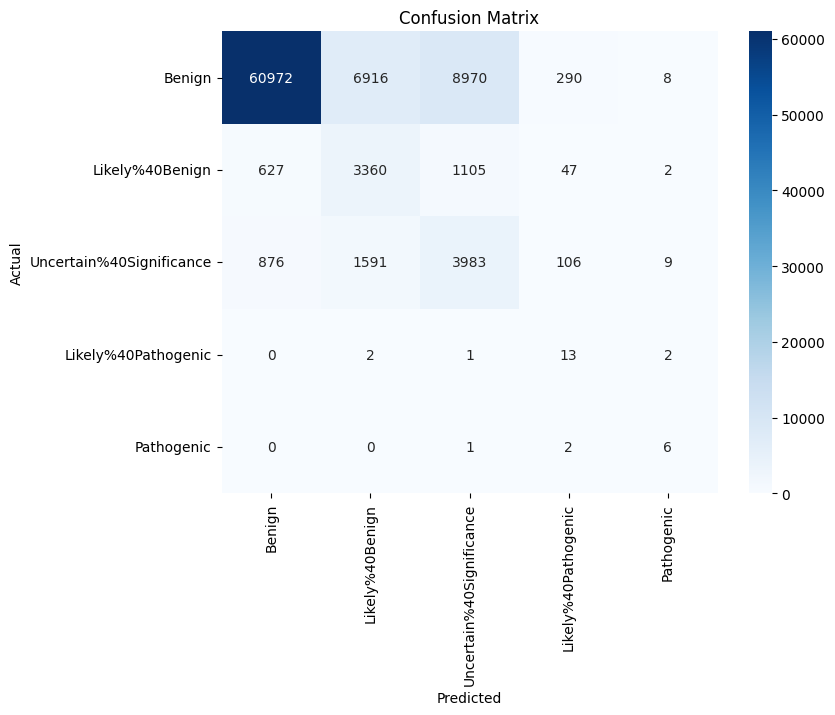

Classification report for CatBoost with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.64      5141
           2       0.54      0.74      0.62      6565
           3       0.39      0.61      0.48        18
           4       0.50      0.33      0.40         9

    accuracy                           0.90     88889
   macro avg       0.59      0.69      0.62     88889
weighted avg       0.93      0.90      0.91     88889



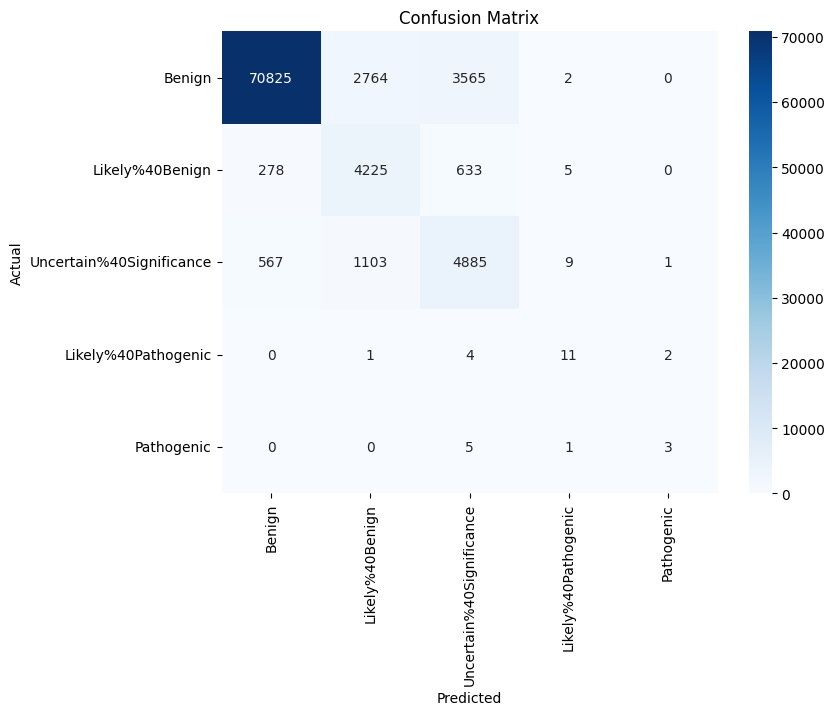

d:\pathogenicity_project\pathogenicity\lib\site-packages\xgboost\core.py:160: UserWarning: [02:13:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for XGBoost with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.74      0.68      0.71      5141
           2       0.80      0.64      0.71      6565
           3       0.80      0.44      0.57        18
           4       0.60      0.33      0.43         9

    accuracy                           0.95     88889
   macro avg       0.78      0.62      0.68     88889
weighted avg       0.94      0.95      0.94     88889



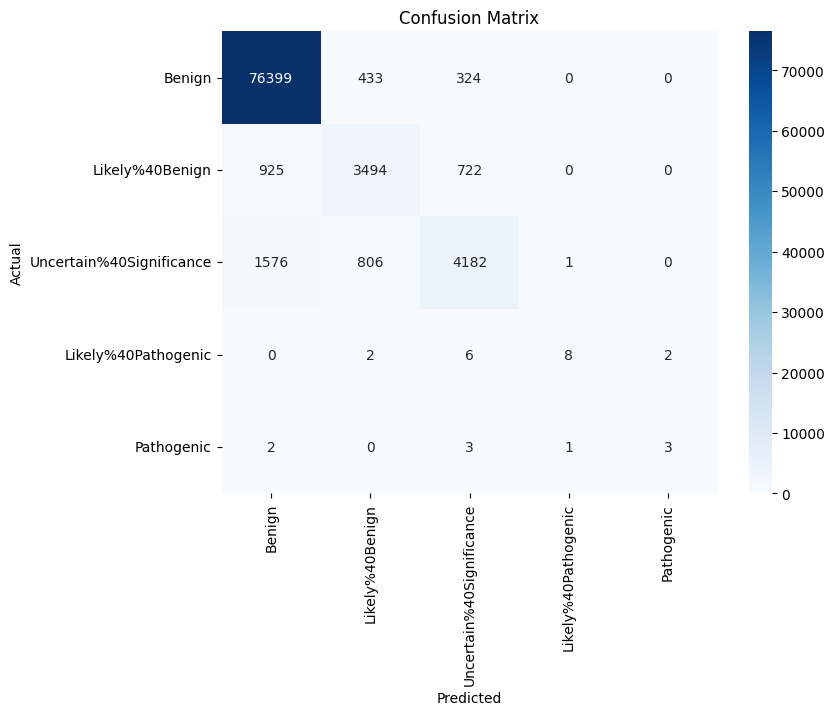

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9191
[LightGBM] [Info] Number of data points in the train set: 355555, number of used features: 107
[LightGBM] [Info] Start training from score -1.630245
[LightGBM] [Info] Start training from score -1.629008
[LightGBM] [Info] Start training from score -1.621538
[LightGBM] [Info] Start training from score -1.563183
[LightGBM] [Info] Start training from score -1.604791
Classification report for LightGBM with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.63      5141
           2       0.54      0.73      0.62      6565
           3       0.50      0.56      0.53        18
      

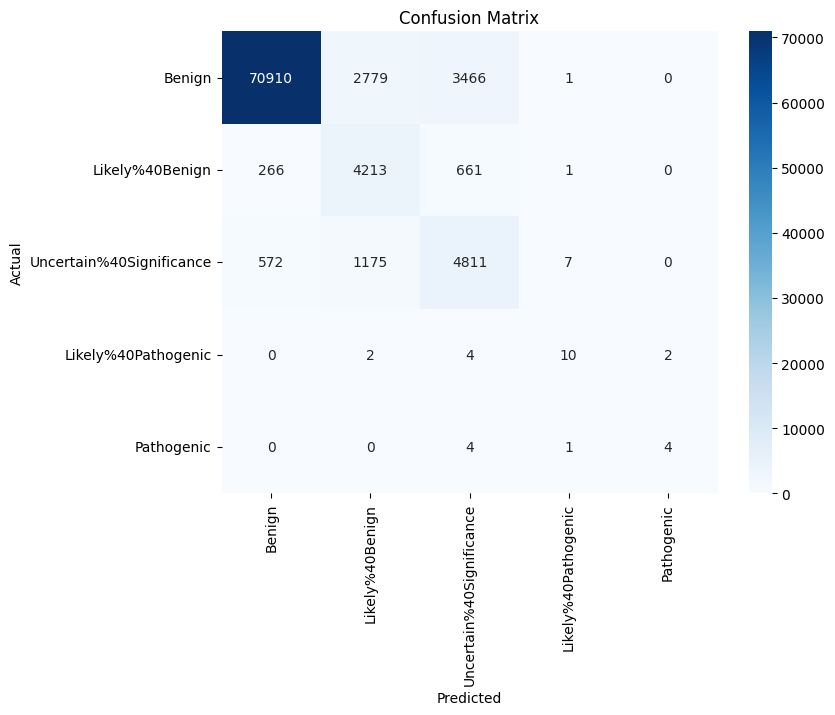

Classification report for Random Forest with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       1.00      0.22      0.36        18
           4       0.33      0.11      0.17         9

    accuracy                           0.94     88889
   macro avg       0.77      0.52      0.58     88889
weighted avg       0.94      0.94      0.94     88889



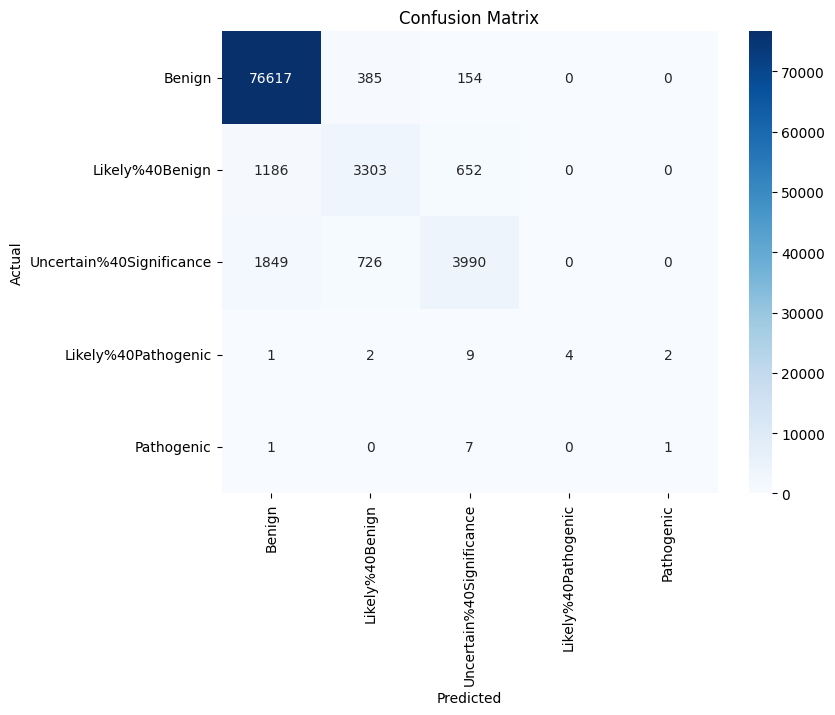

Classification report for AdaBoost with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



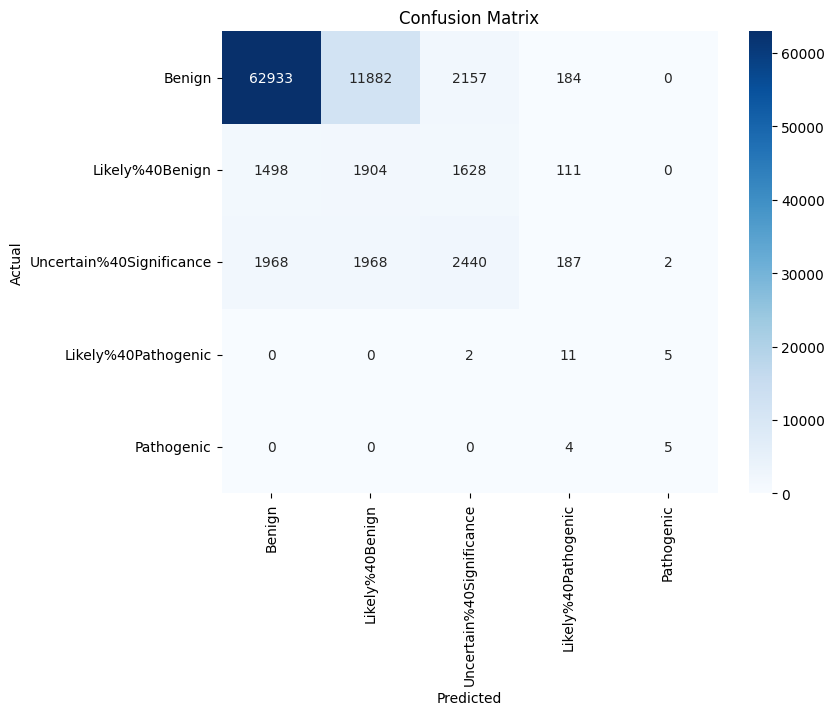

Classification report for Bagging with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.67      0.22      0.33        18
           4       0.75      0.33      0.46         9

    accuracy                           0.94     88889
   macro avg       0.77      0.56      0.63     88889
weighted avg       0.94      0.94      0.94     88889



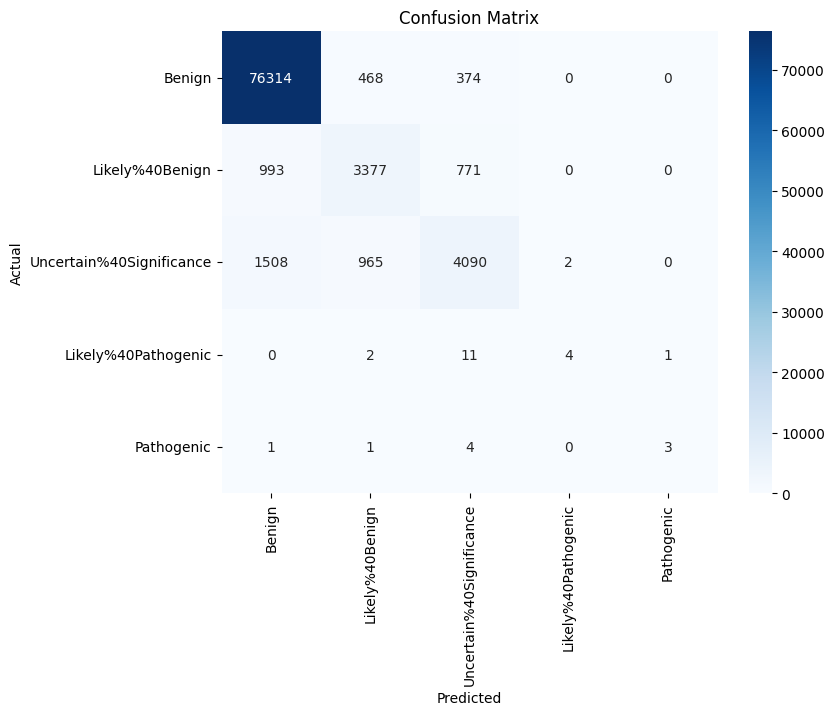

Classification report for Decision Tree with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.58      0.59      5141
           2       0.60      0.62      0.61      6565
           3       0.20      0.17      0.18        18
           4       0.22      0.22      0.22         9

    accuracy                           0.92     88889
   macro avg       0.51      0.51      0.51     88889
weighted avg       0.92      0.92      0.92     88889



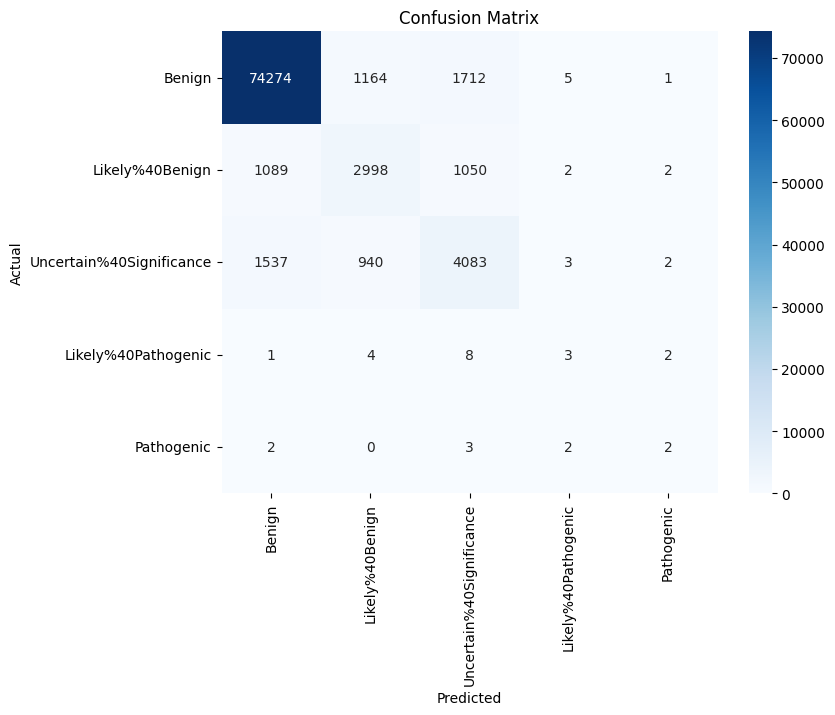

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - Outside Range and preprocessing MinMax:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     77156
           1       0.28      0.65      0.39      5141
           2       0.28      0.60      0.38      6565
           3       0.02      0.50      0.03        18
           4       0.11      0.67      0.18         9

    accuracy                           0.76     88889
   macro avg       0.33      0.64      0.37     88889
weighted avg       0.88      0.76      0.81     88889



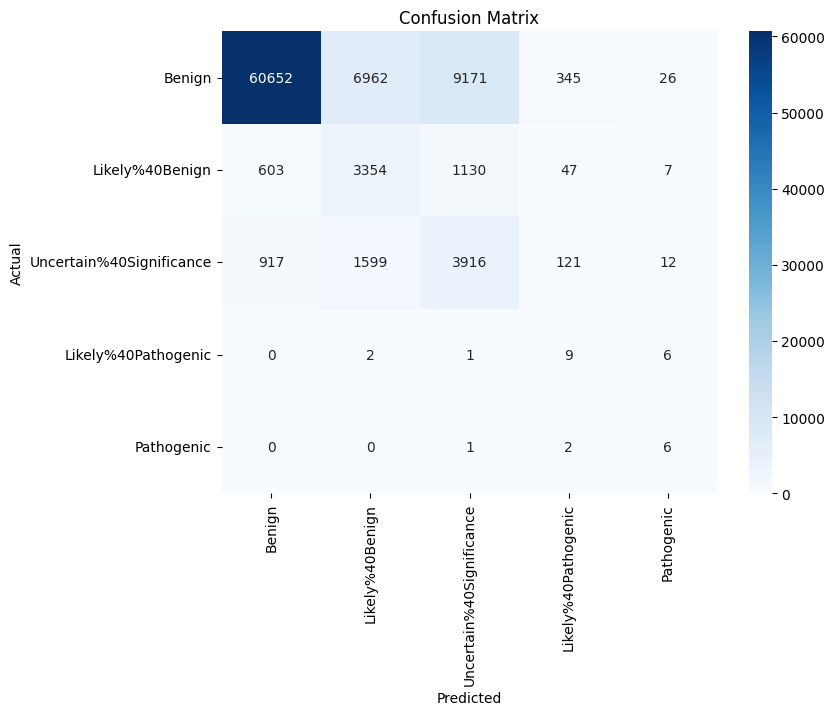

Classification report for CatBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.63      5141
           2       0.54      0.75      0.62      6565
           3       0.36      0.56      0.43        18
           4       0.38      0.33      0.35         9

    accuracy                           0.90     88889
   macro avg       0.55      0.67      0.60     88889
weighted avg       0.93      0.90      0.91     88889



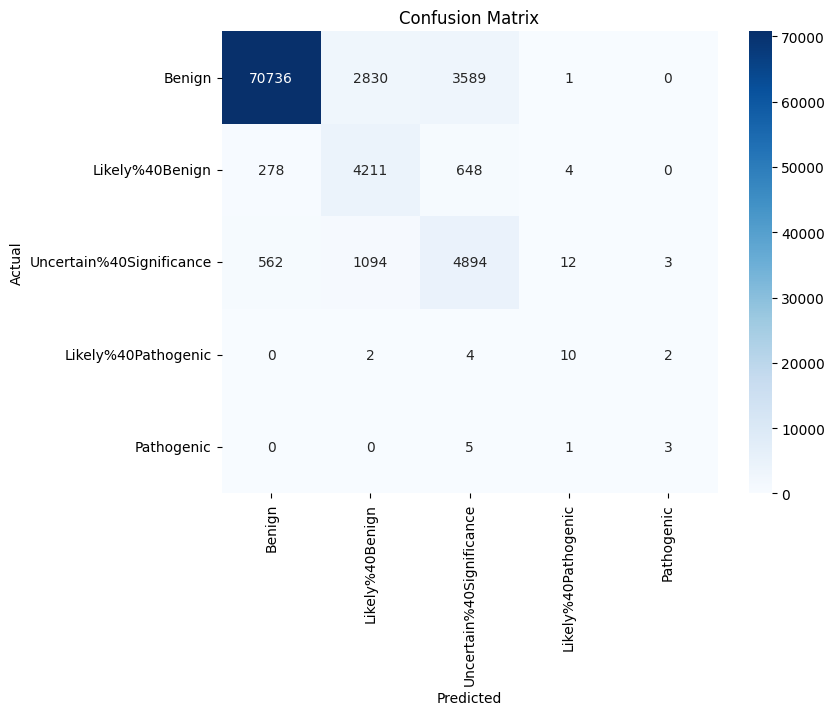

d:\pathogenicity_project\pathogenicity\lib\site-packages\xgboost\core.py:160: UserWarning: [02:28:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for XGBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.73      0.67      0.70      5141
           2       0.80      0.64      0.71      6565
           3       0.80      0.44      0.57        18
           4       0.67      0.44      0.53         9

    accuracy                           0.95     88889
   macro avg       0.79      0.64      0.70     88889
weighted avg       0.94      0.95      0.94     88889



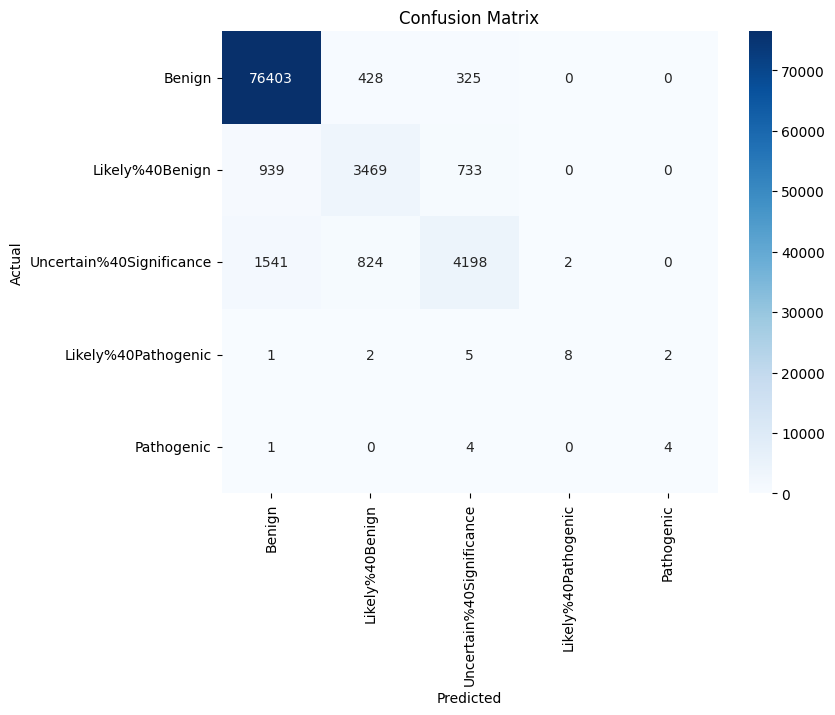

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9449
[LightGBM] [Info] Number of data points in the train set: 355555, number of used features: 159
[LightGBM] [Info] Start training from score -1.630245
[LightGBM] [Info] Start training from score -1.629008
[LightGBM] [Info] Start training from score -1.621538
[LightGBM] [Info] Start training from score -1.563183
[LightGBM] [Info] Start training from score -1.604791
Classification report for LightGBM with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.51      0.82      0.63      5141
           2       0.53      0.73      0.62      6565
           3       0.58      0.61      0.59    

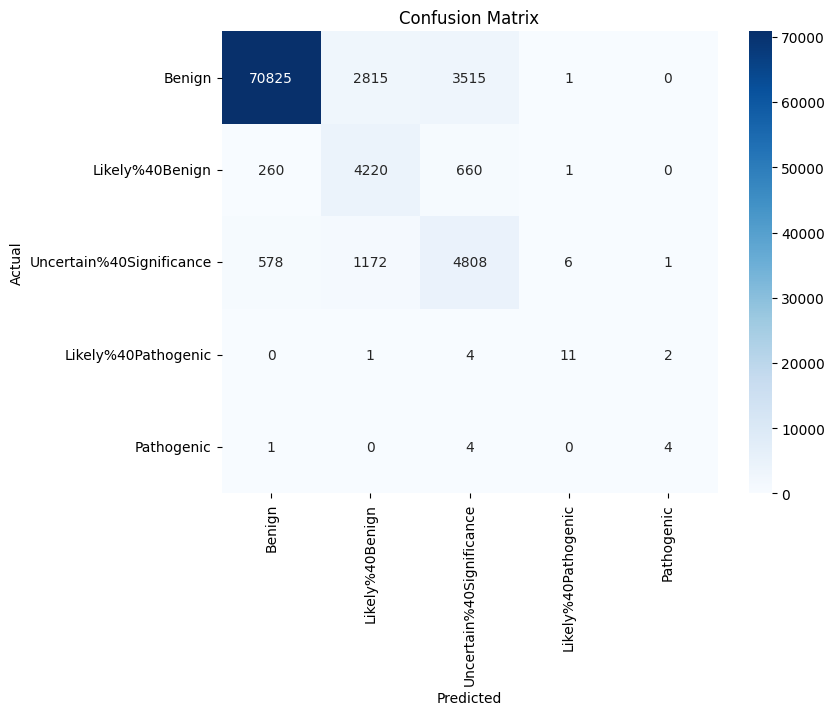

Classification report for Random Forest with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       0.83      0.28      0.42        18
           4       0.33      0.11      0.17         9

    accuracy                           0.94     88889
   macro avg       0.74      0.53      0.59     88889
weighted avg       0.94      0.94      0.94     88889



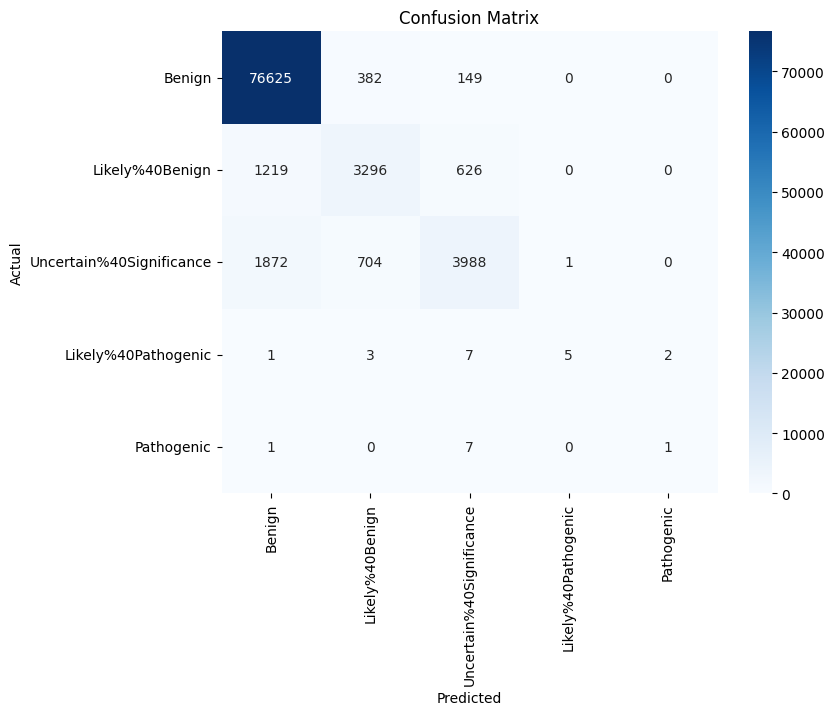

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



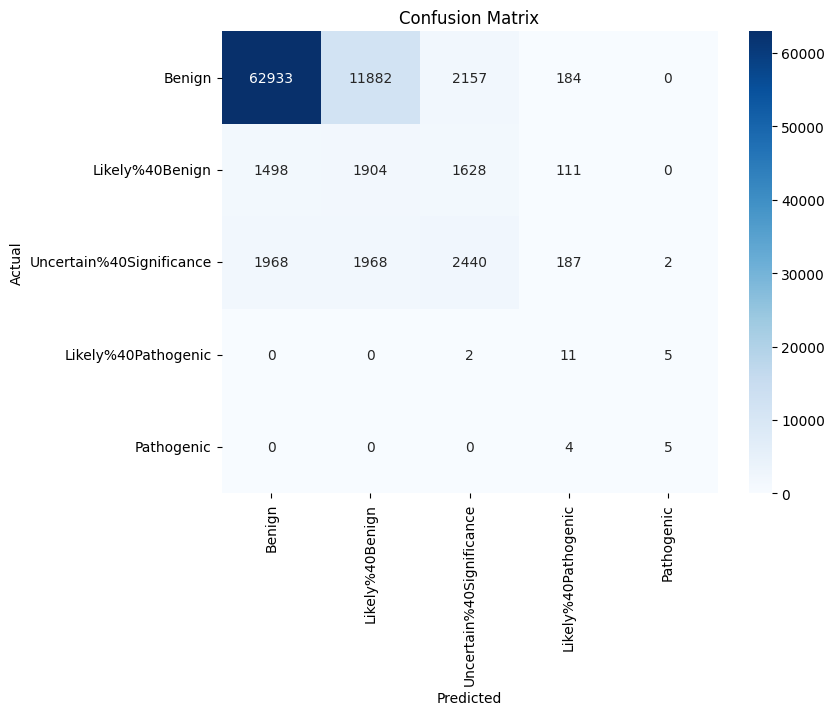

Classification report for Bagging with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.50      0.17      0.25        18
           4       0.25      0.11      0.15         9

    accuracy                           0.94     88889
   macro avg       0.64      0.51      0.55     88889
weighted avg       0.94      0.94      0.94     88889



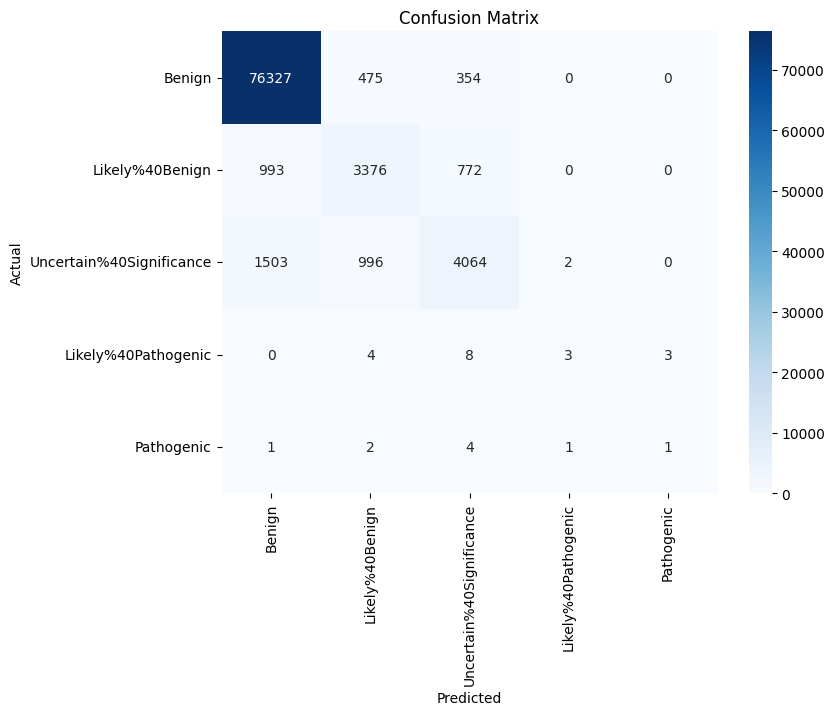

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.58      0.59      0.59      5141
           2       0.60      0.62      0.61      6565
           3       0.18      0.17      0.17        18
           4       0.25      0.22      0.24         9

    accuracy                           0.92     88889
   macro avg       0.52      0.51      0.51     88889
weighted avg       0.92      0.92      0.92     88889



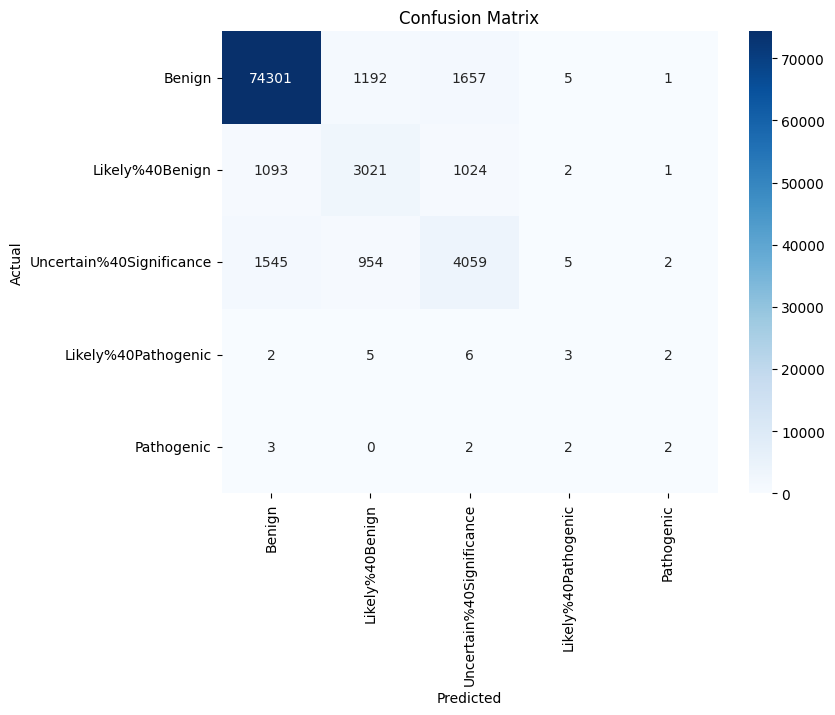

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.98      0.42      0.59     77156
           1       0.13      0.33      0.19      5141
           2       0.14      0.63      0.23      6565
           3       0.00      0.56      0.01        18
           4       0.00      0.89      0.00         9

    accuracy                           0.43     88889
   macro avg       0.25      0.56      0.20     88889
weighted avg       0.87      0.43      0.54     88889



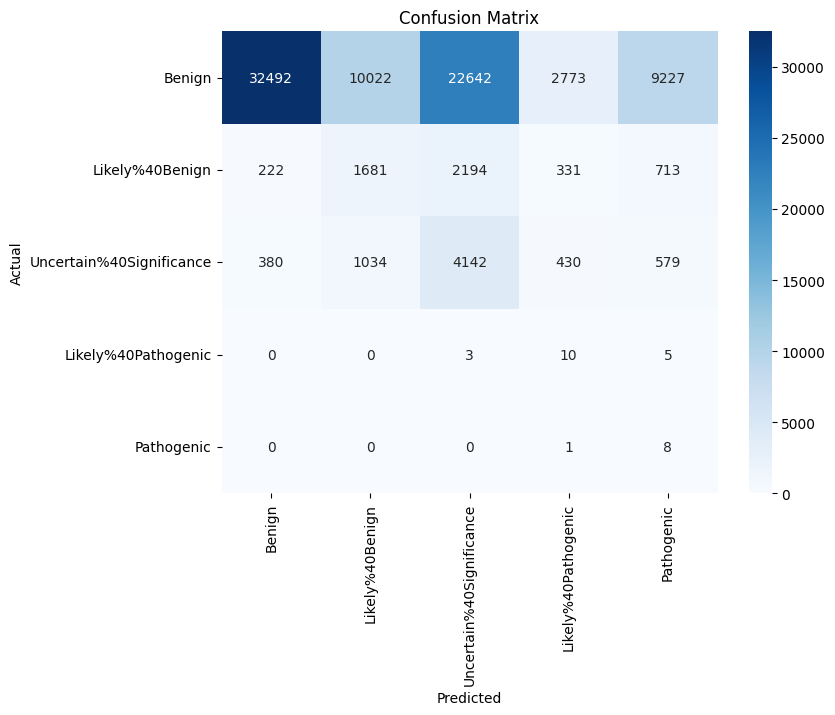

Classification report for CatBoost with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.64      5141
           2       0.53      0.75      0.62      6565
           3       0.36      0.50      0.42        18
           4       0.43      0.33      0.38         9

    accuracy                           0.90     88889
   macro avg       0.57      0.66      0.60     88889
weighted avg       0.93      0.90      0.91     88889



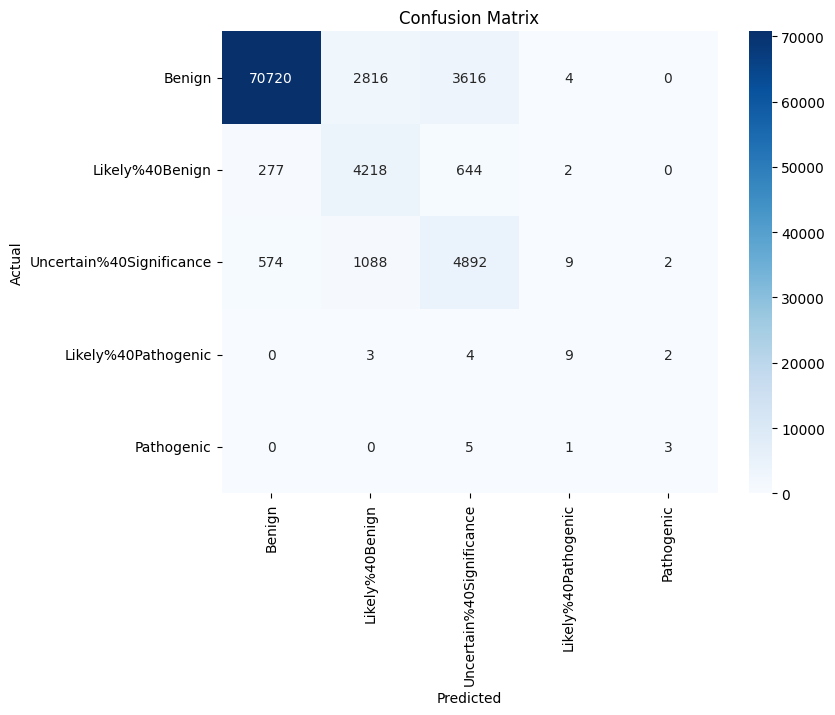

d:\pathogenicity_project\pathogenicity\lib\site-packages\xgboost\core.py:160: UserWarning: [02:45:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for XGBoost with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.74      0.68      0.71      5141
           2       0.80      0.64      0.71      6565
           3       0.82      0.50      0.62        18
           4       0.67      0.44      0.53         9

    accuracy                           0.95     88889
   macro avg       0.80      0.65      0.71     88889
weighted avg       0.94      0.95      0.94     88889



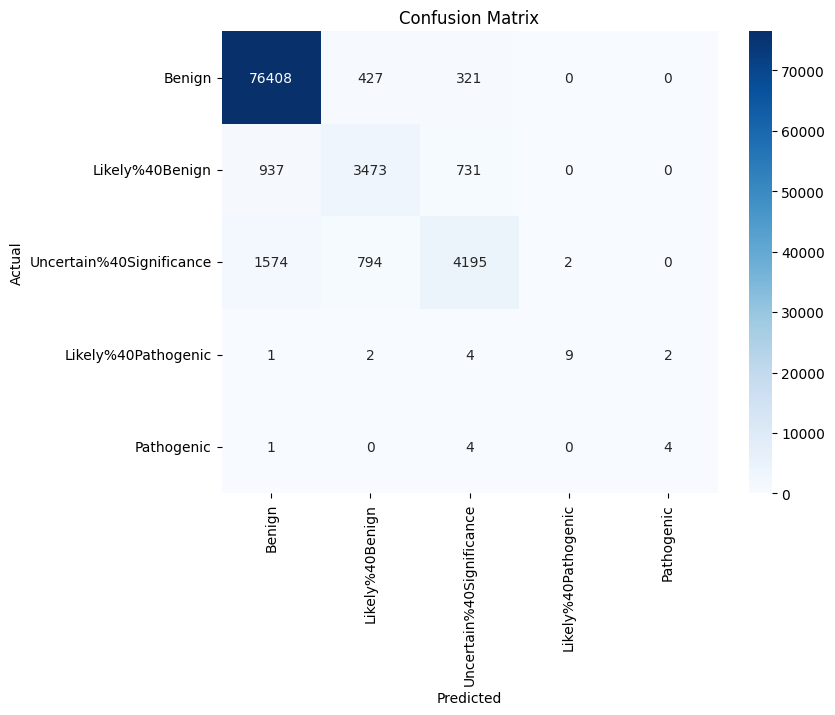

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9439
[LightGBM] [Info] Number of data points in the train set: 355555, number of used features: 158
[LightGBM] [Info] Start training from score -1.630245
[LightGBM] [Info] Start training from score -1.629008
[LightGBM] [Info] Start training from score -1.621538
[LightGBM] [Info] Start training from score -1.563183
[LightGBM] [Info] Start training from score -1.604791
Classification report for LightGBM with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.64      5141
           2       0.53      0.73      0.62      6565
           3       0.42      0.56      0.48        18


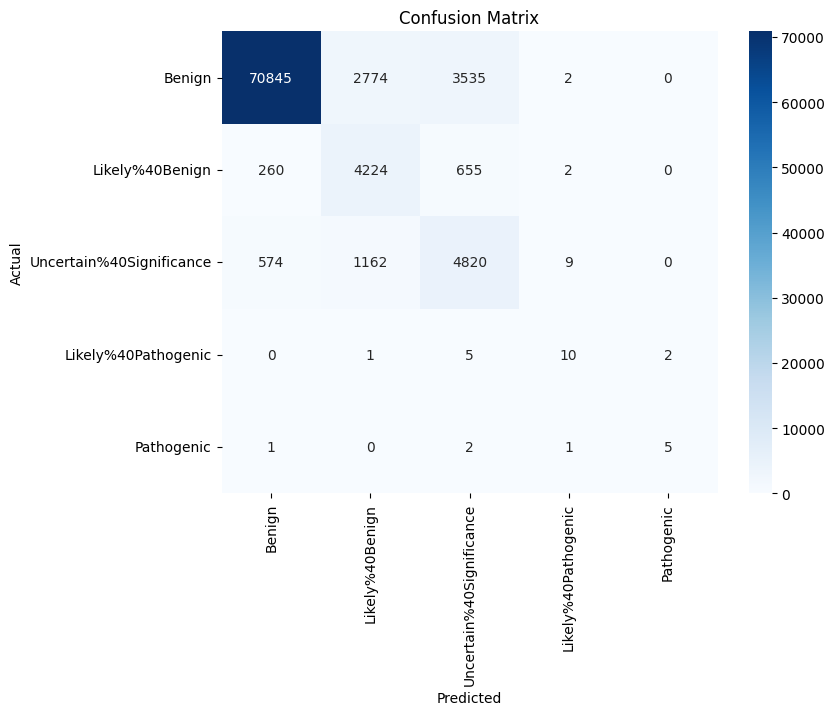

Classification report for Random Forest with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.84      0.61      0.71      6565
           3       0.86      0.33      0.48        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.78      0.56      0.63     88889
weighted avg       0.94      0.94      0.94     88889



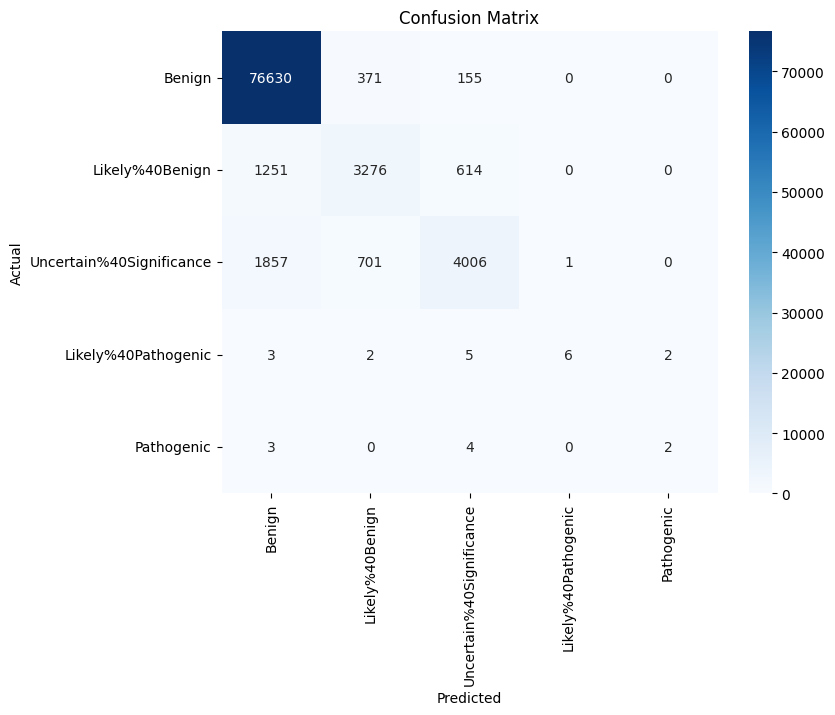

Classification report for AdaBoost with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     77156
           1       0.10      0.75      0.17      5141
           2       0.47      0.12      0.19      6565
           3       0.03      0.78      0.05        18
           4       0.43      0.33      0.38         9

    accuracy                           0.55     88889
   macro avg       0.40      0.51      0.30     88889
weighted avg       0.87      0.55      0.65     88889



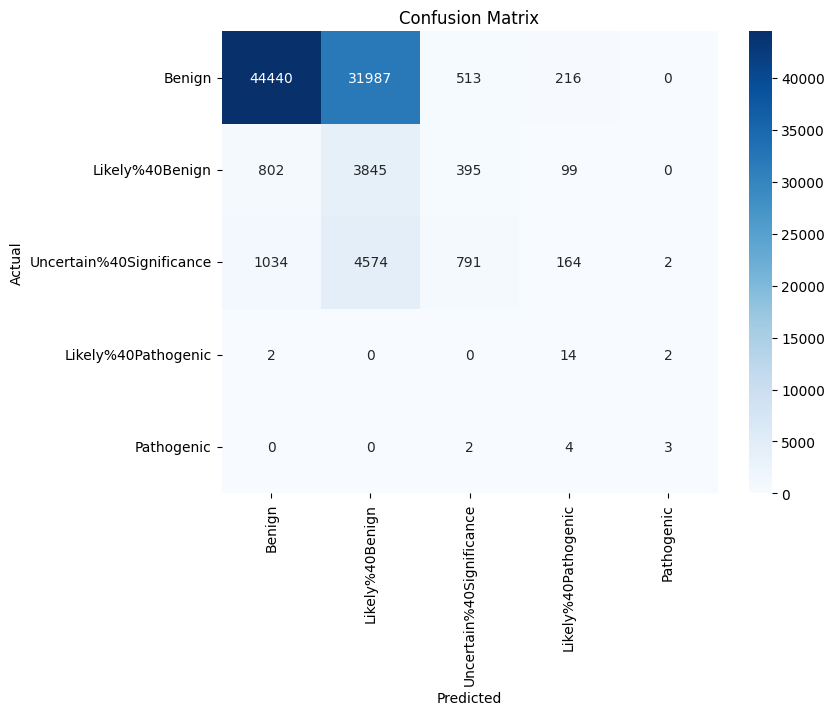

Classification report for Bagging with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.69      0.65      0.67      5141
           2       0.78      0.62      0.69      6565
           3       0.62      0.28      0.38        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.61      0.51      0.54     88889
weighted avg       0.94      0.94      0.94     88889



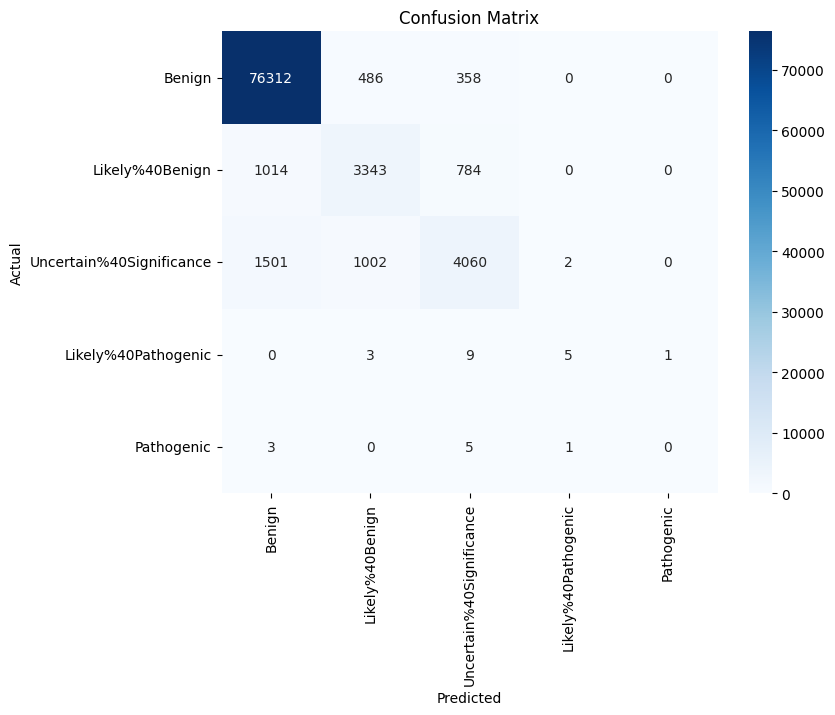

Classification report for Decision Tree with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.58      0.58      0.58      5141
           2       0.59      0.61      0.60      6565
           3       0.27      0.22      0.24        18
           4       0.12      0.11      0.12         9

    accuracy                           0.92     88889
   macro avg       0.51      0.50      0.50     88889
weighted avg       0.92      0.92      0.92     88889



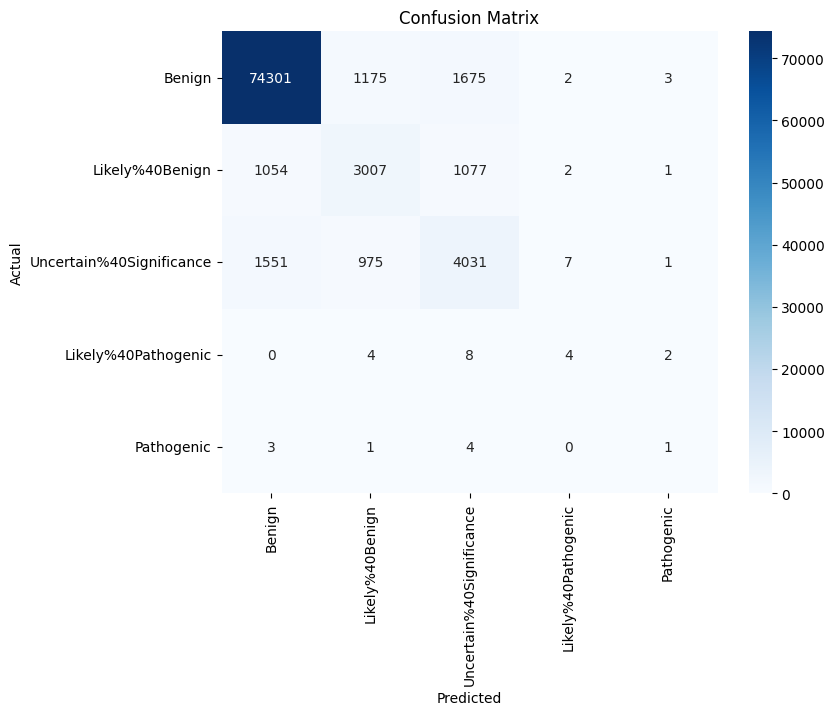

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - OneHot Nans, Median and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.37      0.53     77156
           1       0.14      0.35      0.20      5141
           2       0.12      0.42      0.18      6565
           3       0.00      0.44      0.00        18
           4       0.00      0.89      0.00         9

    accuracy                           0.37     88889
   macro avg       0.25      0.49      0.18     88889
weighted avg       0.86      0.37      0.49     88889



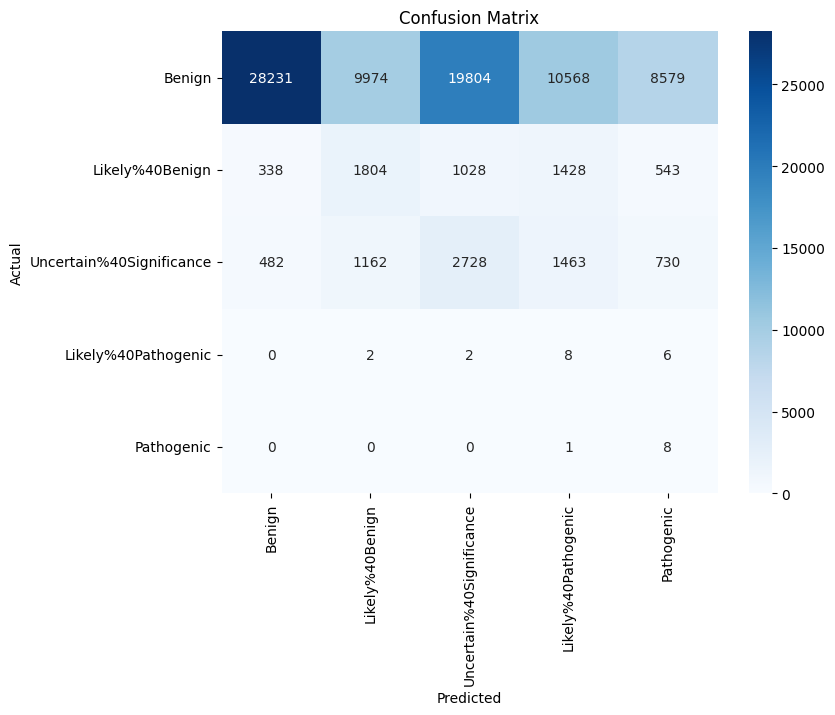

Classification report for CatBoost with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.52      0.82      0.64      5141
           2       0.54      0.74      0.62      6565
           3       0.36      0.56      0.43        18
           4       0.40      0.22      0.29         9

    accuracy                           0.90     88889
   macro avg       0.56      0.65      0.59     88889
weighted avg       0.93      0.90      0.91     88889



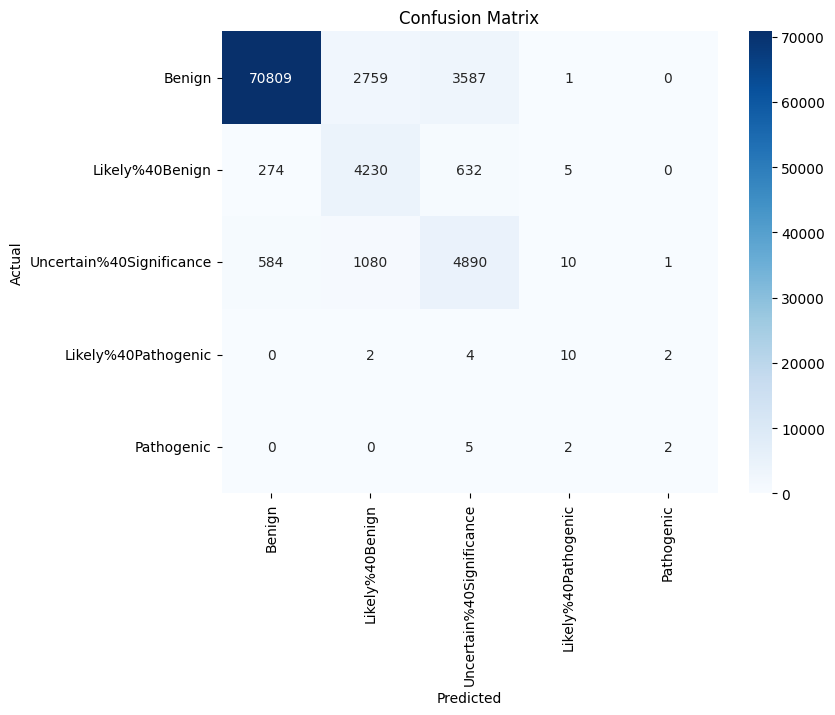

d:\pathogenicity_project\pathogenicity\lib\site-packages\xgboost\core.py:160: UserWarning: [03:02:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for XGBoost with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.74      0.67      0.71      5141
           2       0.79      0.64      0.71      6565
           3       0.89      0.44      0.59        18
           4       0.67      0.44      0.53         9

    accuracy                           0.95     88889
   macro avg       0.81      0.64      0.70     88889
weighted avg       0.94      0.95      0.94     88889



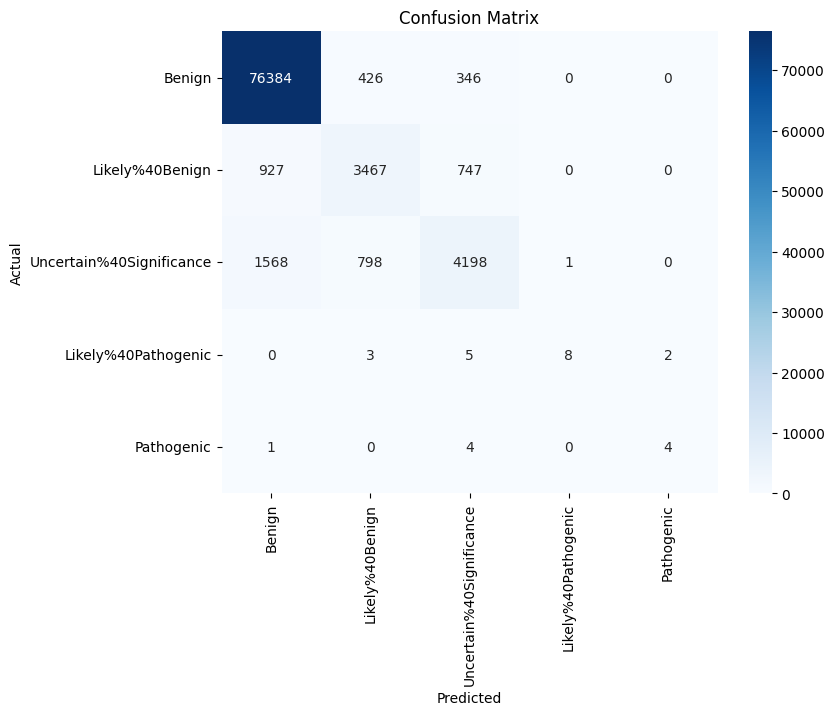

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9345
[LightGBM] [Info] Number of data points in the train set: 355555, number of used features: 107
[LightGBM] [Info] Start training from score -1.630245
[LightGBM] [Info] Start training from score -1.629008
[LightGBM] [Info] Start training from score -1.621538
[LightGBM] [Info] Start training from score -1.563183
[LightGBM] [Info] Start training from score -1.604791
Classification report for LightGBM with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     77156
           1       0.51      0.82      0.63      5141
           2       0.53      0.73      0.62      6565
           3       0.53      0.56      0.54        18
      

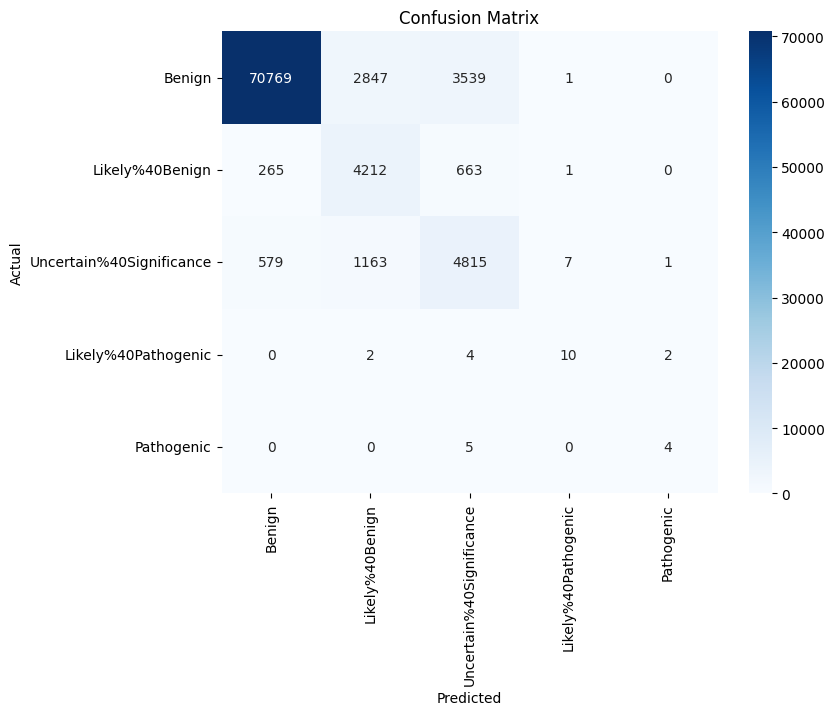

Classification report for Random Forest with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     77156
           1       0.75      0.64      0.69      5141
           2       0.83      0.61      0.70      6565
           3       0.80      0.22      0.35        18
           4       0.50      0.22      0.31         9

    accuracy                           0.94     88889
   macro avg       0.77      0.54      0.61     88889
weighted avg       0.94      0.94      0.94     88889



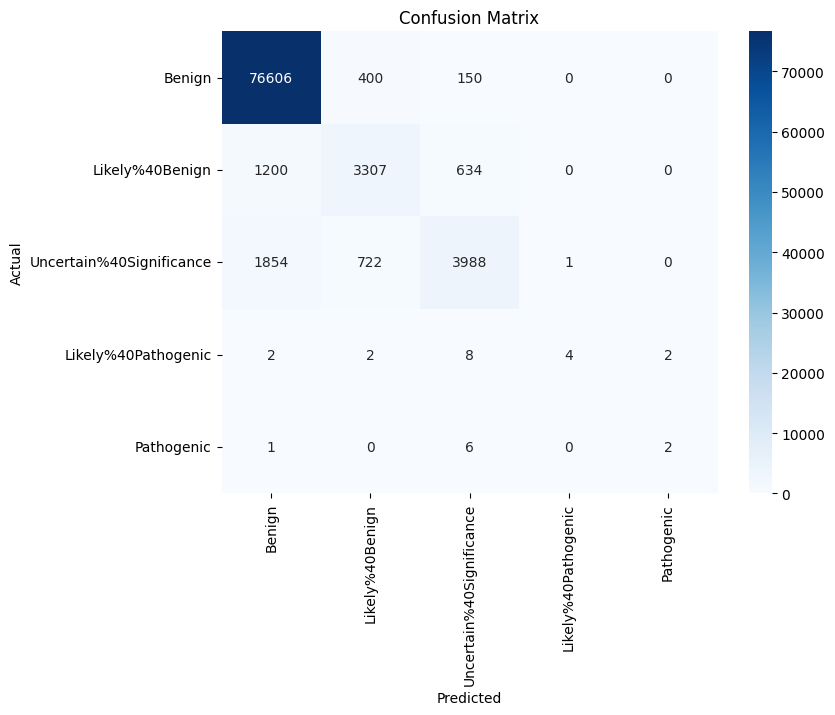

Classification report for AdaBoost with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     77156
           1       0.12      0.37      0.18      5141
           2       0.39      0.37      0.38      6565
           3       0.02      0.61      0.04        18
           4       0.42      0.56      0.48         9

    accuracy                           0.76     88889
   macro avg       0.38      0.54      0.39     88889
weighted avg       0.86      0.76      0.80     88889



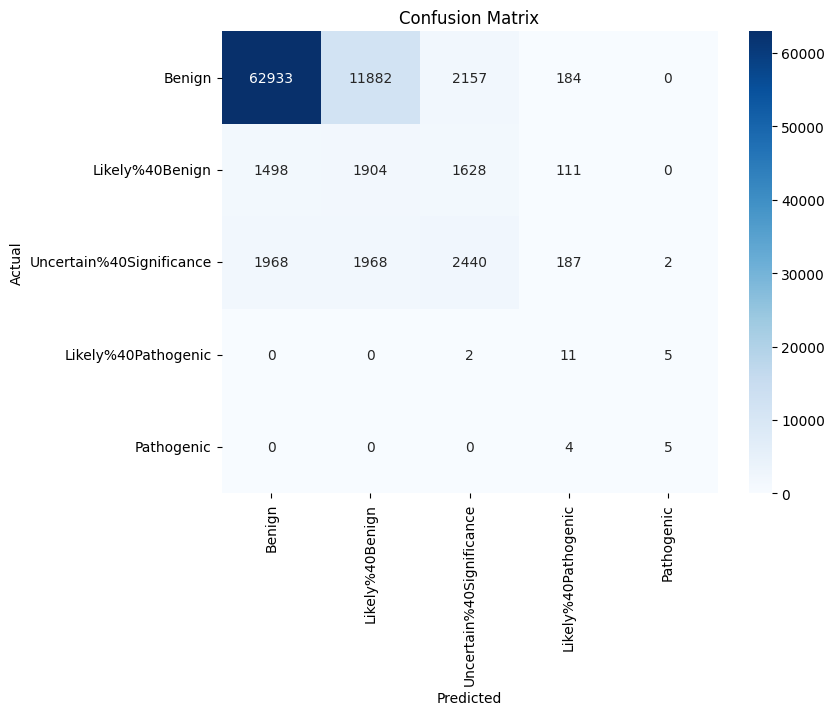

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for Bagging with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     77156
           1       0.70      0.66      0.68      5141
           2       0.78      0.62      0.69      6565
           3       0.62      0.28      0.38        18
           4       0.00      0.00      0.00         9

    accuracy                           0.94     88889
   macro avg       0.62      0.51      0.55     88889
weighted avg       0.94      0.94      0.94     88889



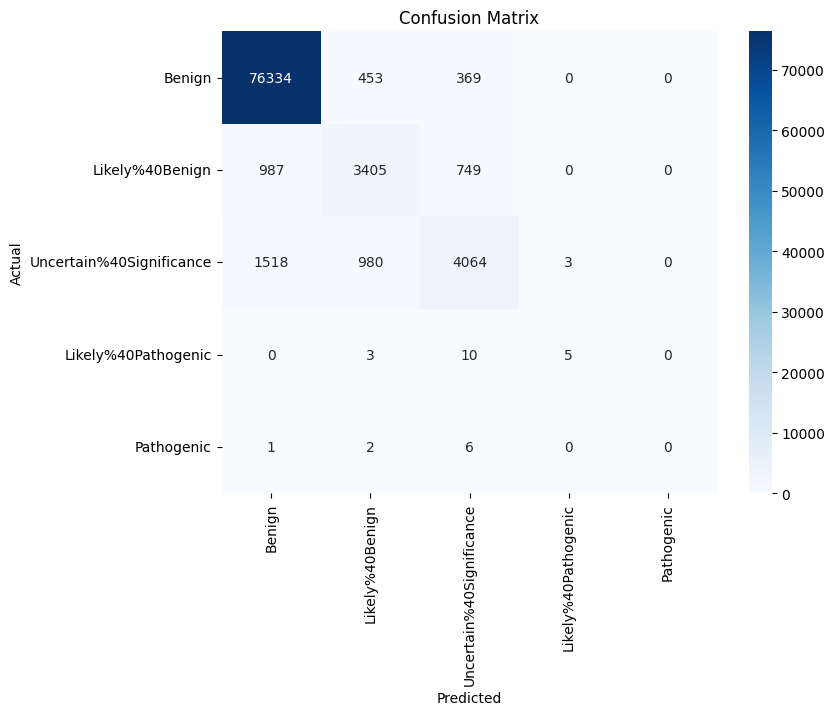

Classification report for Decision Tree with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77156
           1       0.59      0.58      0.59      5141
           2       0.60      0.62      0.61      6565
           3       0.19      0.28      0.23        18
           4       0.25      0.22      0.24         9

    accuracy                           0.92     88889
   macro avg       0.52      0.53      0.52     88889
weighted avg       0.92      0.92      0.92     88889



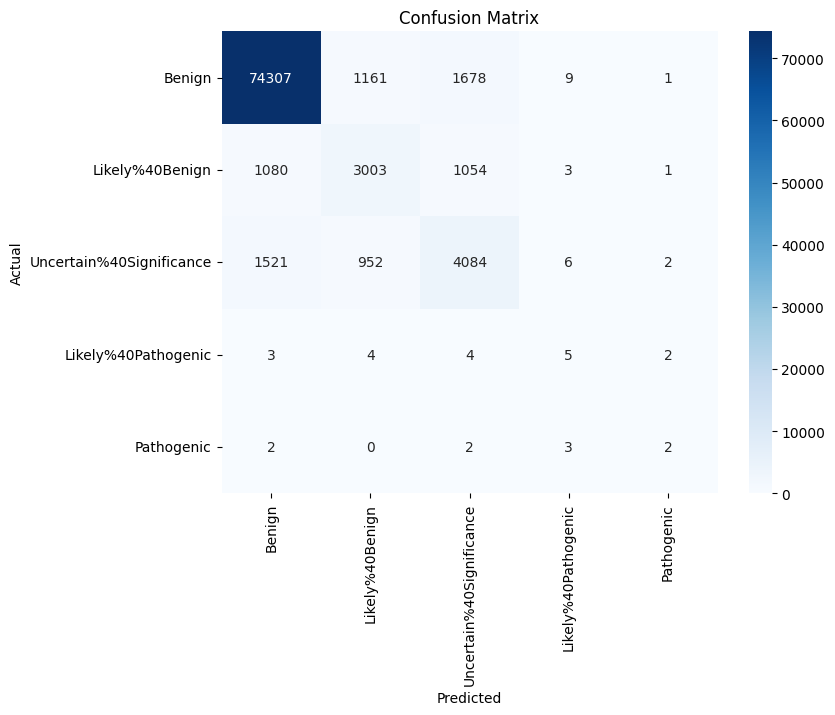

d:\pathogenicity_project\pathogenicity\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression with dataset Encoded - Outside Range and preprocessing Robust:
              precision    recall  f1-score   support

           0       0.97      0.47      0.64     77156
           1       0.14      0.41      0.20      5141
           2       0.17      0.40      0.23      6565
           3       0.00      0.56      0.00        18
           4       0.00      0.67      0.00         9

    accuracy                           0.46     88889
   macro avg       0.25      0.50      0.22     88889
weighted avg       0.86      0.46      0.58     88889



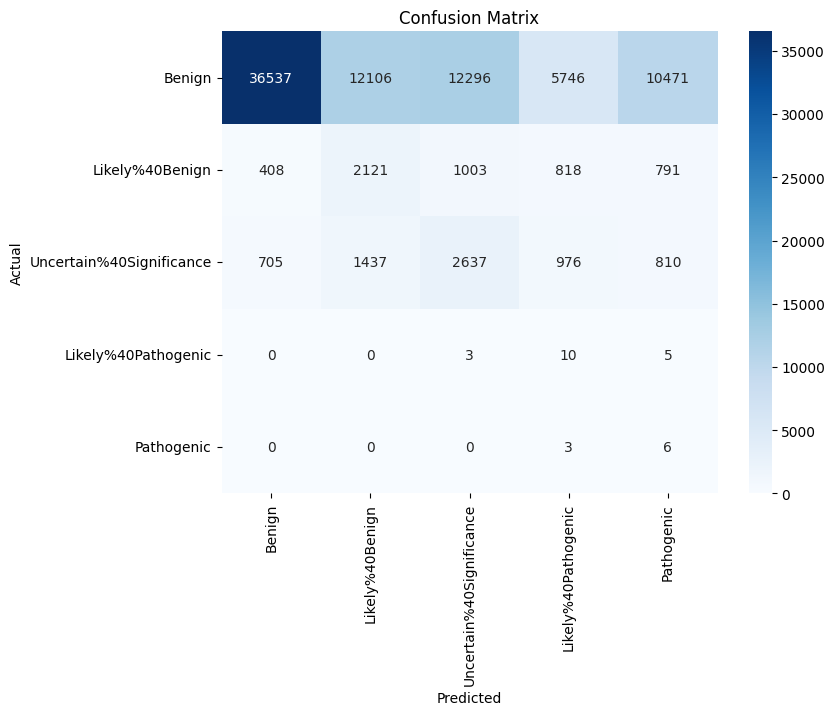

In [42]:
preprocessings = [
    ("None", None),
    ("MinMax", MinMaxScaler()),
    ("Robust", RobustScaler())
]

datasets = [
    ("Encoded - OneHot Nans, Outside Range", encoded_df1),
    ("Encoded - OneHot Nans, Median", encoded_df2),
    ("Encoded - Outside Range", encoded_df3)
]

for preprocessing_name, preprocessing_method in preprocessings:
    for dataset_name, dataset in datasets:
        X = dataset.drop(columns=['ACMG_class'])
        y = dataset['ACMG_class']

        if preprocessing_name != "None":
            X = pd.DataFrame(preprocessing_method.fit_transform(X), columns=X.columns)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model_seed = 42

        class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

        models = [
            ('CatBoost', CatBoostClassifier(class_weights=class_weights, verbose=False, random_state=model_seed)),
            ('XGBoost', XGBClassifier(scale_pos_weight=sum(y_train==0)/sum(y_train==1), random_state=model_seed)),
            ('LightGBM', LGBMClassifier(class_weight=dict(enumerate(class_weights)), random_state=model_seed)),
            ('Random Forest', RandomForestClassifier(class_weight=dict(enumerate(class_weights)), random_state=model_seed)),
            ('AdaBoost', AdaBoostClassifier(random_state=model_seed)),
            ('Bagging', BaggingClassifier(random_state=model_seed)),
            ('Decision Tree', DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), random_state=model_seed)),
            ('Logistic Regression', LogisticRegression(max_iter=1000, class_weight=dict(enumerate(class_weights)), random_state=model_seed)),
        ]

        for model_name, model in models:
            clf = model

            pipeline = Pipeline([
                ('classifier', clf)
            ])

            if model_name == 'AdaBoost':
                sample_weights = class_weights[np.searchsorted(np.unique(y_train), y_train)]
                pipeline.fit(X_train, y_train, classifier__sample_weight=sample_weights)
            else:
                pipeline.fit(X_train, y_train)

            y_pred = pipeline.predict(X_test)
            report = classification_report(y_test, y_pred)
            print(f"Classification report for {model_name} with dataset {dataset_name} and preprocessing {preprocessing_name}:")
            print(report)

            get_confusion_matrix_plot(y_test, y_pred, inverted_mapping)
